## Survey Data Analysis
This notebook presents the exploratory data analysis (EDA) performed on the provided survey data.

### Data Loading

In [287]:
import pandas as pd

# Load the data from the Excel file
file_path = r"C:\Users\Hp\Downloads\Cleaned_Source_data.xlsx"

data = pd.read_excel(file_path)

data.head()

Age_Group  Gender              Device_Category  \
0   Over 65  Female  Advanced open system device   
1   Over 65    Male  Advanced open system device   
2     50-54    Male  Advanced open system device   
3     45-49  Female  Advanced open system device   
4     60-65    Male  Advanced open system device   

                      Previous_Device  \
0              Rechargeable cigalike    
1              Rechargeable cigalike    
2  This is what I started vaping with   
3            Basic open system device   
4         Advanced open system device   

                              Last_Hardware_Purchase Hardware_Brand  \
0                              Box mod (only device)         Voopoo   
1                              Box mod (only device)      Geek Vape   
2             Tank (rebuildable and non-rebuildable)   Vaperz Cloud   
3  I have not purchased main hardware within the ...  Not Specified   
4     Starter kit (device + tank/cartridge together)      Geek Vape   

  Spending_Bracket  Satisfaction_Rating Spending_Midpoint  
0    $40.00-$49.99                 10.0              44.5  
1    $80.00-$89.99                 10.0              84.5  
2    $40.00-$49.99                 10.0              44.5  
3    Not Specified                  NaN     Not Specified  
4    $50.00-$59.99                 10.0              54.5

### Initial Data Review
Reviewing the first few rows to understand the data structure.

In [288]:
data.head()

Age_Group  Gender              Device_Category  \
0   Over 65  Female  Advanced open system device   
1   Over 65    Male  Advanced open system device   
2     50-54    Male  Advanced open system device   
3     45-49  Female  Advanced open system device   
4     60-65    Male  Advanced open system device   

                      Previous_Device  \
0              Rechargeable cigalike    
1              Rechargeable cigalike    
2  This is what I started vaping with   
3            Basic open system device   
4         Advanced open system device   

                              Last_Hardware_Purchase Hardware_Brand  \
0                              Box mod (only device)         Voopoo   
1                              Box mod (only device)      Geek Vape   
2             Tank (rebuildable and non-rebuildable)   Vaperz Cloud   
3  I have not purchased main hardware within the ...  Not Specified   
4     Starter kit (device + tank/cartridge together)      Geek Vape   

  Spending_Bracket  Satisfaction_Rating Spending_Midpoint  
0    $40.00-$49.99                 10.0              44.5  
1    $80.00-$89.99                 10.0              84.5  
2    $40.00-$49.99                 10.0              44.5  
3    Not Specified                  NaN     Not Specified  
4    $50.00-$59.99                 10.0              54.5

### Data Summarization
Performing an in-depth data summarization to understand the dataset from various aspects.

In [8]:
age_bracket_analysis = data['Age_Group'].value_counts()
gender_analysis = data['Gender'].value_counts()
device_category_analysis = data['Device_Category'].value_counts()
previous_device_analysis = data['Previous_Device'].value_counts()
satisfaction_rating_analysis = data['Satisfaction_Rating'].value_counts()
spending_midpoint_analysis = data['Spending_Midpoint'].value_counts()

age_bracket_analysis, gender_analysis, device_category_analysis, previous_device_analysis, satisfaction_rating_analysis, spending_midpoint_analysis

(50-54      497
 Over 65    487
 60-65      471
 45-49      444
 40-44      414
 55-59      375
 35-39      278
 30-34      199
 25-29      118
 21-24       37
 Name: Age_Group, dtype: int64,
 Male                 2230
 Female               1045
 Prefer not to say      27
 Non-binary             18
 Name: Gender, dtype: int64,
 Advanced open system device    2470
 Basic open system device        850
 Name: Device_Category, dtype: int64,
 Basic open system device              1084
 Advanced open system device            839
 This is what I started vaping with     745
 Rechargeable cigalike                  495
 Disposable                              89
 Pre-filled pod system                   68
 Name: Previous_Device, dtype: int64,
 10.0    1049
 9.0      281
 8.0      267
 7.0      123
 6.0       32
 5.0       23
 4.0       10
 3.0        6
 1.0        5
 2.0        2
 Name: Satisfaction_Rating, dtype: int64,
 Not Specified    1534
 34.5              285
 54.5              243
 44.5 

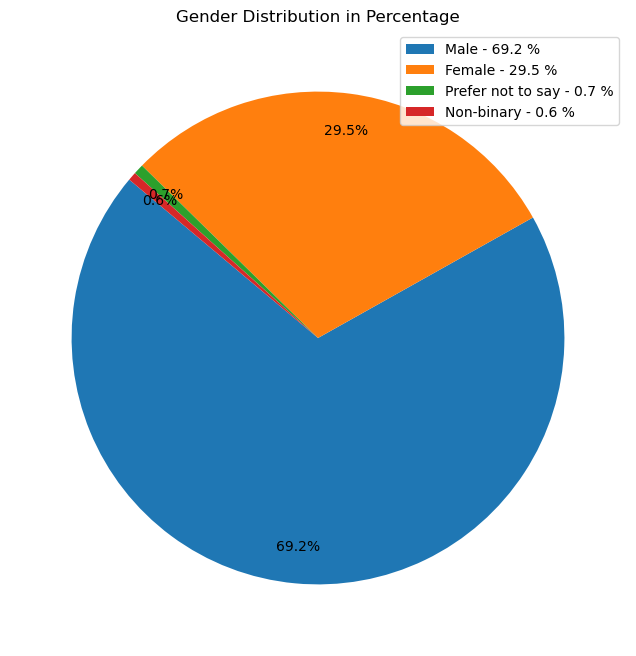

In [197]:
import matplotlib.pyplot as plt

# Calculating the percentage of each gender
gender_percentages = data['Gender'].value_counts(normalize=True) * 100

# Creating the pie chart for Gender Distribution
plt.figure(figsize=(8, 8))
plt.pie(gender_percentages, labels=None, autopct='%1.1f%%', startangle=140, pctdistance=0.85)  # Set pctdistance to control label position
labels = ['{0} - {1:1.1f} %'.format(i, j) for i, j in zip(gender_percentages.index, gender_percentages)]
plt.legend(labels, loc="best")
plt.title('Gender Distribution in Percentage')
plt.savefig('E:/Upwork Gold/Saidjah/Gender Distribution.png', format='png', dpi=300)
plt.show()


<Figure size 800x600 with 0 Axes>

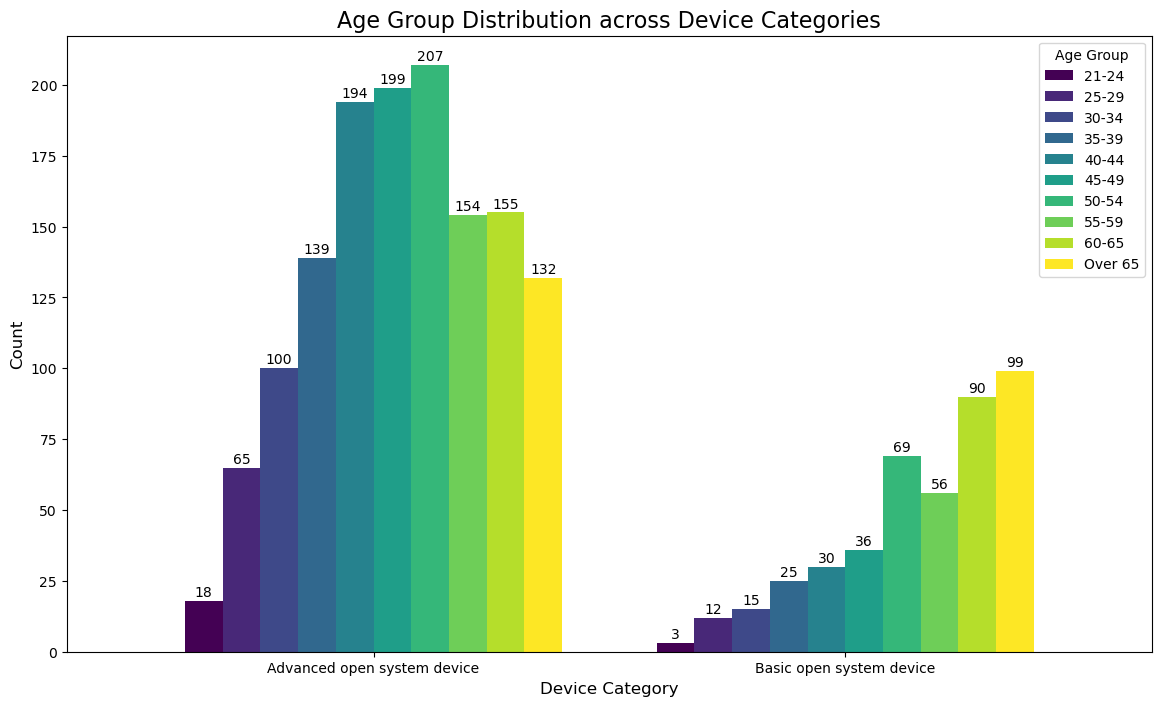

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing data for a grouped bar chart of Age vs. Device Category
age_device_grouped = pd.crosstab(data['Device_Category'], data['Age_Group'])

# Plotting the grouped bar chart
plt.figure(figsize=(8, 6))
ax = age_device_grouped.plot(kind='bar', stacked=False, colormap='viridis', figsize=(14, 8), width=0.8)
plt.title('Age Group Distribution across Device Categories', fontsize=16)
plt.xlabel('Device Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Age Group', bbox_to_anchor=(0.89, 1), loc='upper left')

# Add labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height + 3), ha='center', va='center')

plt.savefig('E:/Upwork Gold/Saidjah/1Age Group Distribution across Device Categories.png', format='png', dpi=300)

plt.show()


<Figure size 1400x800 with 0 Axes>

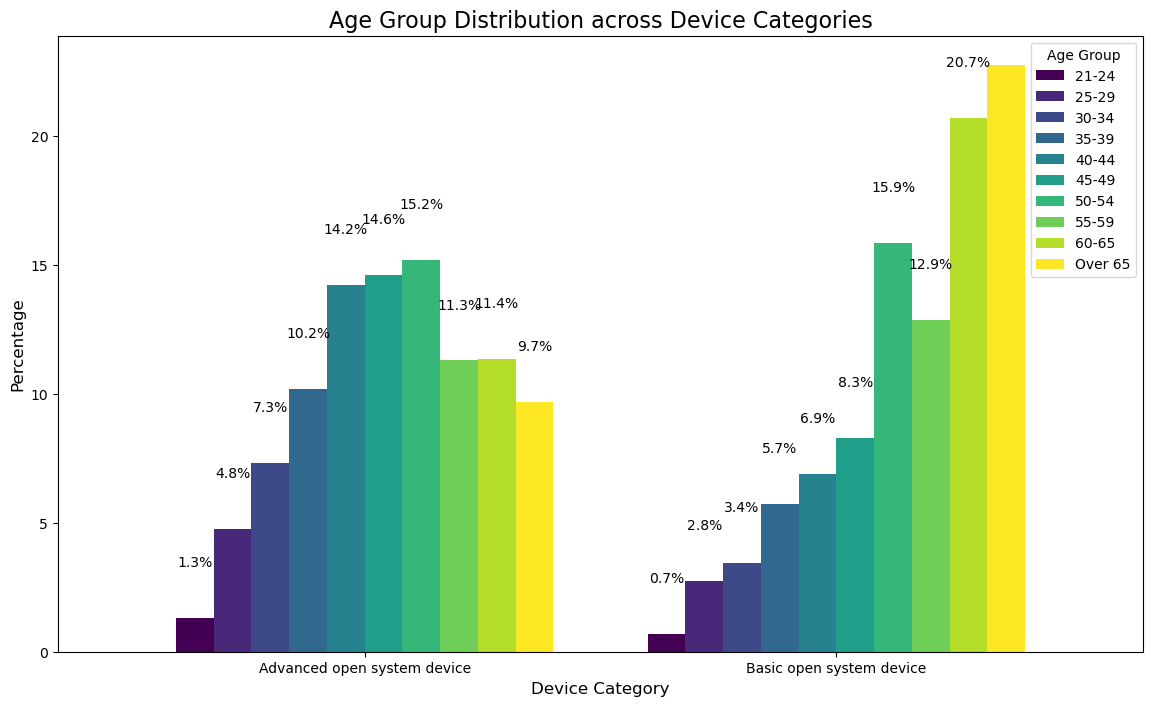

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing data for a grouped bar chart of Age vs. Device Category
age_device_grouped = pd.crosstab(data['Device_Category'], data['Age_Group'], normalize='index') * 100

# Plotting the grouped bar chart
plt.figure(figsize=(14, 8))
ax = age_device_grouped.plot(kind='bar', stacked=False, colormap='viridis', figsize=(14, 8), width=0.8)
plt.title('Age Group Distribution across Device Categories', fontsize=16)
plt.xlabel('Device Category', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Age Group', bbox_to_anchor=(0.89, 1), loc='upper left')

# Add labels as percentages
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    percentage = f'{height:.1f}%'
    ax.annotate(percentage, (x + width / 2, y + height + 2), ha='center')

plt.savefig('E:/Upwork Gold/Saidjah/2Age Group Distribution across Device Categories.png', format='png', dpi=300)

plt.show()


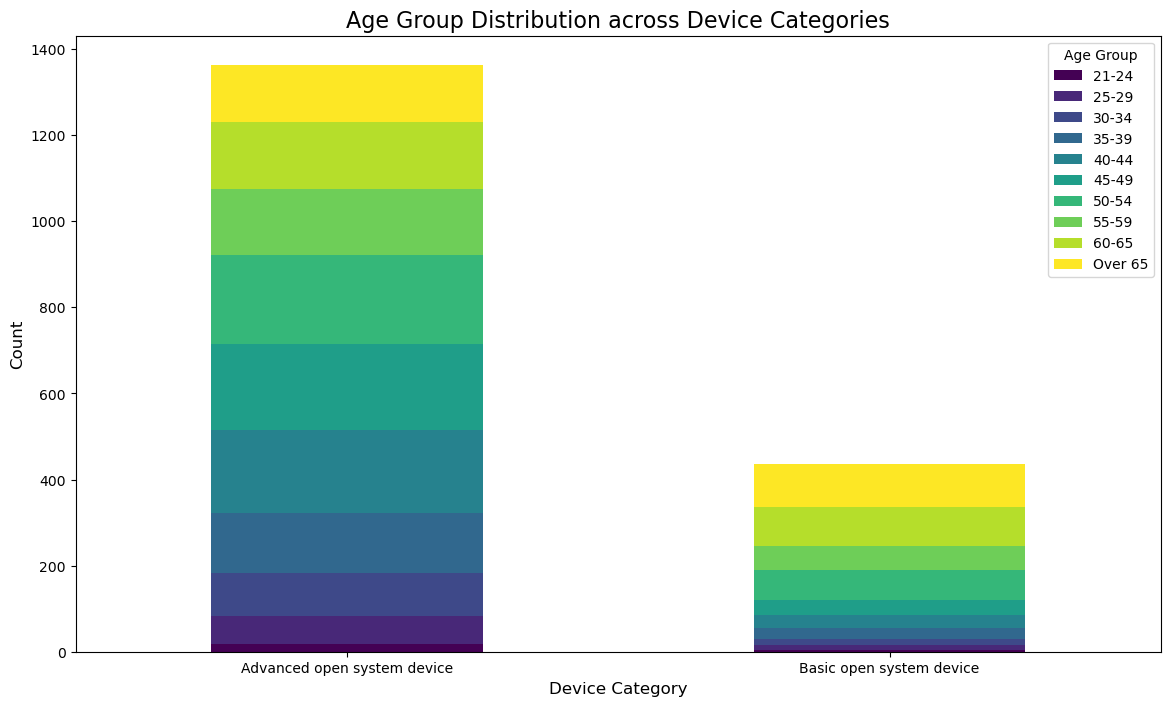

In [220]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Preparing data for a stacked bar chart of Age vs. Device Category
age_device_crosstab = pd.crosstab(data['Device_Category'], data['Age_Group'])

# Plotting the stacked bar chart
age_device_crosstab.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 8))
plt.title('Age Group Distribution across Device Categories', fontsize=16)
plt.xlabel('Device Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Age Group', bbox_to_anchor=(0.89, 1), loc='upper left')
plt.savefig('E:/Upwork Gold/Saidjah/3Age Group Distribution across Device Categories.png', format='png', dpi=300)
plt.show()


<Figure size 1400x800 with 0 Axes>

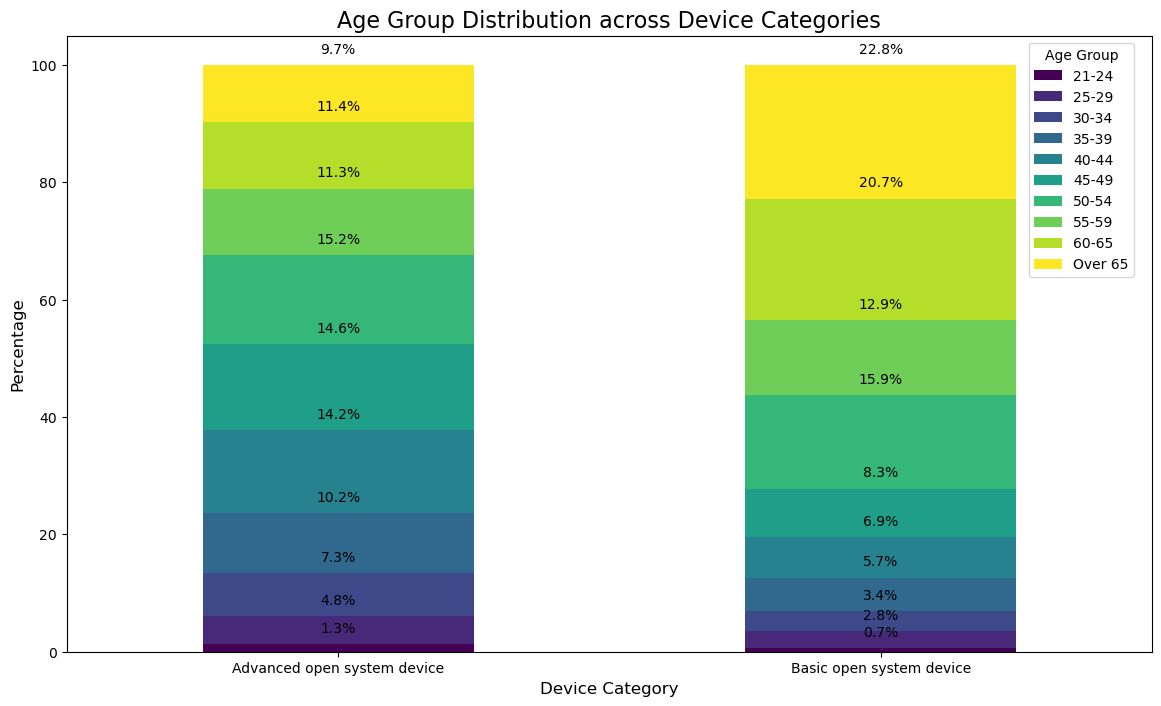

In [432]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Preparing data for a stacked bar chart of Age vs. Device Category
age_device_crosstab = pd.crosstab(data['Device_Category'], data['Age_Group'], normalize='index') * 100

# Plotting the stacked bar chart
plt.figure(figsize=(14, 8))
ax = age_device_crosstab.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 8))
plt.title('Age Group Distribution across Device Categories', fontsize=16)
plt.xlabel('Device Category', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Age Group', bbox_to_anchor=(0.88, 1), loc='upper left')

# Add percentage labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    percentage = f'{height:.1f}%'
    ax.annotate(percentage, (x + width / 2, y + height + 2), ha='center')
plt.savefig('E:/Upwork Gold/Saidjah/4Age Group Distribution across Device Categories.png', format='png', dpi=300)

plt.show()


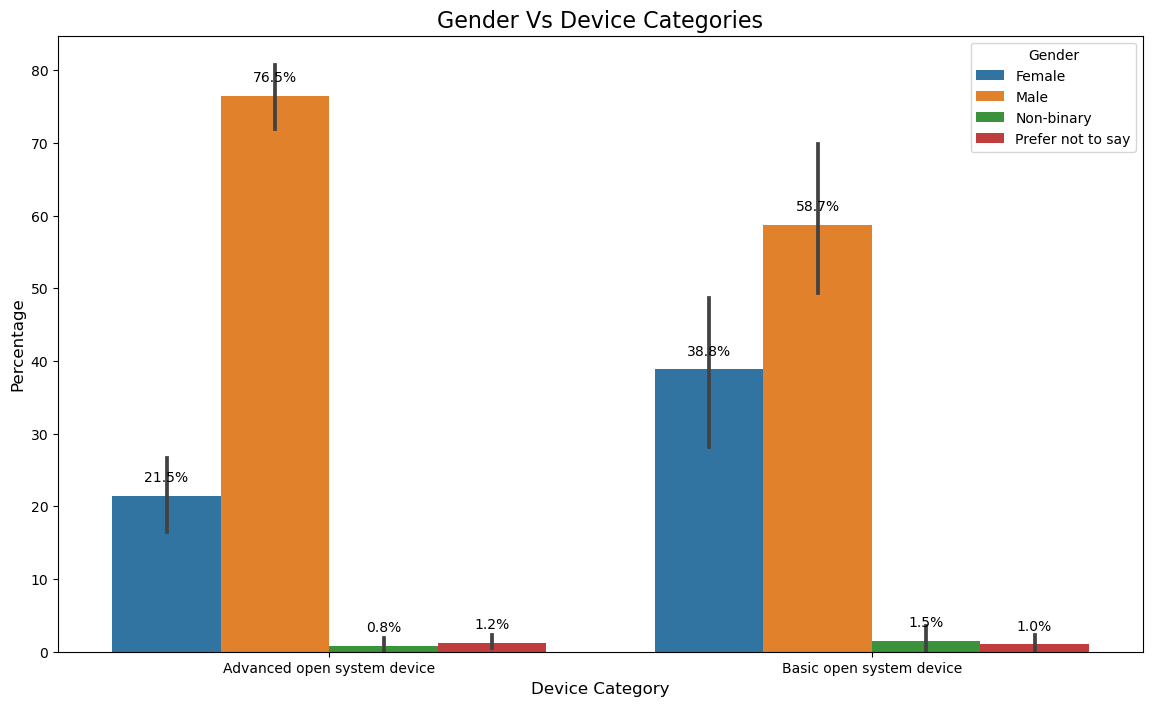

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Calculating the percentage of each gender within each age group for every device category
age_gender_device = pd.crosstab([data['Device_Category'], data['Age_Group']], data['Gender'], normalize='index') * 100

# Resetting index to convert multi-index to columns
age_gender_device = age_gender_device.reset_index()

# Melting the DataFrame to get a long-form DataFrame suitable for bar plot
age_gender_device_melted = age_gender_device.melt(id_vars=['Device_Category', 'Age_Group'], 
                                                  var_name='Gender', value_name='Percentage')

# Plotting
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Device_Category', y='Percentage', hue='Gender', data=age_gender_device_melted)
plt.title('Gender Vs Device Categories', fontsize=16)
plt.xlabel('Device Category', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Gender')

# Add labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height + 2), ha='center')

plt.savefig('E:/Upwork Gold/Saidjah/Gender Vs Device Categories.png', format='png', dpi=300)

plt.show()


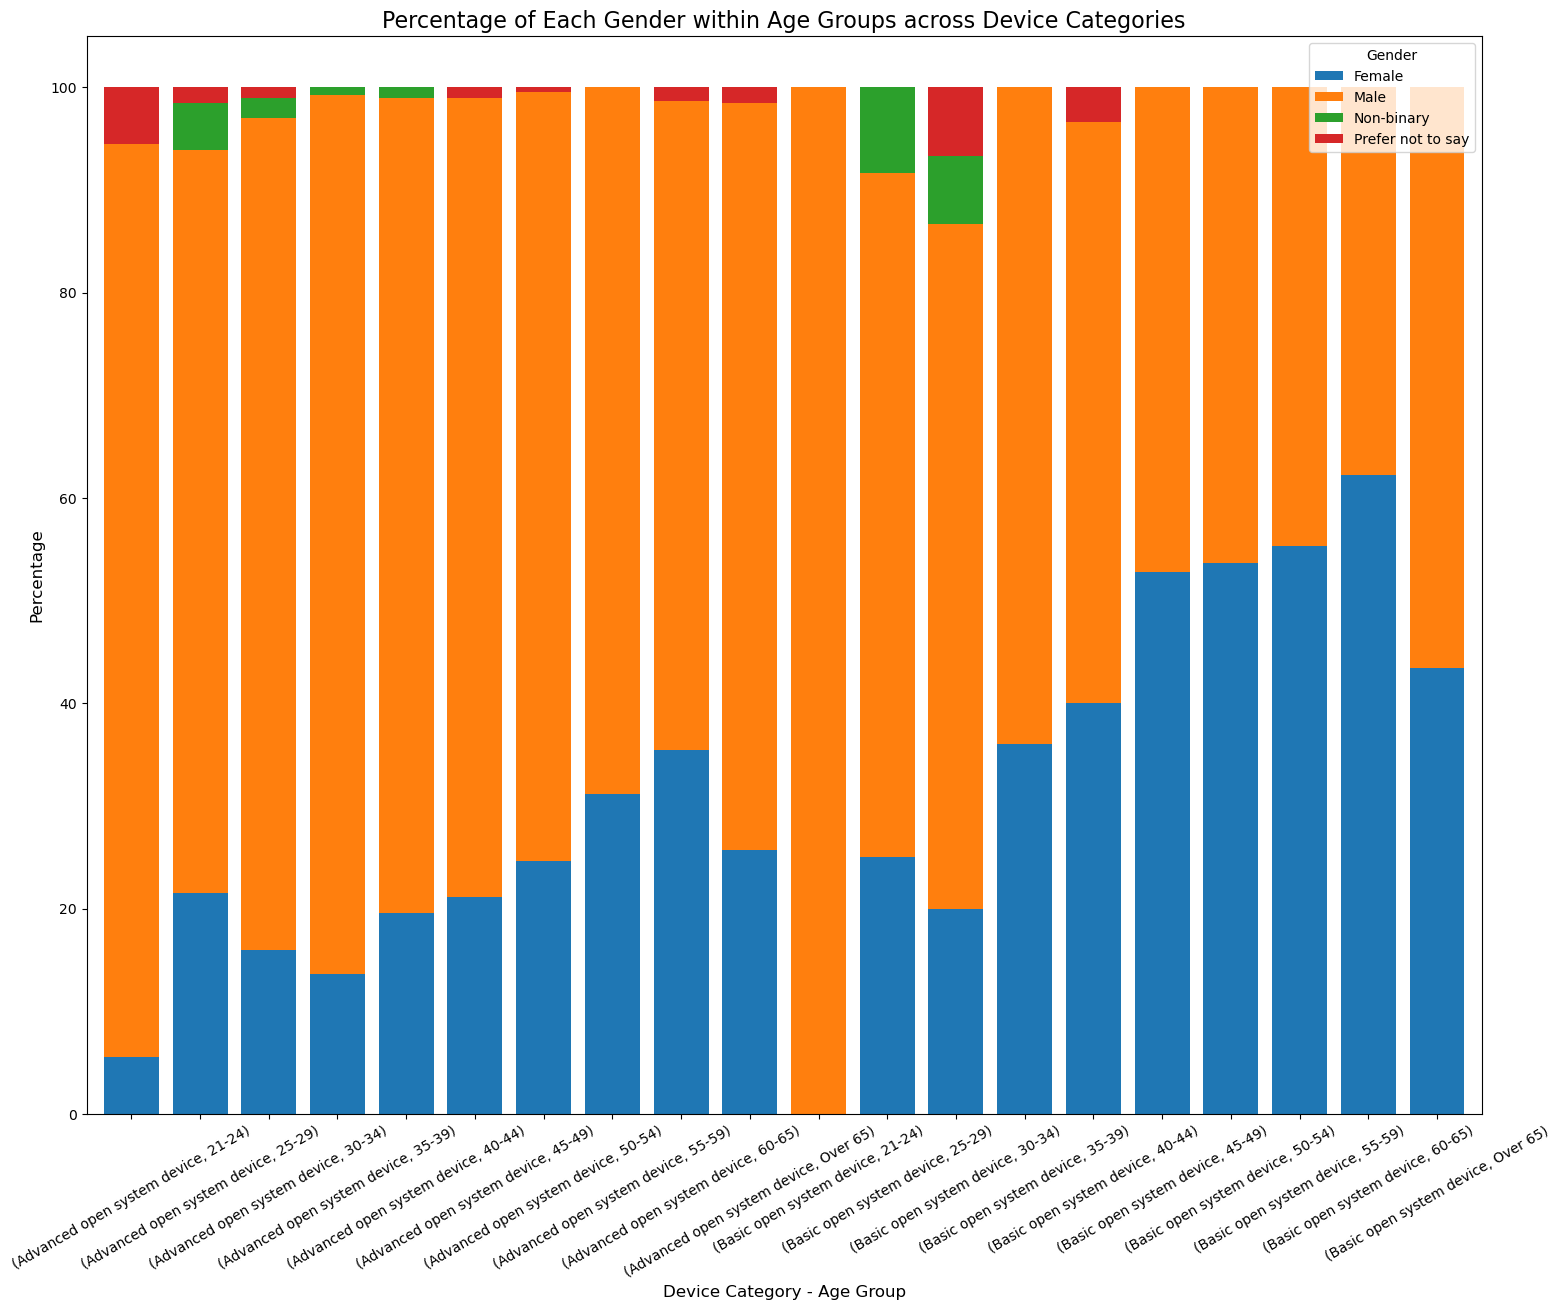

In [238]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Calculating the percentage of each gender within each age group for every device category
age_gender_device = pd.crosstab([data['Device_Category'], data['Age_Group']], data['Gender'], normalize='index') * 100

# Creating a stacked bar chart
age_gender_device.plot(kind='bar', stacked=True, figsize=(18, 14), width=0.8)
plt.title('Percentage of Each Gender within Age Groups across Device Categories', fontsize=16)
plt.xlabel('Device Category - Age Group', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=30)
plt.legend(title='Gender')
plt.savefig('E:/Upwork Gold/Saidjah/Percentage of Each Gender within Age Groups across Device Categories.png', format='png', dpi=300)
plt.show()


<Figure size 1800x800 with 0 Axes>

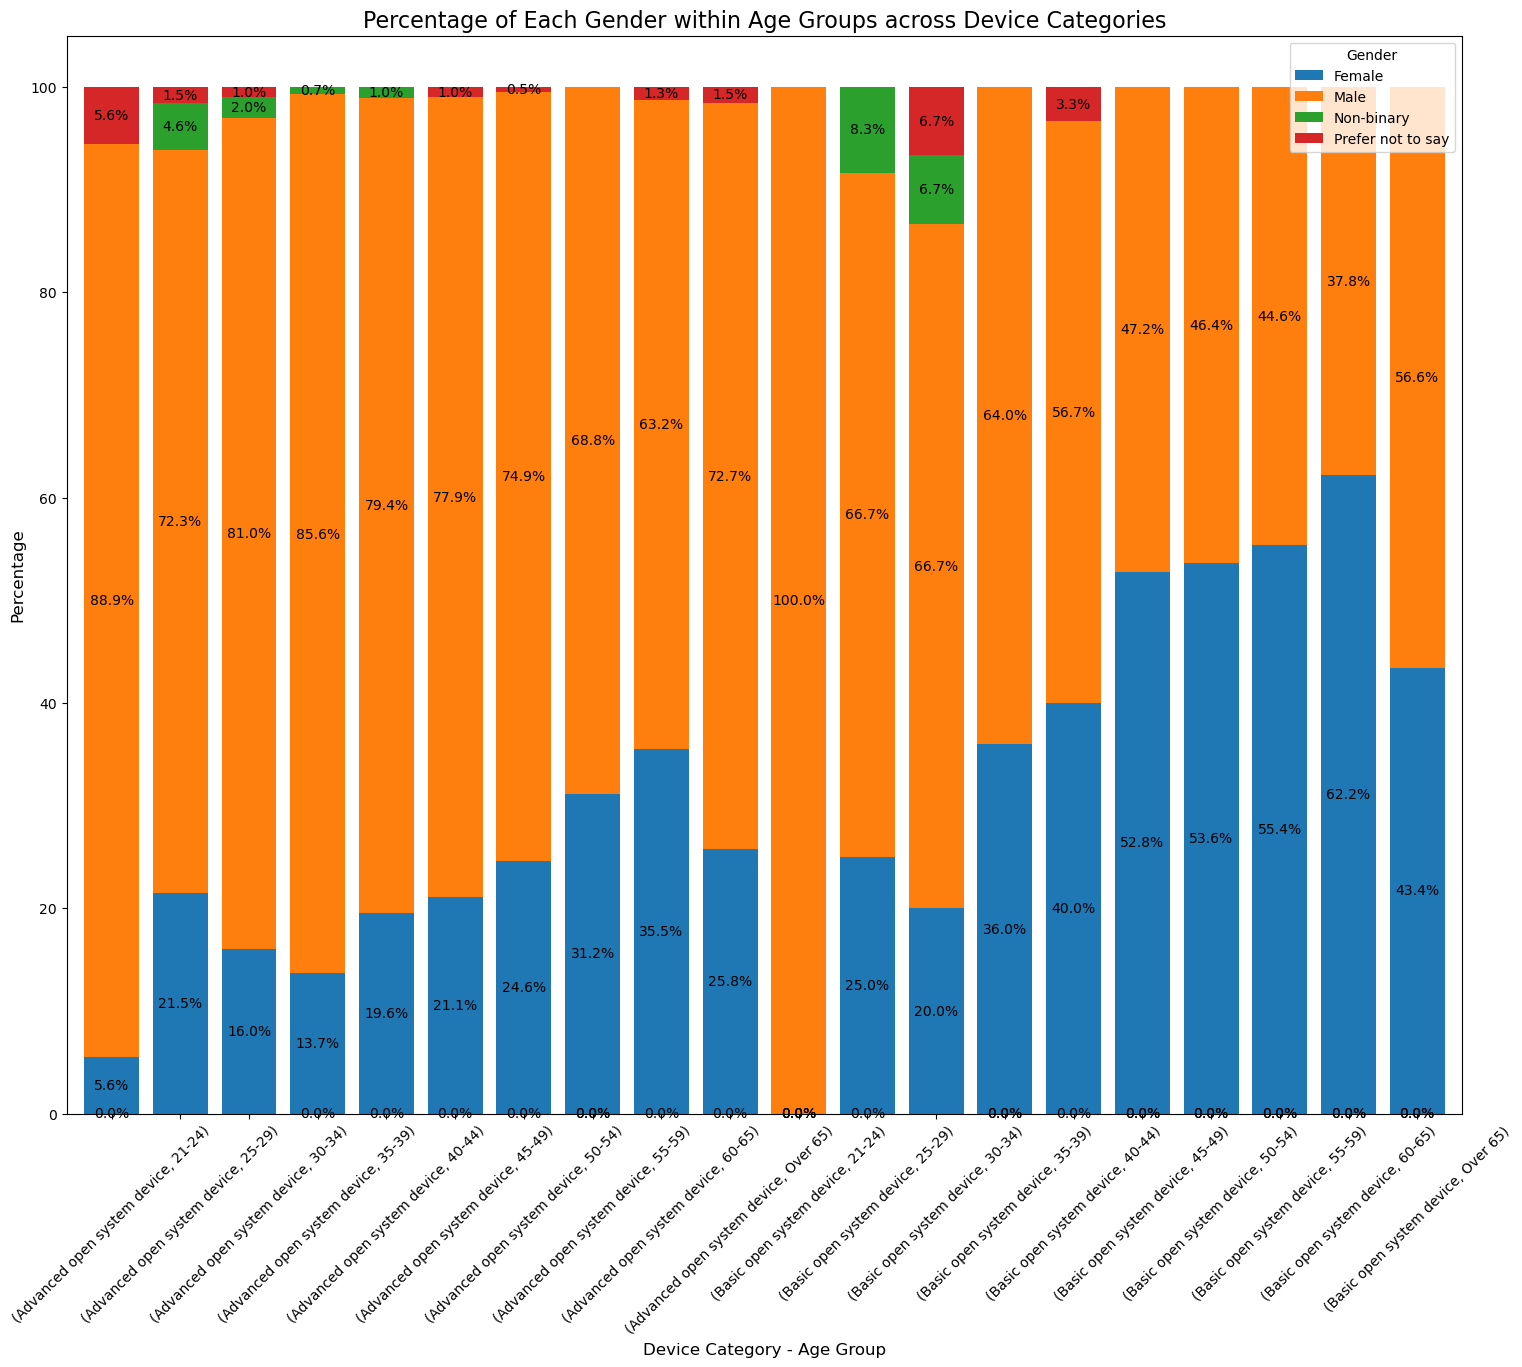

In [239]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Calculating the percentage of each gender within each age group for every device category
age_gender_device = pd.crosstab([data['Device_Category'], data['Age_Group']], data['Gender'], normalize='index') * 100

# Creating a stacked bar chart
plt.figure(figsize=(18, 8))
ax = age_gender_device.plot(kind='bar', stacked=True, figsize=(18, 14), width=0.8)
plt.title('Percentage of Each Gender within Age Groups across Device Categories', fontsize=16)
plt.xlabel('Device Category - Age Group', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Gender')

# Add percentage labels to each segment
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')
    
plt.savefig('E:/Upwork Gold/Saidjah/2Percentage of Each Gender within Age Groups across Device Categories.png', format='png', dpi=300)

plt.show()


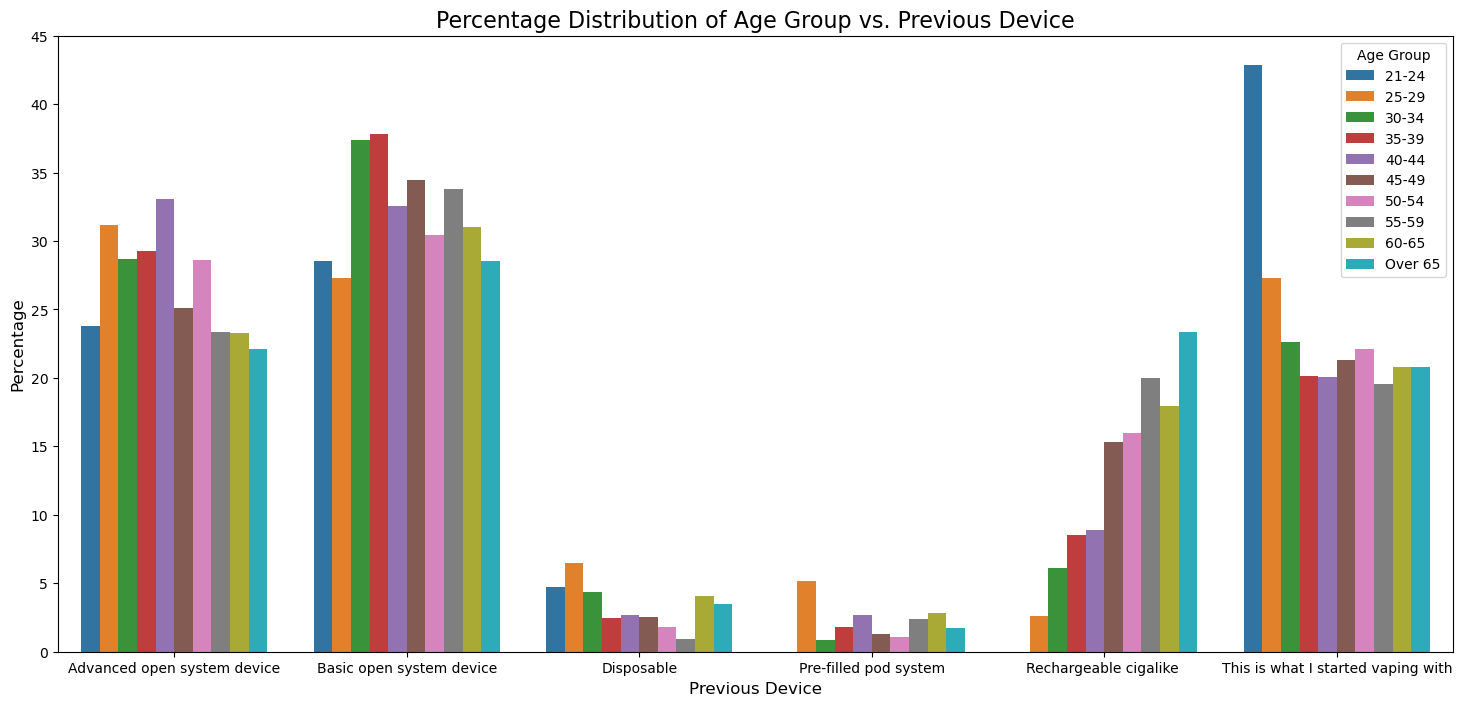

In [245]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Calculating the percentage of each age group within each previous device category
age_group_previous_device = pd.crosstab(data['Previous_Device'], data['Age_Group'], normalize='columns') * 100

# Resetting index for ease of plotting
age_group_previous_device.reset_index(inplace=True)

# Melting the DataFrame to get a long-form DataFrame suitable for a bar plot
age_group_previous_device_melted = age_group_previous_device.melt(id_vars='Previous_Device', var_name='Age_Group', value_name='Percentage')

# Plotting the bar chart
plt.figure(figsize=(18, 8))
sns.barplot(x='Previous_Device', y='Percentage', hue='Age_Group', data=age_group_previous_device_melted)
plt.title('Percentage Distribution of Age Group vs. Previous Device', fontsize=16)
plt.xlabel('Previous Device', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Age Group')
plt.savefig('E:/Upwork Gold/Saidjah/Percentage Distribution of Age Group vs. Previous Device.png', format='png', dpi=300)
plt.show()


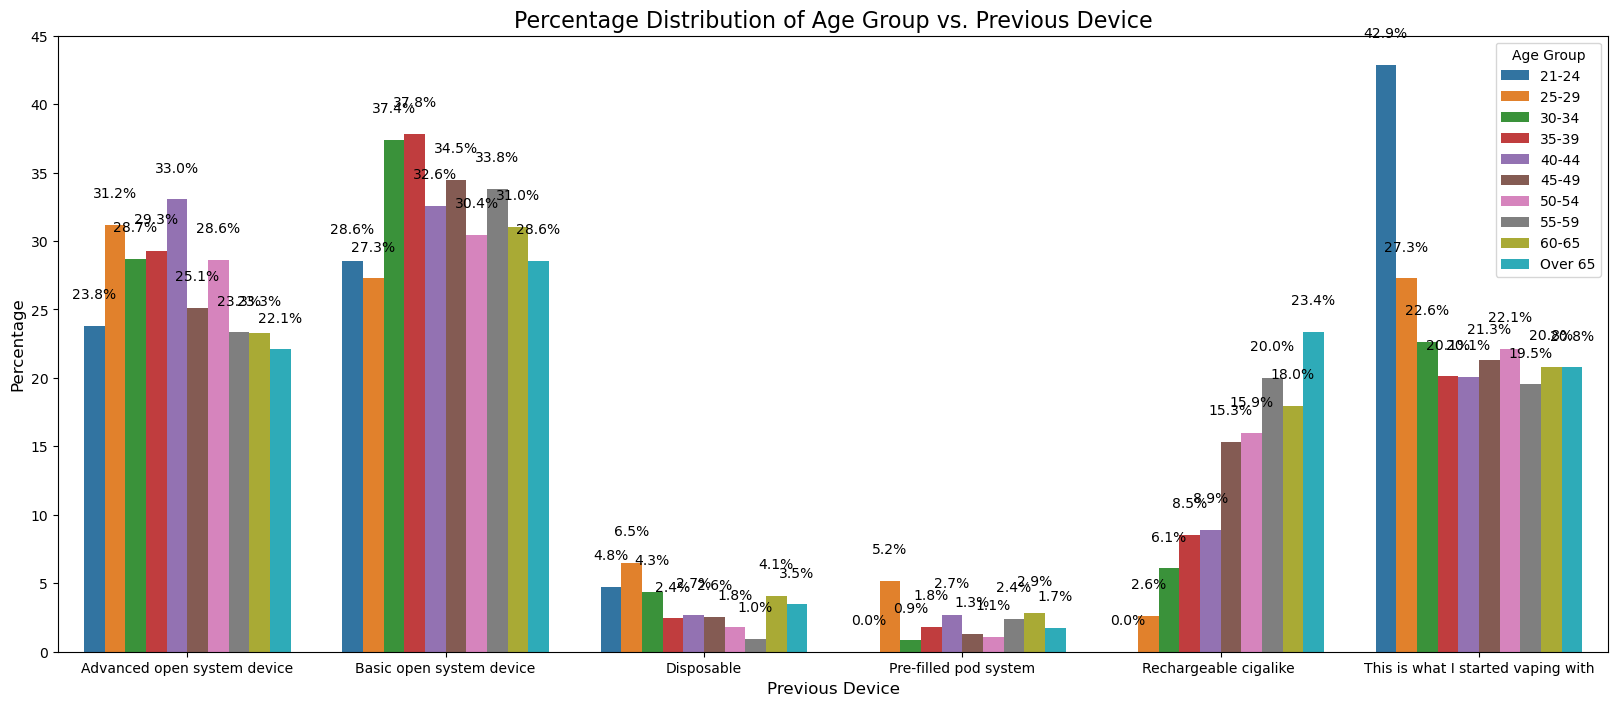

In [252]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Calculating the percentage of each age group within each previous device category
age_group_previous_device = pd.crosstab(data['Previous_Device'], data['Age_Group'], normalize='columns') * 100

# Resetting index for ease of plotting
age_group_previous_device.reset_index(inplace=True)

# Melting the DataFrame to get a long-form DataFrame suitable for a bar plot
age_group_previous_device_melted = age_group_previous_device.melt(id_vars='Previous_Device', var_name='Age_Group', value_name='Percentage')

# Plotting the bar chart
plt.figure(figsize=(20, 8))
ax = sns.barplot(x='Previous_Device', y='Percentage', hue='Age_Group', data=age_group_previous_device_melted)
plt.title('Percentage Distribution of Age Group vs. Previous Device', fontsize=16)
plt.xlabel('Previous Device', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Age Group')

# Add percentage labels to each segment
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height + 2), ha='center')

plt.savefig('E:/Upwork Gold/Saidjah/2Percentage Distribution of Age Group vs. Previous Device.png', format='png', dpi=300)
plt.show()


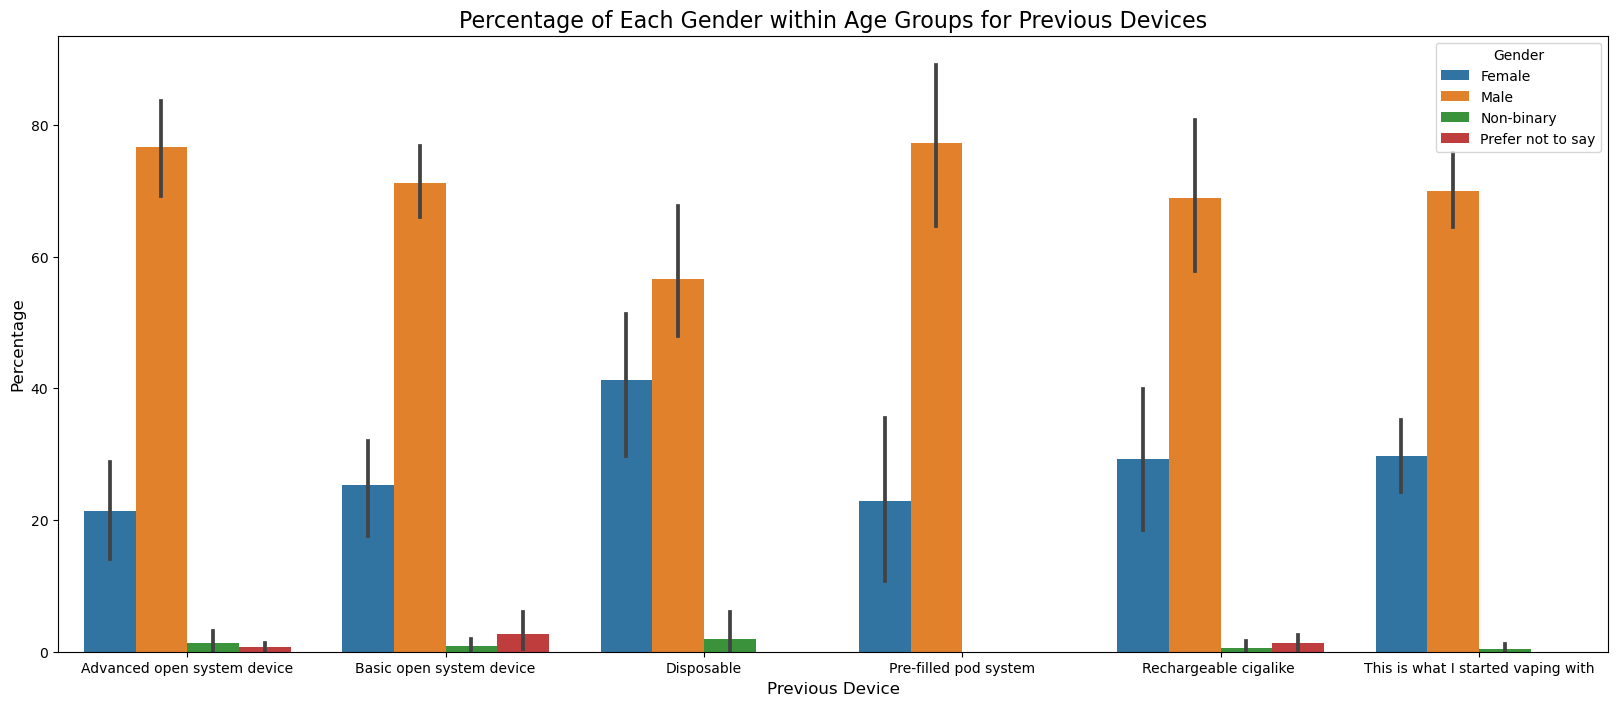

In [253]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Calculating the percentage of each gender within each age group for every previous device category
gender_age_previous_device = pd.crosstab([data['Previous_Device'], data['Age_Group']], data['Gender'], normalize='index') * 100

# Resetting index to convert multi-index to columns
gender_age_previous_device = gender_age_previous_device.reset_index()

# Melting the DataFrame to get a long-form DataFrame suitable for bar plot
gender_age_previous_device_melted = gender_age_previous_device.melt(id_vars=['Previous_Device', 'Age_Group'], 
                                                                    var_name='Gender', value_name='Percentage')

# Plotting
plt.figure(figsize=(20, 8))
sns.barplot(x='Previous_Device', y='Percentage', hue='Gender', data=gender_age_previous_device_melted)
plt.title('Percentage of Each Gender within Age Groups for Previous Devices', fontsize=16)
plt.xlabel('Previous Device', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.savefig('E:/Upwork Gold/Saidjah/Percentage of Each Gender within Age Groups for Previous Devices.png', format='png', dpi=300)
plt.show()


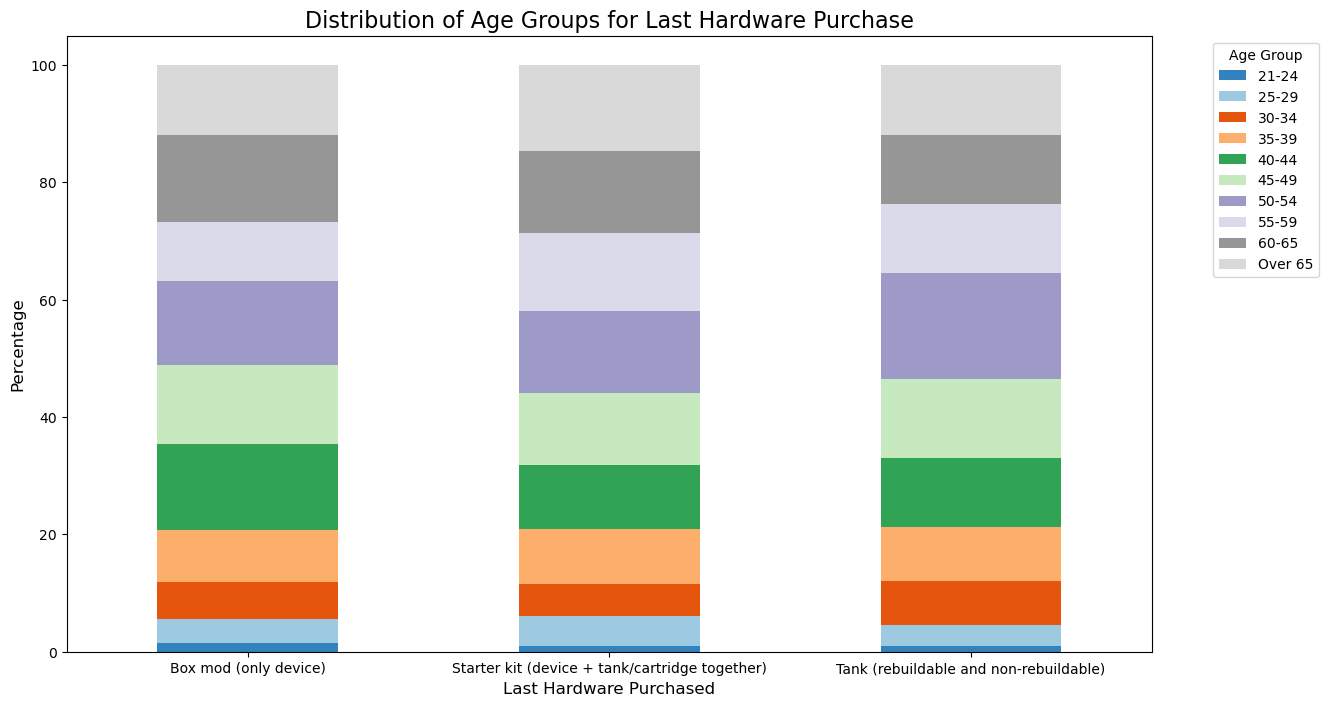

In [265]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Calculating the proportion of each age group within each "Last Hardware Purchased" category
age_hardware_crosstab = pd.crosstab(data['Last_Hardware_Purchase'], data['Age_Group'], normalize='index') * 100

# Creating a stacked bar chart
age_hardware_crosstab.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20c')
plt.title('Distribution of Age Groups for Last Hardware Purchase', fontsize=16)
plt.xlabel('Last Hardware Purchased', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('E:/Upwork Gold/Saidjah/Distribution of Age Groups for Last Hardware Purchase.png', format='png', dpi=300)
plt.show()


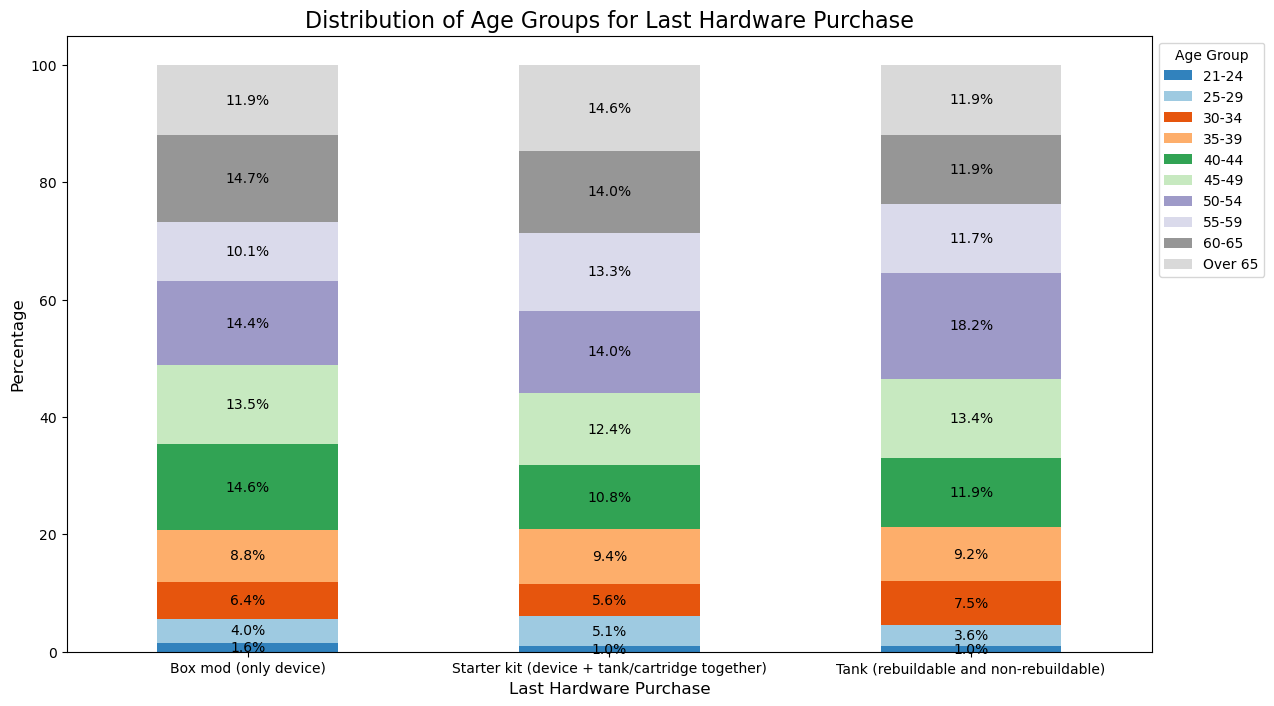

In [266]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Calculating the proportion of each age group within each "Last Hardware Purchased" category
age_hardware_crosstab = pd.crosstab(data['Last_Hardware_Purchase'], data['Age_Group'], normalize='index') * 100

# Creating a stacked bar chart with improved coloring and percentage labels
ax = age_hardware_crosstab.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20c')
plt.title('Distribution of Age Groups for Last Hardware Purchase', fontsize=16)
plt.xlabel('Last Hardware Purchase', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Age Group', bbox_to_anchor=(1, 1), loc='upper left')

# Adding percentage labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0: # To avoid displaying labels for zero height bars
        ax.text(x + width/2, 
                y + height/2, 
                '{:.1f}%'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center')

plt.savefig('E:/Upwork Gold/Saidjah/2Distribution of Age Groups for Last Hardware Purchase.png', format='png', dpi=300)

plt.show()


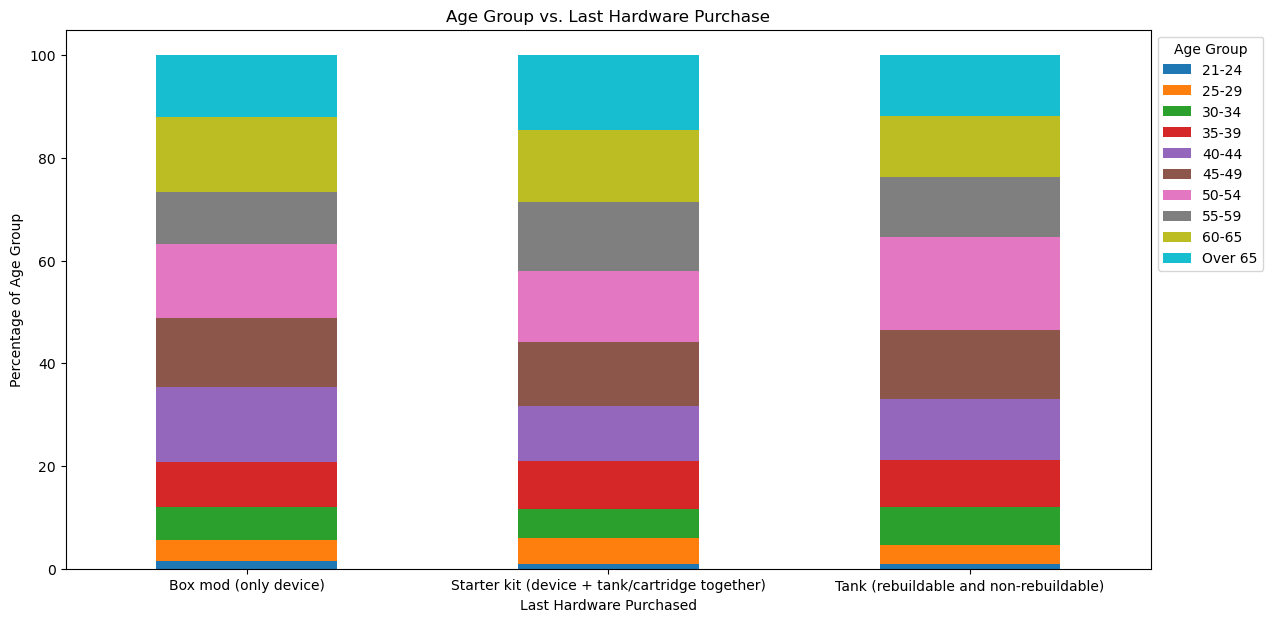

In [271]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it has 'Last_Hardware_Purchased' and 'Age_Group' columns
# data = pd.read_excel('your_data_file.xlsx')

# Calculate the count of each age group for every 'Last_Hardware_Purchased' category
hardware_age_group = pd.crosstab(data['Last_Hardware_Purchase'], data['Age_Group'])

# Calculate the proportion/percentage of each age group within each 'Last_Hardware_Purchased' category
hardware_age_group_percentage = hardware_age_group.div(hardware_age_group.sum(axis=1), axis=0) * 100

# Plot a stacked bar chart
hardware_age_group_percentage.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Age Group vs. Last Hardware Purchase')
plt.xlabel('Last Hardware Purchased')
plt.ylabel('Percentage of Age Group')
plt.legend(title='Age Group', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=0)
plt.savefig('E:/Upwork Gold/Saidjah/Age Group vs. Last Hardware Purchase.png', format='png', dpi=300)
plt.show()


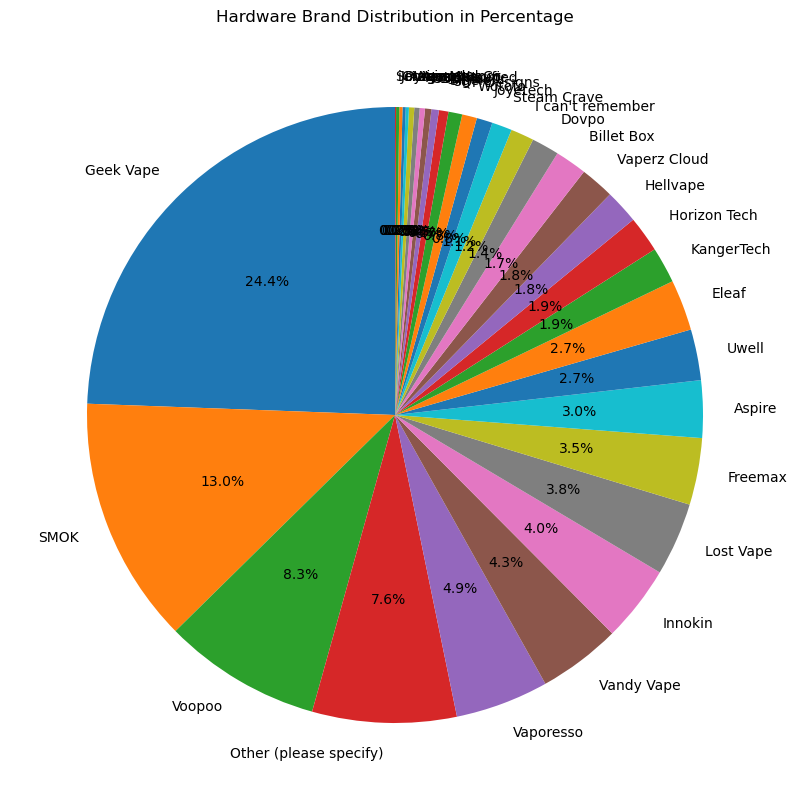

In [272]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it has 'Hardware_Brand' column
# data = pd.read_excel('your_data_file.xlsx')

# Calculate the percentage of each Hardware Brand
hardware_brand_percentages = data['Hardware_Brand'].value_counts(normalize=True) * 100

# Create the pie chart for Hardware Brand Distribution
plt.figure(figsize=(10, 10))
plt.pie(hardware_brand_percentages, labels=hardware_brand_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Hardware Brand Distribution in Percentage')
plt.savefig('E:/Upwork Gold/Saidjah/Pie Chart Hardware Brand Distribution in Percentage.png', format='png', dpi=300)
plt.show()


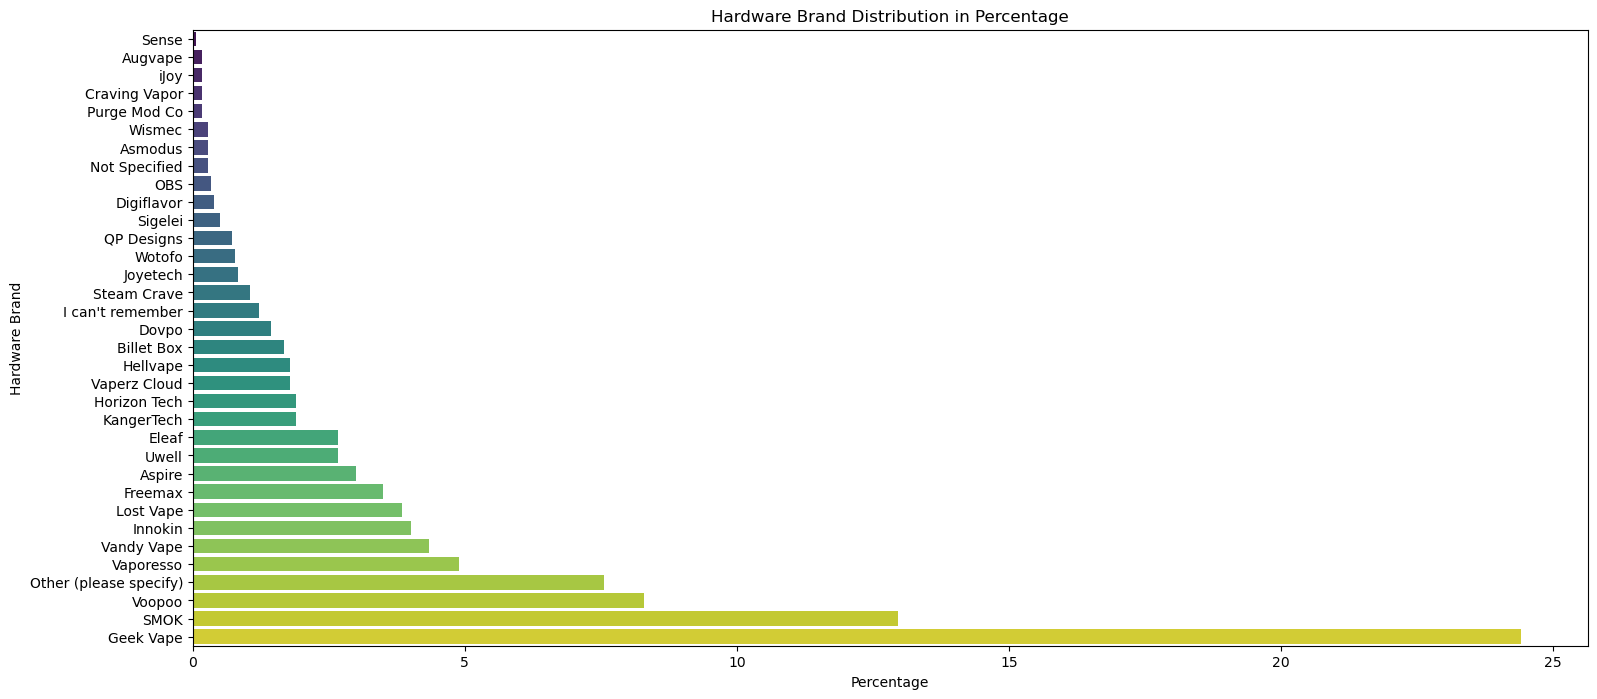

In [274]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and it has 'Hardware_Brand' column
# data = pd.read_excel('your_data_file.xlsx')

# Calculate the percentage of each Hardware Brand
hardware_brand_counts = data['Hardware_Brand'].value_counts(normalize=True) * 100

# Sort the brands by count
sorted_brands = hardware_brand_counts.sort_values()

# Create a horizontal bar chart for Hardware Brand Distribution
plt.figure(figsize=(18, 8))
sns.barplot(x=sorted_brands.values, y=sorted_brands.index, palette='viridis')
plt.title('Hardware Brand Distribution in Percentage')
plt.xlabel('Percentage')
plt.ylabel('Hardware Brand')
plt.savefig('E:/Upwork Gold/Saidjah/Bar Graph Hardware Brand Distribution in Percentage.png', format='png', dpi=300)
plt.show()


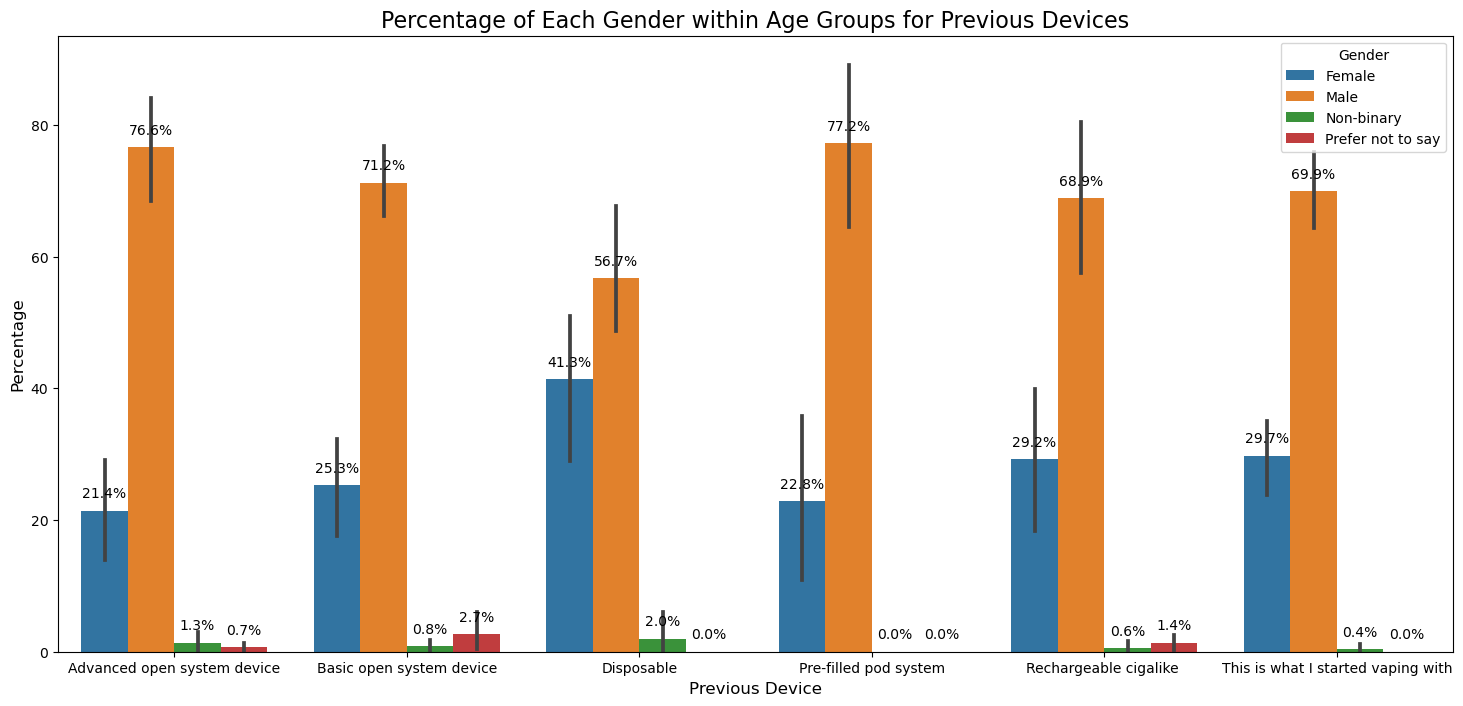

In [285]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Calculating the percentage of each gender within each age group for every previous device category
gender_age_previous_device = pd.crosstab([data['Previous_Device'], data['Age_Group']], data['Gender'], normalize='index') * 100

# Resetting index to convert multi-index to columns
gender_age_previous_device = gender_age_previous_device.reset_index()

# Melting the DataFrame to get a long-form DataFrame suitable for bar plot
gender_age_previous_device_melted = gender_age_previous_device.melt(id_vars=['Previous_Device', 'Age_Group'], 
                                                                    var_name='Gender', value_name='Percentage')

# Plotting
plt.figure(figsize=(18, 8))
ax = sns.barplot(x='Previous_Device', y='Percentage', hue='Gender', data=gender_age_previous_device_melted)
plt.title('Percentage of Each Gender within Age Groups for Previous Devices', fontsize=16)
plt.xlabel('Previous Device', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Gender')

# Add percentage labels to each segment
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height + 2), ha='center')

plt.savefig('E:/Upwork Gold/Saidjah/Percentage of Each Gender within Age Groups for Previous Devices.png', format='png', dpi=300)

plt.show()


<Figure size 1400x1000 with 0 Axes>

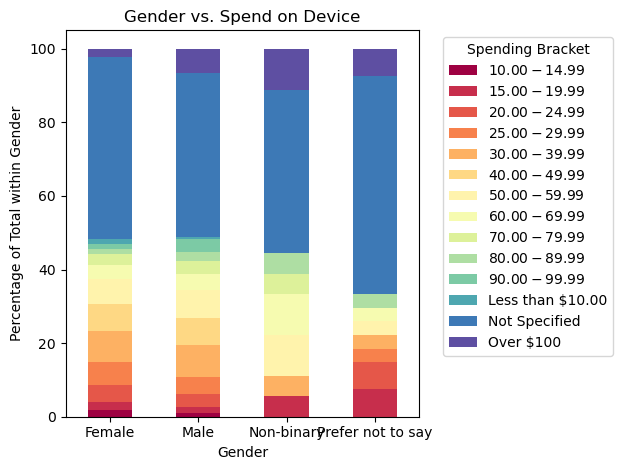

In [294]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Calculate the count of each spending bracket within each gender
gender_spending = pd.crosstab(data['Gender'], data['Spending_Bracket'])

# Calculate the proportion/percentage of each spending bracket within each gender
gender_spending_percentage = gender_spending.div(gender_spending.sum(axis=1), axis=0) * 100

# Create a bar chart in percentage for Gender vs. Spending Bracket
plt.figure(figsize=(14, 10))
gender_spending_percentage.plot(kind='bar', stacked=True, colormap='Spectral')
plt.title('Gender vs. Spend on Device')
plt.xlabel('Gender')
plt.ylabel('Percentage of Total within Gender')
plt.legend(title='Spending Bracket', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)  # Keep the gender labels horizontal
plt.tight_layout()
plt.savefig('E:/Upwork Gold/Saidjah/Gender vs. Spend on Device.png', format='png', dpi=300)
plt.show()

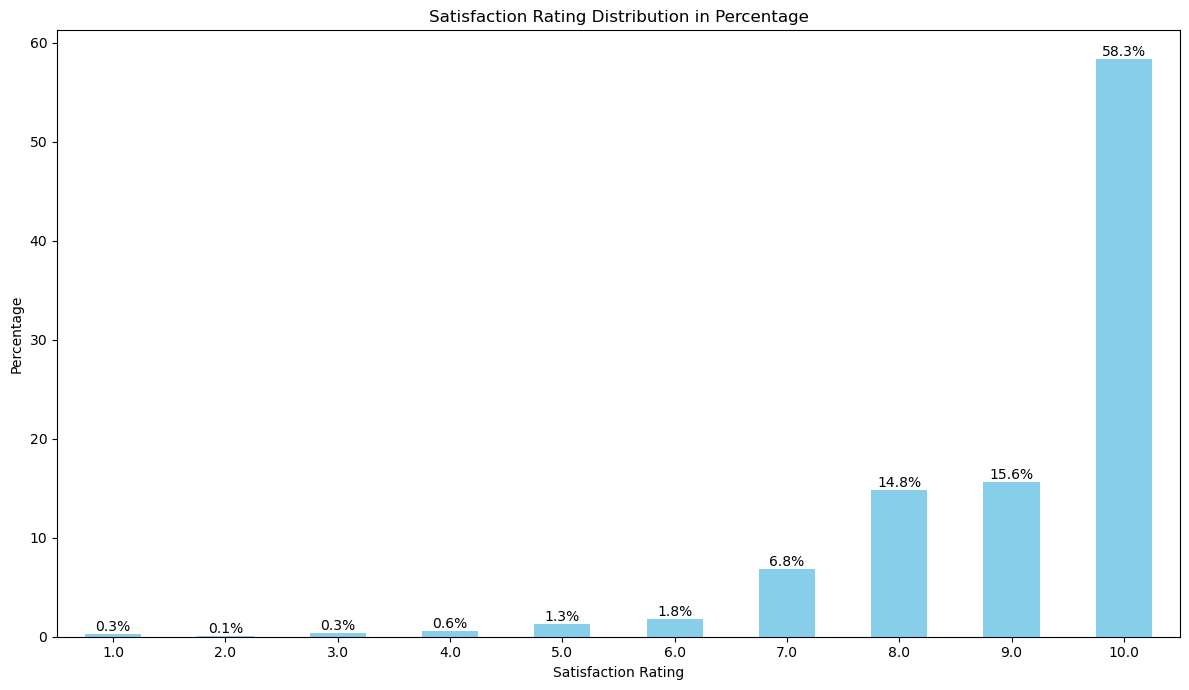

In [295]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Assuming 'Satisfaction_Rating' is a column in your dataset and contains numeric values
# If there are non-numeric values, we convert them to NaN and then drop those rows
data['Satisfaction_Rating'] = pd.to_numeric(data['Satisfaction_Rating'], errors='coerce')
data.dropna(subset=['Satisfaction_Rating'], inplace=True)

# Calculate the percentage for each satisfaction rating
satisfaction_counts = data['Satisfaction_Rating'].value_counts(normalize=True) * 100
satisfaction_counts.sort_index(inplace=True)  # Sort by rating for a meaningful chart

# Plot a bar chart
plt.figure(figsize=(12, 7))
ax = satisfaction_counts.plot(kind='bar', color='skyblue')
plt.title('Satisfaction Rating Distribution in Percentage')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Percentage')
plt.xticks(rotation=0)  # Horizontal x-axis labels are generally better for bar charts

# Add labels to the bars
for index, value in enumerate(satisfaction_counts):
    plt.text(index, value, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Adjust the layout to fit all labels
plt.savefig('E:/Upwork Gold/Saidjah/Satisfaction Rating Distribution in Percentage.png', format='png', dpi=300)
plt.show()


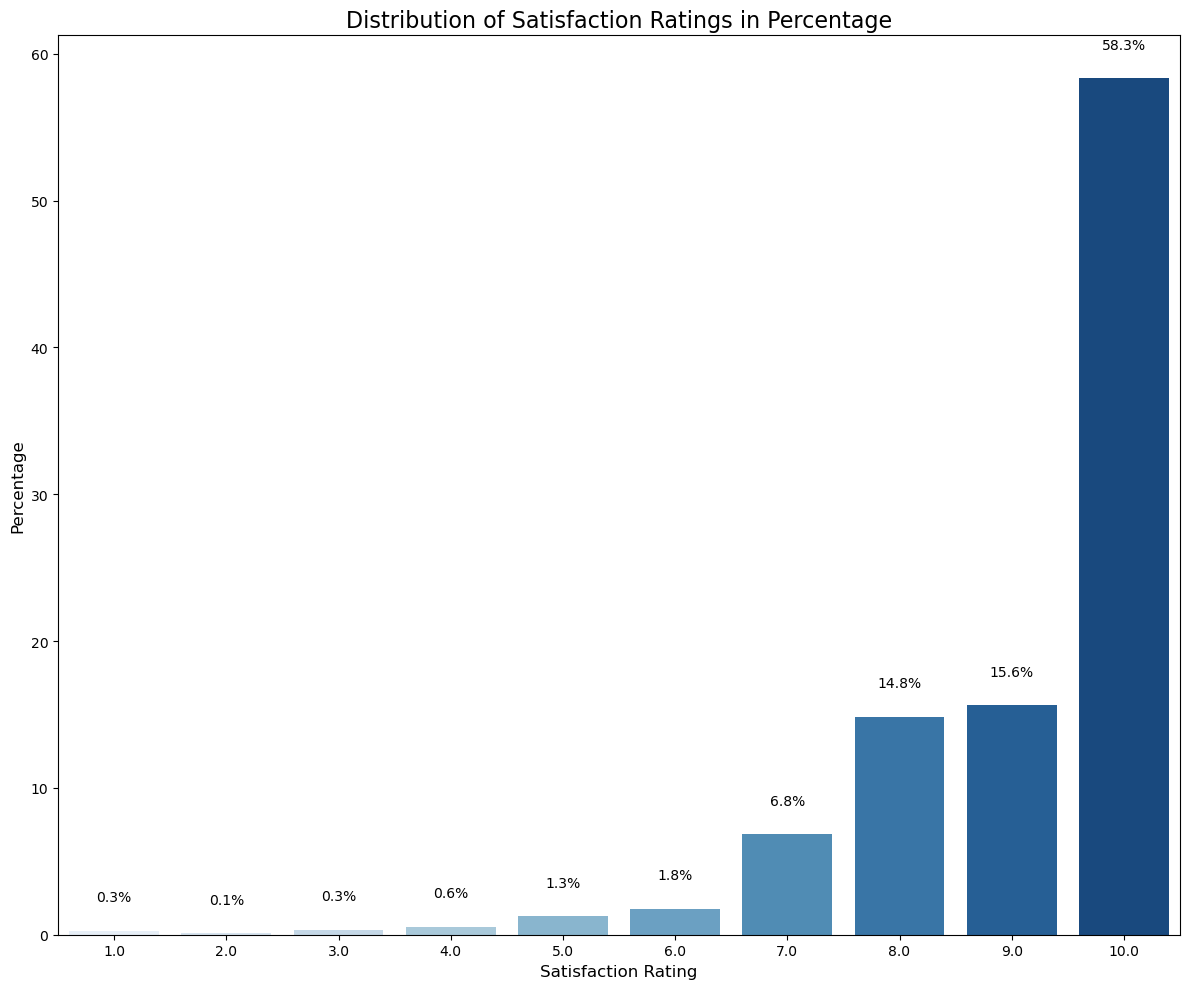

In [296]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Assuming 'Satisfaction_Rating' is a column in your dataset and contains numeric values
# If there are non-numeric values, we convert them to NaN and then drop those rows
data['Satisfaction_Rating'] = pd.to_numeric(data['Satisfaction_Rating'], errors='coerce')
data.dropna(subset=['Satisfaction_Rating'], inplace=True)

# Calculate the percentage for each satisfaction rating
satisfaction_counts = data['Satisfaction_Rating'].value_counts(normalize=True) * 100
satisfaction_counts.sort_index(inplace=True)  # Sort by rating for a meaningful chart

# Define custom color palette
colors = sns.color_palette('Blues', len(satisfaction_counts))

# Create a bar chart with seaborn
plt.figure(figsize=(12, 10))
ax = sns.barplot(x=satisfaction_counts.index, y=satisfaction_counts.values, palette=colors)

# Add labels and titles
plt.title('Distribution of Satisfaction Ratings in Percentage', fontsize=16)
plt.xlabel('Satisfaction Rating', fontsize=12)
plt.ylabel('Percentage', fontsize=12)

# Annotate the bars with percentage values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height + 2), ha='center', fontsize=10)

plt.xticks(rotation=0)  # Horizontal x-axis labels
plt.tight_layout()  # Adjust layout for better visibility
plt.savefig('E:/Upwork Gold/Saidjah/2Distribution of Satisfaction Ratings in percentages.png', format='png', dpi=300)
plt.show()


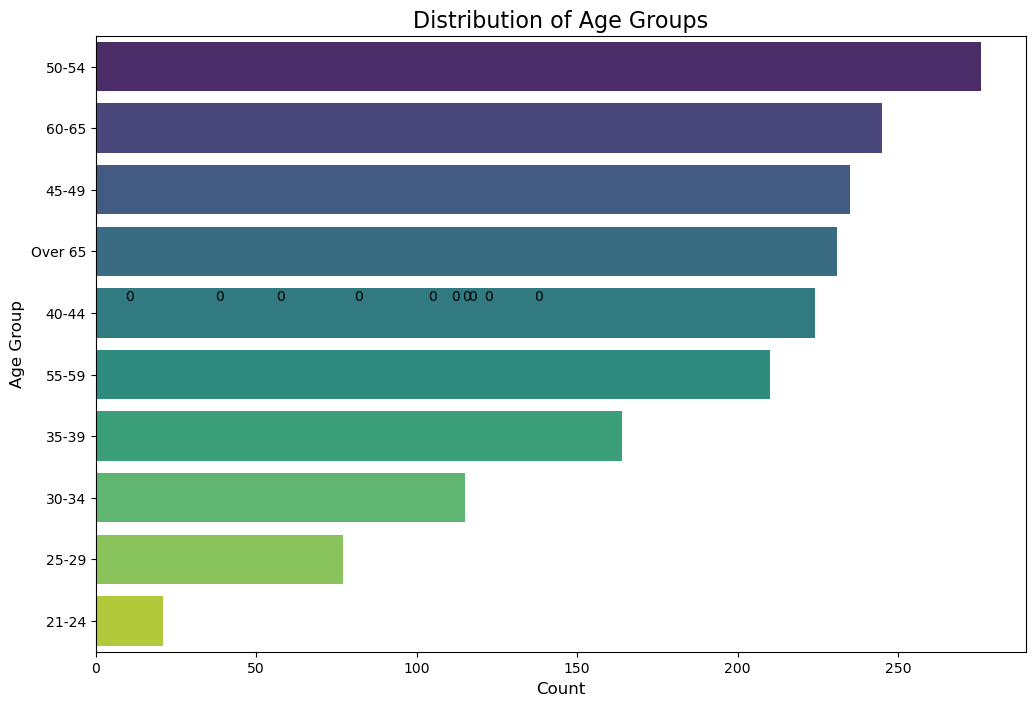

In [297]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to add data labels on the bar plot
def add_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, int(height), ha="center")

# Age Group plot with data labels
plt.figure(figsize=(12, 8))
ax = sns.countplot(y='Age_Group', data=data, order=data['Age_Group'].value_counts().index, palette="viridis")
plt.title('Distribution of Age Groups', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Age Group', fontsize=12)
add_labels(ax)
plt.savefig('E:/Upwork Gold/Saidjah/Distribution of Age Groupss.png', format='png', dpi=300)
plt.show()



In [50]:
df = data

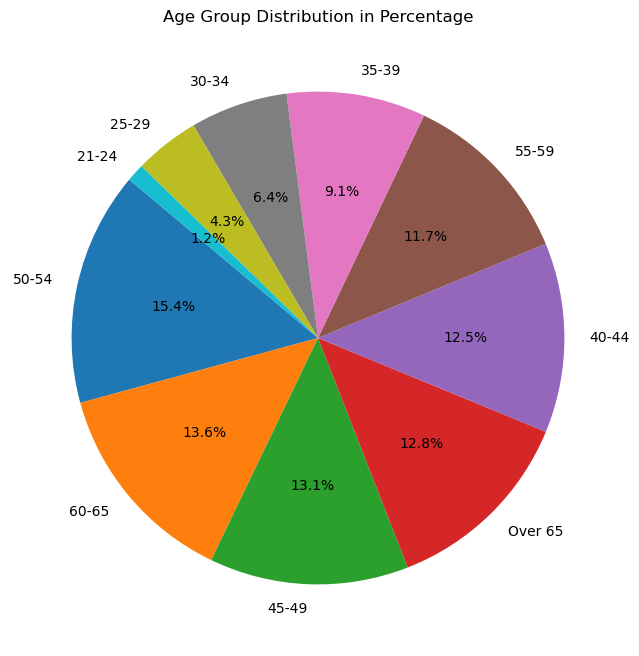

In [299]:
import matplotlib.pyplot as plt

# Calculating the percentage of each age group
age_group_percentages = data['Age_Group'].value_counts(normalize=True) * 100

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_group_percentages, labels=age_group_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Age Group Distribution in Percentage')
plt.savefig('E:/Upwork Gold/Saidjah/Age Group Distribution in Percentages.png', format='png', dpi=300)
plt.show()


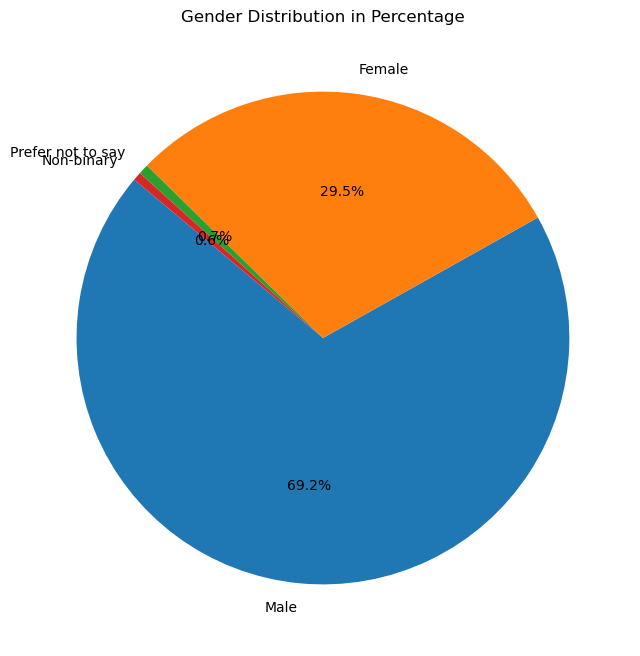

In [301]:
import matplotlib.pyplot as plt

# Calculating the percentage of each gender
gender_percentages = data['Gender'].value_counts(normalize=True) * 100

# Creating the pie chart for Gender Distribution
plt.figure(figsize=(8, 8))
plt.pie(gender_percentages, labels=gender_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution in Percentage')
plt.savefig('E:/Upwork Gold/Saidjah/Genderr Distribution in Percentaage.png', format='png', dpi=300)
plt.show()


## Gender Distribution

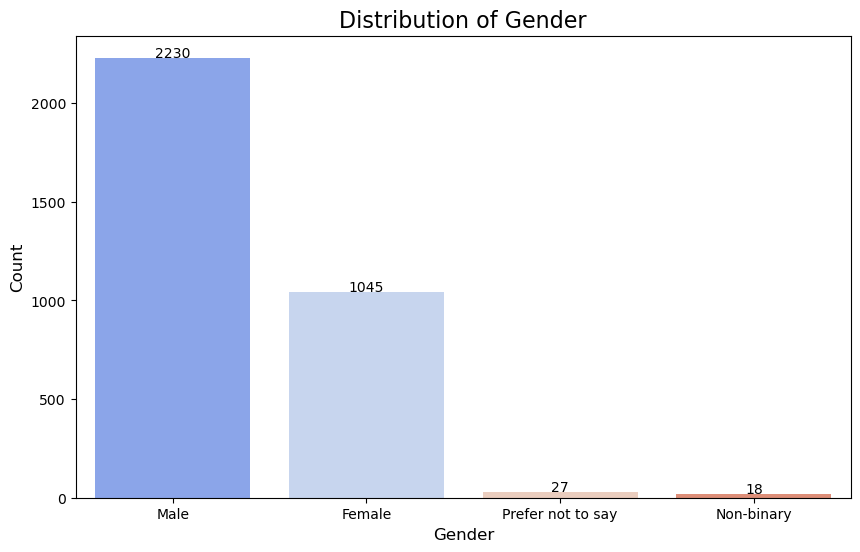

In [10]:
# Gender plot with data labels
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Gender', data=data, order=data['Gender'].value_counts().index, palette="coolwarm")
plt.title('Distribution of Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
add_labels(ax)
plt.savefig('E:/Upwork Gold/Saidjah/Genderr Distribution in Percentaage.png', format='png', dpi=300)
plt.show()


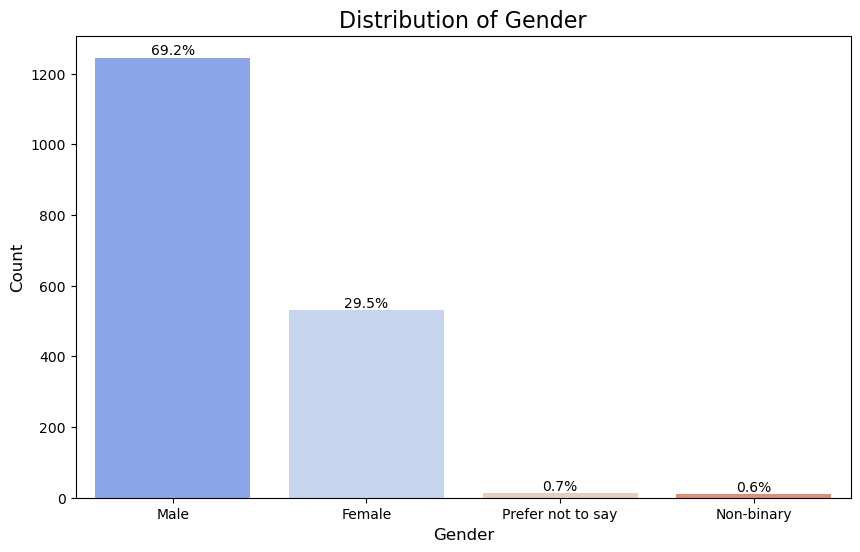

In [303]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Function to add labels to the plot
def add_labels(ax):
    for p in ax.patches:
        # Calculate percentage and format it as a string
        percentage = f'{100 * p.get_height() / len(data):.1f}%'
        # Get the coordinate for the label
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        # Place the label on the bar
        ax.text(x, y, percentage, ha='center', va='bottom')

# Gender plot with data labels
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Gender', data=data, order=data['Gender'].value_counts().index, palette="coolwarm")
plt.title('Distribution of Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add labels
add_labels(ax)

# Save the figure with percentage labels
plt.savefig('E:/Upwork Gold/Saidjah/Genderr Distr.png', format='png', dpi=300)
plt.show()


## Device Category 

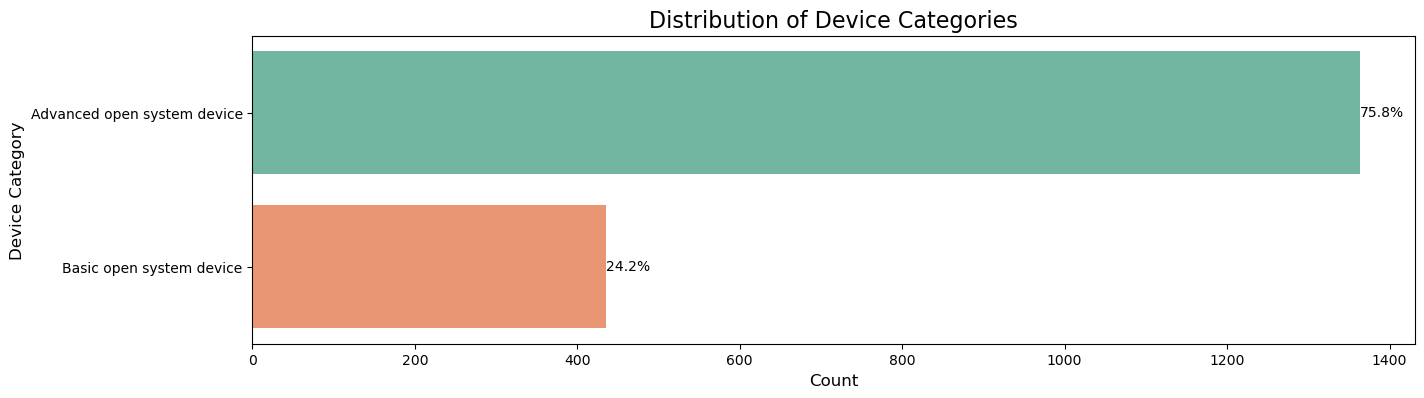

In [310]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame with a 'Device_Category' column
# data = pd.read_excel('your_data_file.xlsx')

# Function to add percentage labels to horizontal bars
def add_labels(ax):
    for p in ax.patches:
        percentage = f'{100 * p.get_width() / len(data):.1f}%'
        x = p.get_width()
        y = p.get_y() + p.get_height() / 2
        ax.text(x, y, percentage, ha='left', va='center')

# Device Category plot with data labels
plt.figure(figsize=(15, 4))
ax = sns.countplot(y='Device_Category', data=data, order=data['Device_Category'].value_counts().index, palette="Set2")
plt.title('Distribution of Device Categories', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Device Category', fontsize=12)

# Add labels
add_labels(ax)

plt.savefig('E:/Upwork Gold/Saidjah/Distr of Device Categories.png', format='png', dpi=300)

# Show the plot
plt.show()


<Figure size 1200x800 with 0 Axes>

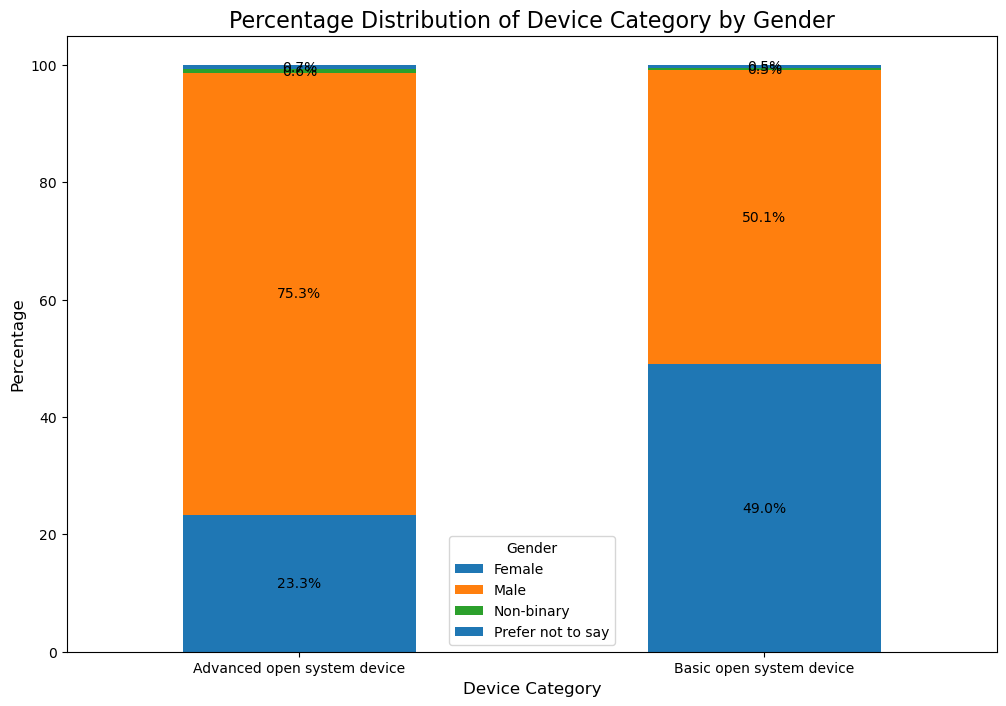

In [313]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it has 'Device_Category' and 'Gender' columns
# data = pd.read_excel('your_data_file.xlsx')

# Preparing data for 'Percentage Distribution of Device Category by Gender'
device_gender_crosstab = pd.crosstab(data['Device_Category'], data['Gender'], normalize='index') * 100

# Plotting the stacked bar chart for Device Category by Gender
plt.figure(figsize=(12, 8))
ax = device_gender_crosstab.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e', '#2ca02c'], figsize=(12, 8))
plt.title('Percentage Distribution of Device Category by Gender', fontsize=16)
plt.xlabel('Device Category', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(title='Gender')
plt.xticks(rotation=0)

# Adding percentage labels to each bar segment
for n, bar in enumerate(ax.patches):
    # Calculate percentage for each bar segment
    left, bottom, width, height = bar.get_bbox().bounds
    segment_percentage = height
    # Set the position of the percentage label
    x_pos = left + width / 2
    y_pos = bottom + height / 2
    # Place the label within each segment
    if height > 0: # to avoid labels for empty bar segments
        ax.text(x_pos, y_pos, f'{segment_percentage:.1f}%', ha='center', va='center')

plt.savefig('E:/Upwork Gold/Saidjah/Percentage Distribution of Device Categoory by Genderr.png', format='png', dpi=300)

plt.show()


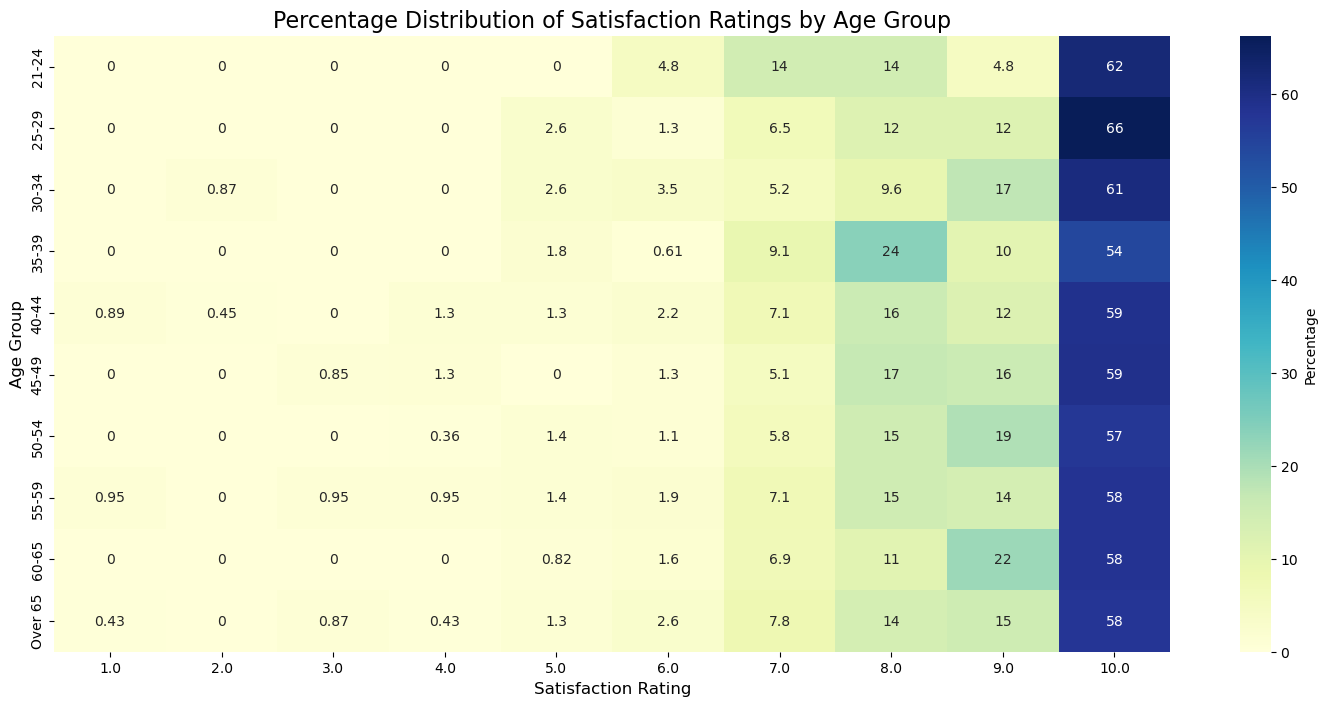

In [316]:
# Preparing data for 'Percentage Distribution of Satisfaction Ratings by Age Group'
satisfaction_age_crosstab = pd.crosstab(data['Age_Group'], data['Satisfaction_Rating'], normalize='index') * 100

# Plotting the heatmap for Satisfaction Ratings by Age Group
plt.figure(figsize=(18, 8))
sns.heatmap(satisfaction_age_crosstab, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Percentage'})
plt.title('Percentage Distribution of Satisfaction Ratings by Age Group', fontsize=16)
plt.xlabel('Satisfaction Rating', fontsize=12)
plt.ylabel('Age Group', fontsize=12)
plt.savefig('E:/Upwork Gold/Saidjah/Percentage Distribution of Satisfaction Ratings by Age Groupp.png', format='png', dpi=300)
plt.show()


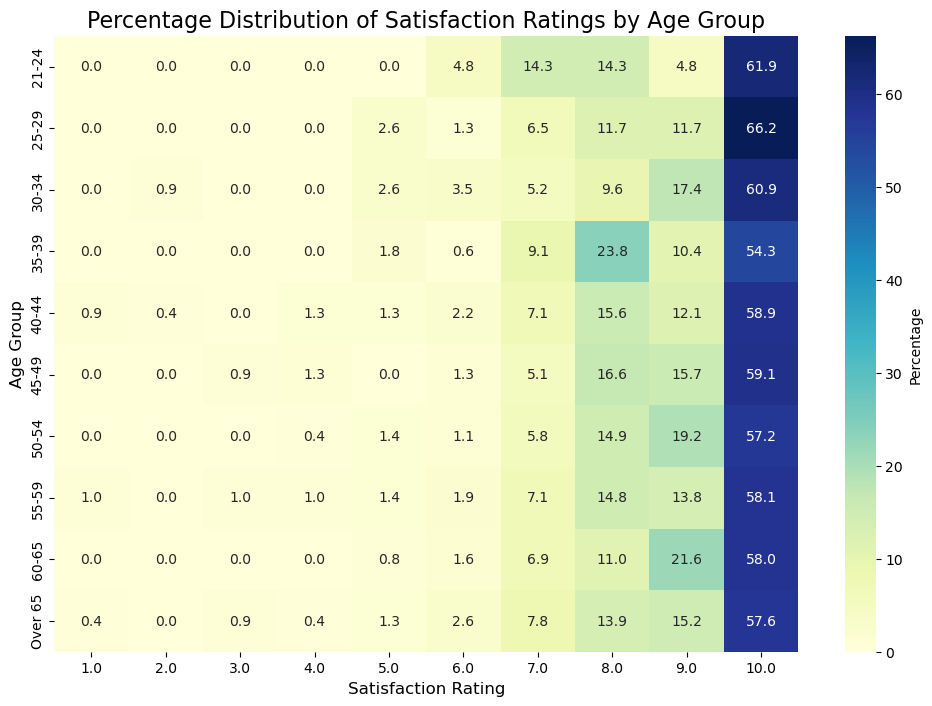

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing data for 'Percentage Distribution of Satisfaction Ratings by Age Group'
satisfaction_age_crosstab = pd.crosstab(data['Age_Group'], data['Satisfaction_Rating'], normalize='index') * 100

# Plotting the heatmap for Satisfaction Ratings by Age Group
plt.figure(figsize=(12, 8))
sns.heatmap(satisfaction_age_crosstab, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Percentage'}, fmt=".1f")  # Format the annotations
plt.title('Percentage Distribution of Satisfaction Ratings by Age Group', fontsize=16)
plt.xlabel('Satisfaction Rating', fontsize=12)
plt.ylabel('Age Group', fontsize=12)
plt.show()


The heatmap above illustrates the "Percentage Distribution of Satisfaction Ratings by Age Group." Each cell in the heatmap shows the percentage of respondents within an age group giving a specific satisfaction rating. This visualization helps in understanding how satisfaction varies across different age groups.

### Enhanced Pie Chart
An improved pie chart with a sophisticated color palette.

<Figure size 1400x800 with 0 Axes>

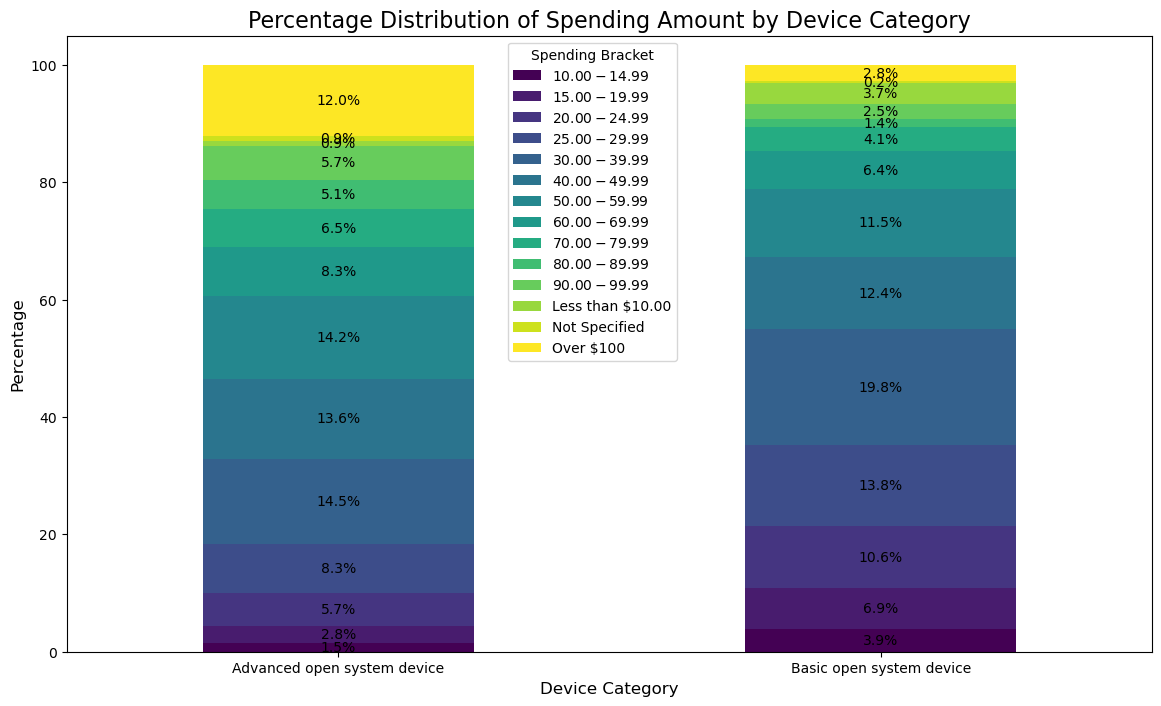

In [430]:
import pandas as pd
import matplotlib.pyplot as plt

# Preparing data for 'Percentage Distribution of Spending Bracket by Device Category'
spending_device_crosstab = pd.crosstab(data['Device_Category'], data['Spending_Bracket'], normalize='index') * 100

# Plotting the grouped bar chart for Spending Bracket by Device Category
plt.figure(figsize=(14, 8))
ax = spending_device_crosstab.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Percentage Distribution of Spending Amount by Device Category', fontsize=16)
plt.xlabel('Device Category', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Spending Bracket', bbox_to_anchor=(0.4, 1), loc='upper left')

# Add labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.savefig('E:/Upwork Gold/Saidjah/Percentage Distribution of Spending Bracket by Device Categoryy.png', format='png', dpi=300)
plt.show()


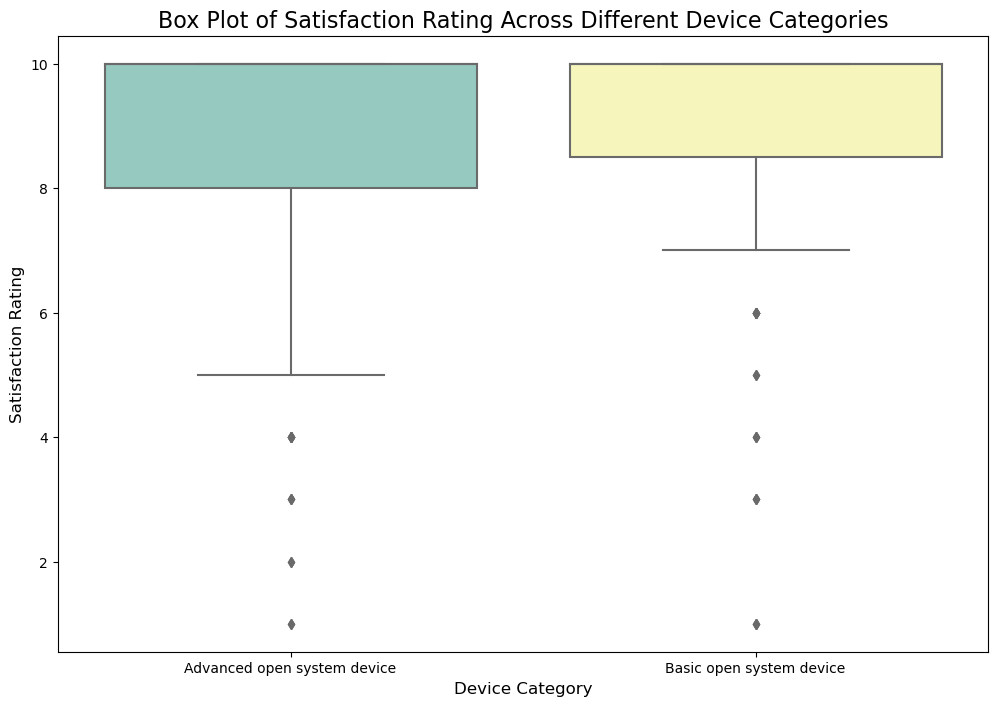

In [320]:
# Preparing data for Box Plot of Satisfaction Rating Across Different Device Categories
# Filtering out 'Not Rated' responses
filtered_data = data[data['Satisfaction_Rating'] != 'Not Rated']

# Converting Satisfaction Rating to numeric for the plot
filtered_data['Satisfaction_Rating'] = pd.to_numeric(filtered_data['Satisfaction_Rating'])

# Creating the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Device_Category', y='Satisfaction_Rating', data=filtered_data, palette="Set3")
plt.title('Box Plot of Satisfaction Rating Across Different Device Categories', fontsize=16)
plt.xlabel('Device Category', fontsize=12)
plt.ylabel('Satisfaction Rating', fontsize=12)
plt.xticks(rotation=0)

plt.savefig('E:/Upwork Gold/Saidjah/PBox Plot of Satisfaiction Rating Across Different Device Categories.png', format='png', dpi=300)
plt.show()


The box plot above illustrates the "Satisfaction Rating Across Different Device Categories." Here are some insights we can gather from this visualization:

Variability in Satisfaction: The range of the boxes and the whiskers show the variability in satisfaction ratings for each device category. A larger box or longer whiskers indicate more variability in how satisfied users are with that category.

Median Satisfaction: The line in the middle of each box represents the median satisfaction rating. This is a good indicator of the overall satisfaction level for each device category. A higher median suggests higher overall satisfaction.

Outliers: The points outside the whiskers represent outliers. These are satisfaction ratings that are significantly higher or lower than the typical ratings for that category. The presence of outliers can indicate extreme opinions or experiences with a particular device category.

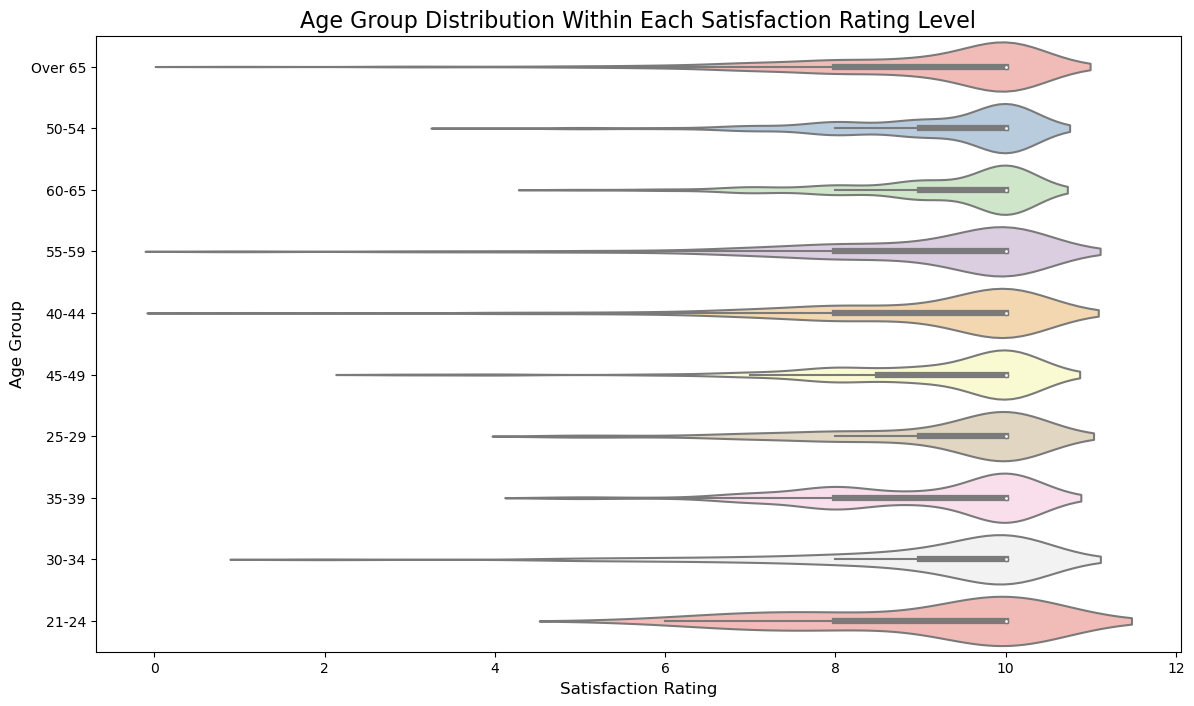

In [321]:
# Preparing data for Age Group Distribution Within Each Satisfaction Rating Level
# Using a violin plot to show this distribution
plt.figure(figsize=(14, 8))
sns.violinplot(x='Satisfaction_Rating', y='Age_Group', data=filtered_data, palette="Pastel1", scale='width')
plt.title('Age Group Distribution Within Each Satisfaction Rating Level', fontsize=16)
plt.xlabel('Satisfaction Rating', fontsize=12)
plt.ylabel('Age Group', fontsize=12)
plt.savefig('E:/Upwork Gold/Saidjah/Age Group Distribution Within Each Satisfaction Rating Levell.png', format='png', dpi=300)
plt.show()


The violin plot above shows the "Age Group Distribution Within Each Satisfaction Rating Level." Here are some key insights from this visualization:

Age Group Spread: The width of each 'violin' at different points indicates the frequency of respondents in each age group giving a particular satisfaction rating. Wider sections of the violin mean a higher concentration of respondents from that age group at that rating level.

Rating Tendencies Across Age Groups: By observing the shape and distribution within each violin, we can infer how different age groups tend to rate their satisfaction. For instance, if a particular age group has a broader section at higher ratings, it suggests that age group generally gives higher satisfaction ratings.

Outliers and Distribution: The thickness of the violin at different points shows the distribution of ratings within an age group. If the violin is particularly thin at certain ratings, it indicates fewer respondents from that age group gave such ratings.

This visualization helps in understanding how satisfaction ratings vary across different age groups, showing which age groups are more likely to give high or low satisfaction ratings.

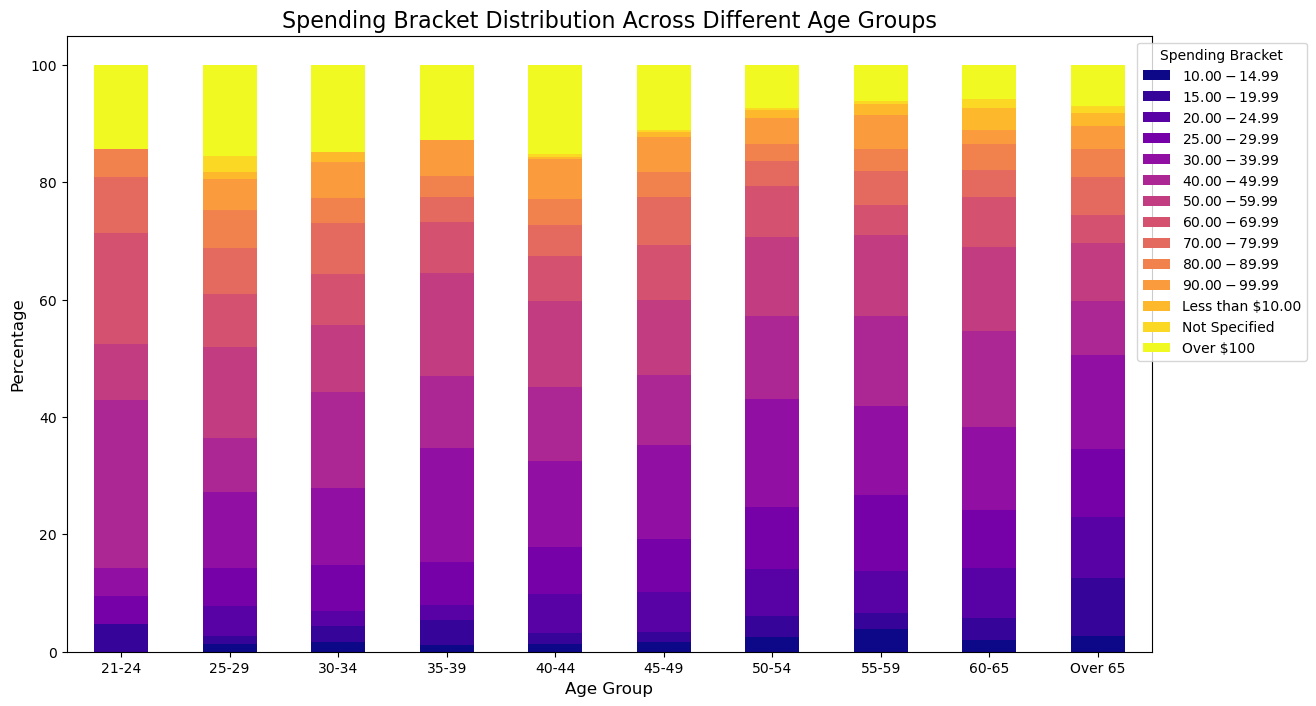

In [435]:
# Preparing data for Spending Bracket Distribution Across Different Age Groups
spending_age_crosstab = pd.crosstab(data['Age_Group'], data['Spending_Bracket'], normalize='index') * 100

# Plotting the stacked bar chart for Spending Bracket Distribution Across Different Age Groups
spending_age_crosstab.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='plasma')
plt.title('Spending Bracket Distribution Across Different Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Spending Bracket', bbox_to_anchor=(0.98, 1), loc='upper left')
plt.savefig('E:/Upwork Gold/Saidjah/Spending Bracket Distribution Accross Different Age Groupsss.png', format='png', dpi=300)
plt.show()



<Figure size 1400x800 with 0 Axes>

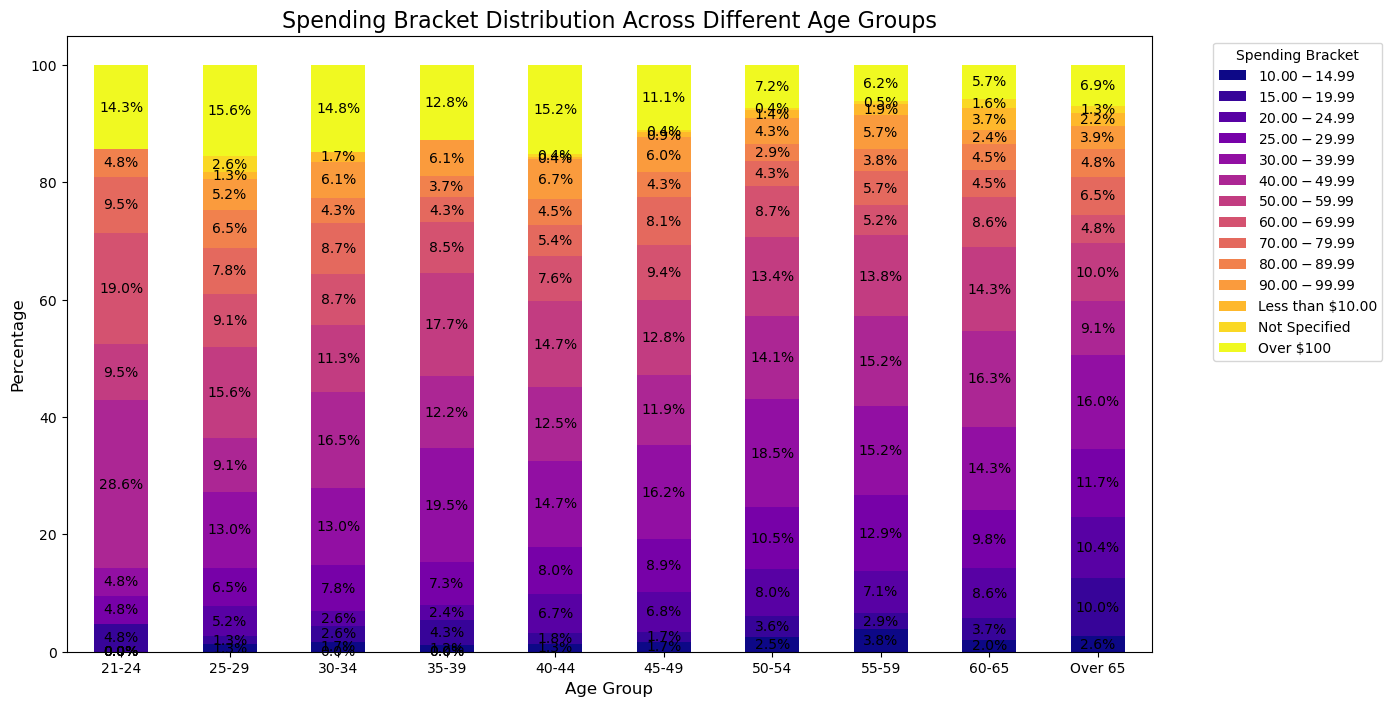

In [349]:
import pandas as pd
import matplotlib.pyplot as plt

# Preparing data for Spending Bracket Distribution Across Different Age Groups
spending_age_crosstab = pd.crosstab(data['Age_Group'], data['Spending_Bracket'], normalize='index') * 100

# Plotting the stacked bar chart for Spending Bracket Distribution Across Different Age Groups
plt.figure(figsize=(14, 8))
ax = spending_age_crosstab.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='plasma')
plt.title('Spending Bracket Distribution Across Different Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Spending Bracket', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.savefig('E:/Upwork Gold/Saidjah/3Spending Bracket Distribution Across Different Age Groups.png', format='png', dpi=300)
plt.show()

Spending Patterns Across Age Groups: Each bar represents an age group, and the colored segments indicate the proportion of that age group within each spending bracket. This visualization allows us to see how spending preferences vary across different age groups.

Dominant Spending Brackets: For each age group, the most dominant spending brackets can be identified by the largest segments. This gives an idea of which price ranges are most popular among different age groups.

Comparative Analysis: By comparing the bars, we can understand which age groups are more inclined towards higher or lower spending. For example, if one age group has a larger proportion of its bar in higher spending brackets compared to others, it suggests that this age group tends to spend more on these products.

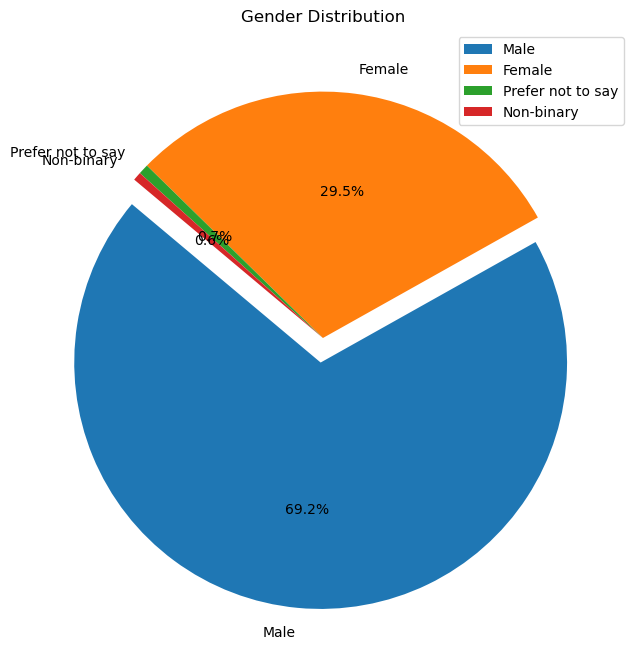

In [351]:
import matplotlib.pyplot as plt

# Pie Chart - Gender Distribution in %
gender_counts = df['Gender'].value_counts(normalize=True) * 100
explode_values = [0.1 if i == max(gender_counts) else 0 for i in gender_counts]  # Explode the largest slice
plt.figure(figsize=(8,8))  # Increase figure size
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, explode=explode_values)
plt.title('Gender Distribution')
plt.ylabel('')  # Hides the y-label
plt.legend(labels=gender_counts.index, loc='best')  # Add a legend

plt.savefig('E:/Upwork Gold/Saidjah/Pie Gender Distr.png', format='png', dpi=300)
plt.show()


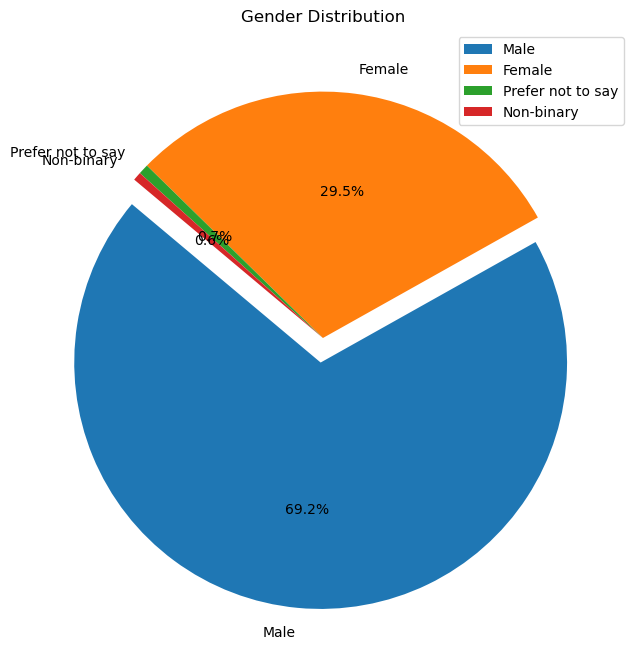

In [330]:
import matplotlib.pyplot as plt

# Pie Chart - Gender Distribution in %
gender_counts = df['Gender'].value_counts(normalize=True) * 100
explode_values = [0.1 if i == max(gender_counts) else 0 for i in gender_counts]  # Explode the largest slice
plt.figure(figsize=(8, 8))  # Increase figure size
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, explode=explode_values)
plt.title('Gender Distribution')
plt.ylabel('')  # Hides the y-label
plt.legend(labels=gender_counts.index, loc='best')  # Add a legend
plt.show()


In [65]:
Spending_Midpoint = data['Spending_Midpoint']

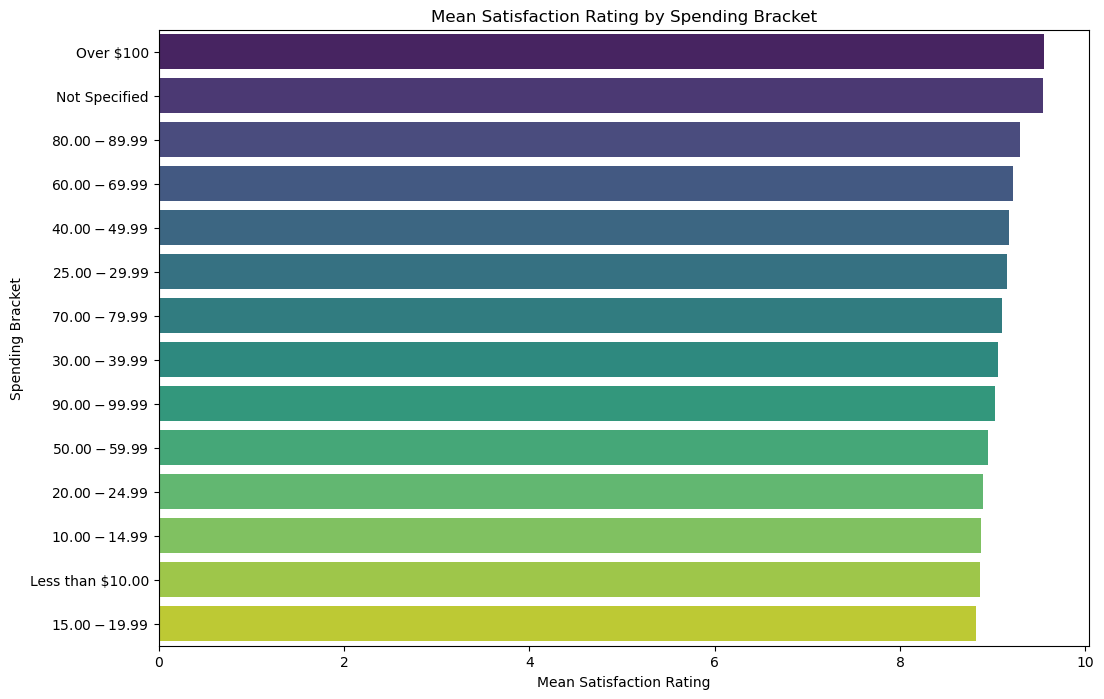

In [353]:
# Calculate the mean satisfaction rating for each spending bracket
# Ensure 'Satisfaction_Rating' is numeric
data['Satisfaction_Rating'] = pd.to_numeric(data['Satisfaction_Rating'], errors='coerce')
mean_satisfaction_by_spending = data.groupby('Spending_Bracket')['Satisfaction_Rating'].mean().reset_index()

# Sort the results for better visualization
mean_satisfaction_by_spending_sorted = mean_satisfaction_by_spending.sort_values(by='Satisfaction_Rating', ascending=False)

# Create a bar chart for Mean Satisfaction Rating by Spending Bracket
plt.figure(figsize=(12, 8))
sns.barplot(x='Satisfaction_Rating', y='Spending_Bracket', data=mean_satisfaction_by_spending_sorted, palette='viridis')
plt.title('Mean Satisfaction Rating by Spending Bracket')
plt.xlabel('Mean Satisfaction Rating')
plt.ylabel('Spending Bracket')
plt.savefig('E:/Upwork Gold/Saidjah/Satisfaction Rates by Spending Brackett.png', format='png', dpi=300)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


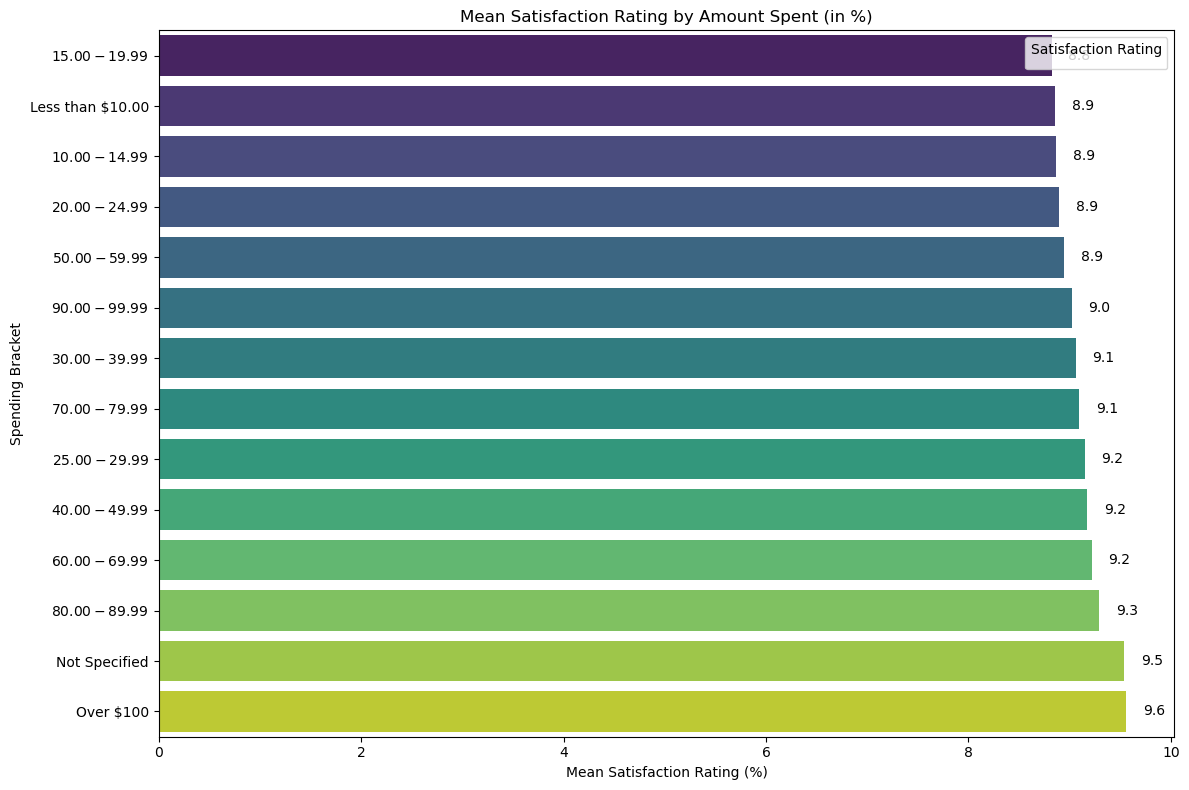

In [354]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and it has 'Spending_Bracket' and 'Satisfaction_Rating' columns
# Ensure 'Satisfaction_Rating' is a numeric column
data['Satisfaction_Rating'] = pd.to_numeric(data['Satisfaction_Rating'], errors='coerce')

# Calculate the mean satisfaction rating for each spending bracket
mean_satisfaction_by_spending = data.groupby('Spending_Bracket')['Satisfaction_Rating'].mean().reset_index()

# Sort the results for better visualization
mean_satisfaction_by_spending_sorted = mean_satisfaction_by_spending.sort_values('Satisfaction_Rating')

# Create a bar chart for Mean Satisfaction Rating by Spending Bracket
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Satisfaction_Rating', y='Spending_Bracket', data=mean_satisfaction_by_spending_sorted, palette='viridis')

# Add labels to each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_width(), '.1f'), 
                     (p.get_width(), p.get_y() + p.get_height() / 2.), 
                     ha = 'center', va = 'center', 
                     xytext = (20, 0), 
                     textcoords = 'offset points')

plt.title('Mean Satisfaction Rating by Amount Spent (in %)')
plt.xlabel('Mean Satisfaction Rating (%)')
plt.ylabel('Spending Bracket')
plt.legend(title='Satisfaction Rating')
plt.tight_layout()  # Adjust layout to fit all labels
plt.savefig('E:/Upwork Gold/Satisfaction Rating by Spendinng Brracket.png', format='png', dpi=300)
plt.show()



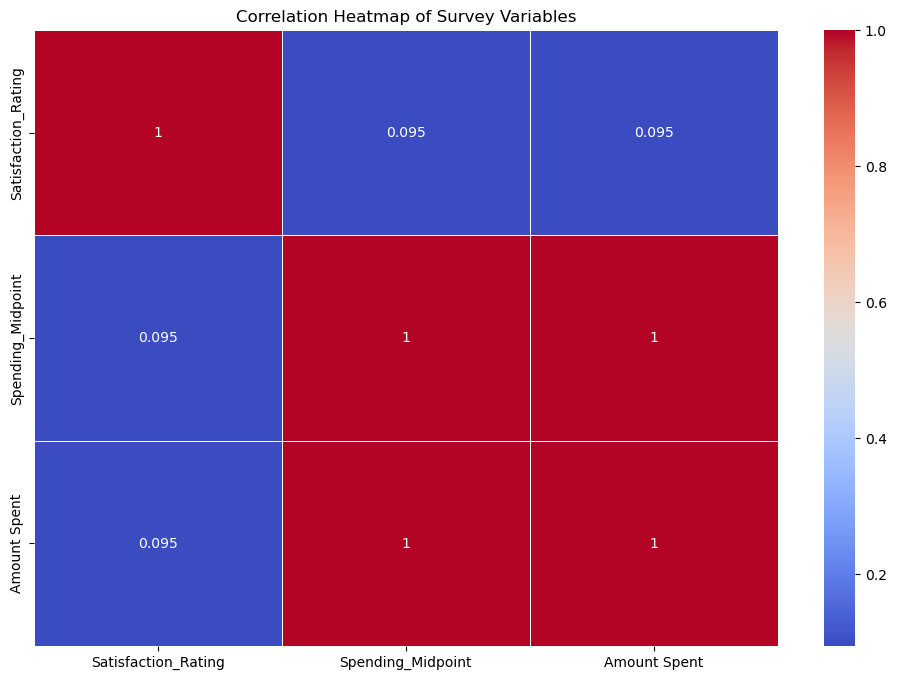

In [360]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Ensure that the relevant columns are in numeric format
# For instance, if 'Satisfaction_Rating' and 'Spending_Midpoint' are not numeric, convert them
data['Satisfaction_Rating'] = pd.to_numeric(data['Satisfaction_Rating'], errors='coerce')
data['Spending_Midpoint'] = pd.to_numeric(data['Spending_Midpoint'], errors='coerce')

# Selecting only the numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Survey Variables')
plt.savefig('E:/Upwork Gold/HeATMAP cORRELATION.png', format='png', dpi=300)
plt.show()


Strong Positive Correlation with Itself: As expected, both Satisfaction_Rating and Spending_Midpoint show a perfect positive correlation with themselves, which is why the diagonal cells have a correlation coefficient of 1.

Very Low Correlation Between Variables: The correlation between Satisfaction_Rating and Spending_Midpoint is very low, as indicated by the value of 0.095. This suggests that there is almost no linear relationship between these two variables. In practical terms, this means that changes in satisfaction ratings are not strongly associated with changes in spending midpoint, at least linearly.

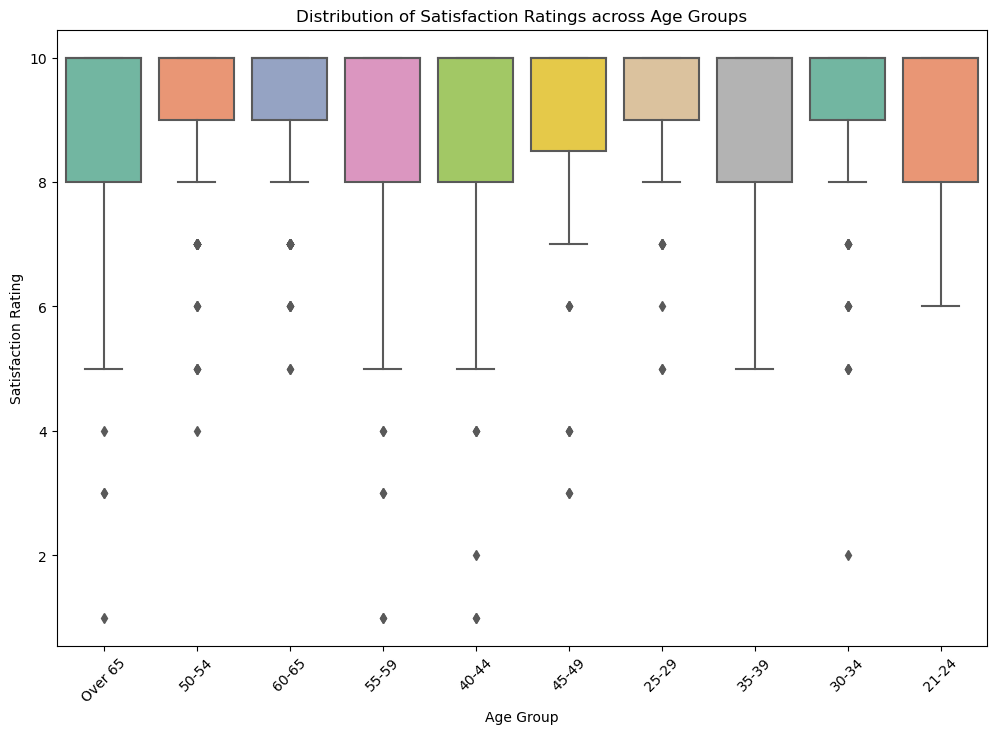

In [361]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Ensuring 'Satisfaction_Rating' is a numeric column
data['Satisfaction_Rating'] = pd.to_numeric(data['Satisfaction_Rating'], errors='coerce')

# Create a box plot for Satisfaction Ratings across Age Groups
plt.figure(figsize=(12, 8))
sns.boxplot(x='Age_Group', y='Satisfaction_Rating', data=data, palette='Set2')
plt.title('Distribution of Satisfaction Ratings across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Satisfaction Rating')
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability
plt.savefig('E:/Upwork Gold/Distr of Satisfaction Rating in AgeEGroups.png', format='png', dpi=300)
plt.show()


This box plot will help in visualizing the distribution (median, quartiles, and outliers) of satisfaction ratings within each age group. It's a powerful way to see variations within each category and to spot any patterns or anomalies.

Central Line of the Box: This represents the median of the satisfaction ratings for each age group. It's the middle value of the data.

Bottom and Top of the Box: These are the first quartile (Q1, 25th percentile) and third quartile (Q3, 75th percentile) respectively. This means that 50% of the data falls within the box.

Whiskers (Vertical Lines): These lines extend from the quartiles to the minimum and maximum values that are not considered outliers. They represent the range of the data.

Outliers: These are represented by diamonds or dots outside of the whiskers. An outlier is an observation that lies an abnormal distance from other values. They might indicate variability in the data or indicate experimental errors.

From the provided graph, we can deduce the following:

The median satisfaction rating across age groups is generally around the middle to upper half of the rating scale, suggesting moderate to high satisfaction.
The age groups are displayed in a non-standard order. For a clearer interpretation, they might be better presented in ascending or descending order.
There's variability in satisfaction within each age group, as shown by the range of the box and whiskers.
There appear to be outliers in some age groups, as indicated by the diamonds below the bottom whisker. This suggests there are individuals with satisfaction ratings significantly lower than the rest of the group.

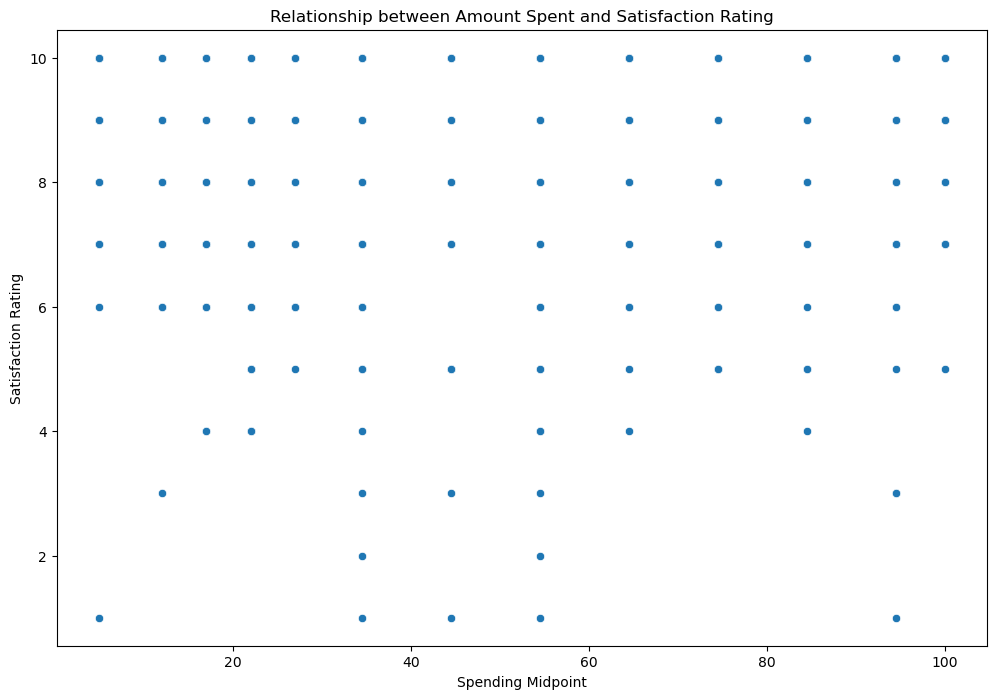

In [362]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Ensure the columns are in the right format
data['Satisfaction_Rating'] = pd.to_numeric(data['Satisfaction_Rating'], errors='coerce')
data['Spending_Midpoint'] = pd.to_numeric(data['Spending_Midpoint'], errors='coerce')

# Create a scatter plot for Satisfaction Rating vs. Spending Midpoint
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Spending_Midpoint', y='Satisfaction_Rating', data=data)
plt.title('Relationship between Amount Spent and Satisfaction Rating')
plt.xlabel('Spending Midpoint')
plt.ylabel('Satisfaction Rating')
plt.savefig('E:/Upwork Gold/Relationship between Amount Spent. and Satisfaction Ratingg.png', format='png', dpi=300)
plt.show()


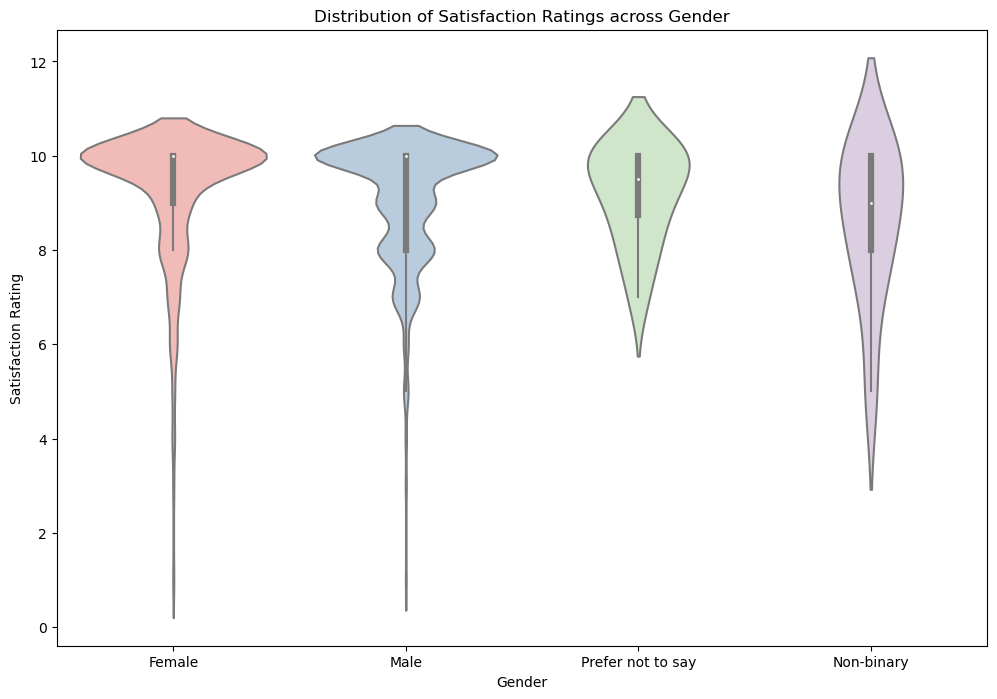

In [364]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Ensuring 'Satisfaction_Rating' is a numeric column
data['Satisfaction_Rating'] = pd.to_numeric(data['Satisfaction_Rating'], errors='coerce')

# Create a violin plot for Satisfaction Ratings across Gender
plt.figure(figsize=(12, 8))
sns.violinplot(x='Gender', y='Satisfaction_Rating', data=data, palette='Pastel1')
plt.title('Distribution of Satisfaction Ratings across Gender')
plt.xlabel('Gender')
plt.ylabel('Satisfaction Rating')
plt.savefig('E:/Upwork Gold/Dist of Satisfactionn Ratings across Gennder.png', format='png', dpi=300)
plt.show()


Shape of the Violin: Each 'violin' represents the distribution of satisfaction ratings for a given gender category. The width of the violin at different points corresponds to the number of observations (frequency) that fall at that level of satisfaction rating. Wider sections represent a higher frequency of responses in that range, and narrower sections represent fewer responses.

White Dot: This typically represents the median of the distribution.

Thick Bar in the Center of the Violin: This is often the interquartile range (IQR), showing where the middle 50% of the data lies.

Thin Line: This represents the rest of the distribution, except for potential outliers, which might be plotted individually using points outside the line.

From the provided graph, we can infer the following:

The median satisfaction rating appears to be above 5 for all gender categories since the white dots are located above the 5 mark.
The distribution of satisfaction ratings for "Female" and "Male" categories seems similar, with a wide middle section suggesting a large concentration of responses around the median.
The "Prefer not to say" category has a more uniform distribution, as indicated by the relatively even width throughout.
The "Non-binary" category appears to have a more bimodal distribution, with two wider sections suggesting concentrations of responses at different levels of the satisfaction rating scale.
It looks like the "Female" and "Male" categories might have a slightly higher median satisfaction rating compared to the "Non-binary" category, but this would need to be confirmed with the actual median values.

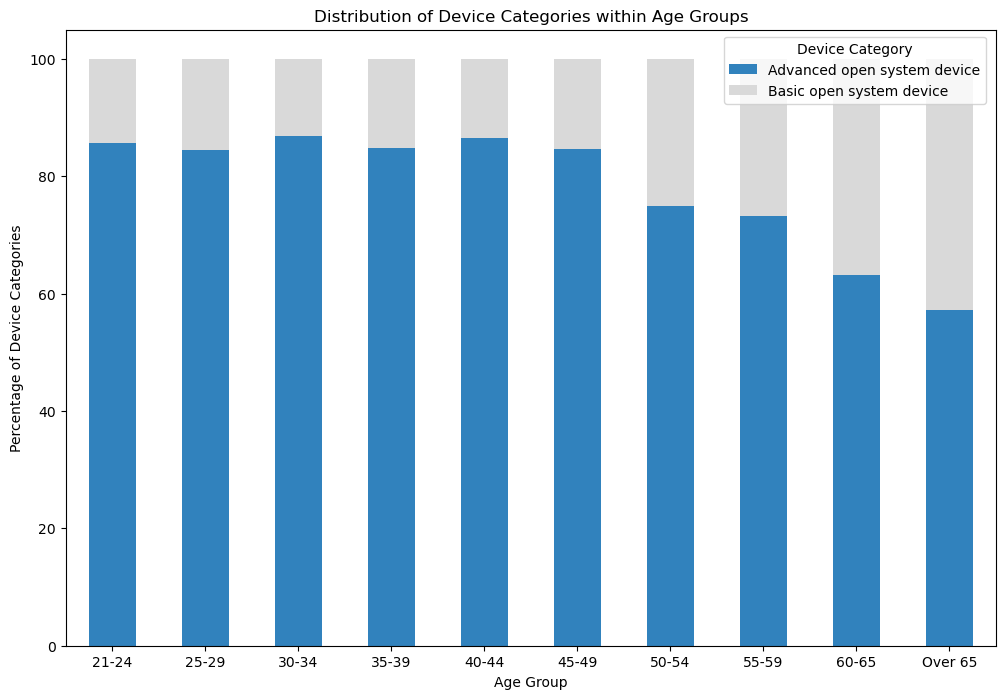

In [428]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Calculate the proportion of each device category within each age group
age_device_crosstab = pd.crosstab(data['Age_Group'], data['Device_Category'], normalize='index') * 100

# Create a stacked bar chart
age_device_crosstab.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20c')
plt.title('Distribution of Device Categories within Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Device Categories')
plt.legend(title='Device Category', bbox_to_anchor=(0.7, 1), loc='upper left')
plt.xticks(rotation=0)
plt.savefig('E:/Upwork Gold/Distributionl of Device Categories within Age Grouups.png', format='png', dpi=300)
plt.show()


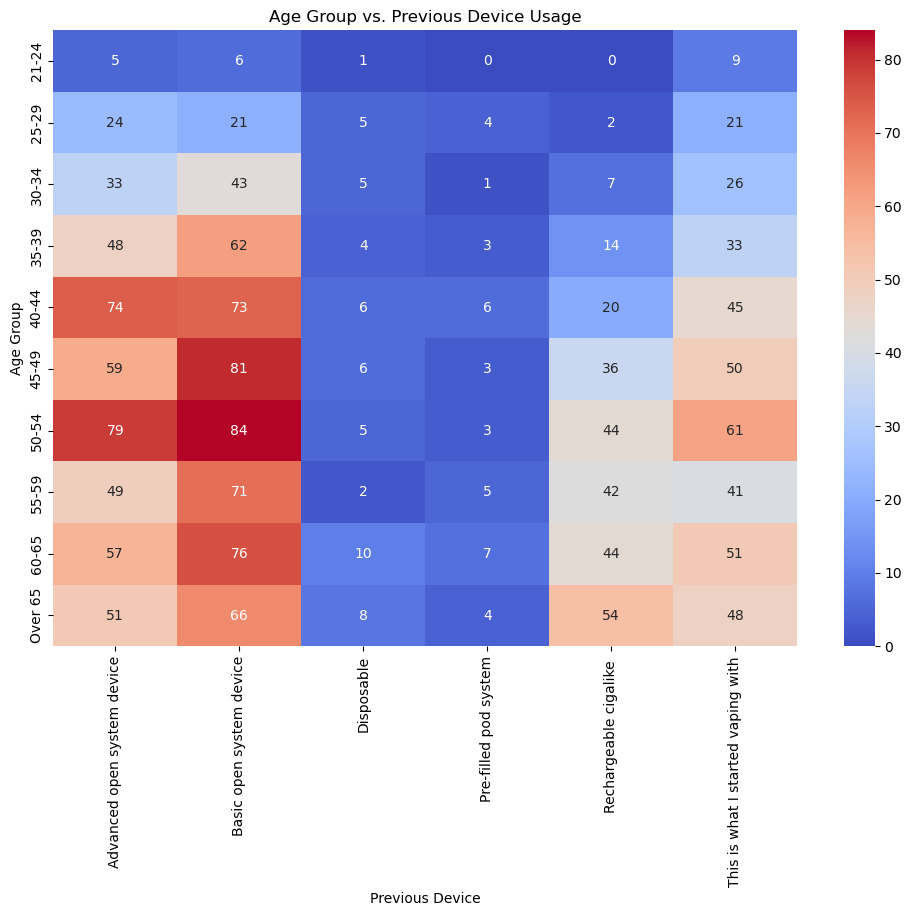

In [366]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Creating a crosstab for the heatmap
age_previous_device_crosstab = pd.crosstab(data['Age_Group'], data['Previous_Device'])

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(age_previous_device_crosstab, annot=True, fmt='d', cmap='coolwarm')
plt.title('Age Group vs. Previous Device Usage')
plt.xlabel('Previous Device')
plt.ylabel('Age Group')
plt.savefig('E:/Upwork Gold/Heatmap Age Group vs. Previous Device Usage.png', format='png', dpi=300)
plt.show()


Axes: The y-axis represents different age groups, and the x-axis represents various types of previous device usage.

Color Scale: On the right side of the heatmap, there's a color scale ranging from blue to red. In this heatmap, cooler colors (blues) indicate lower numbers, and warmer colors (reds) indicate higher numbers. The scale shows that the numbers range from 0 to around 80 or more.

Cells: Each cell's color represents the number of survey respondents that fall into the corresponding category, with the actual number displayed inside the cell.

From this heatmap, you can infer:

The highest concentrations of previous device usage are within certain age groups for specific types of devices. For example, the "advanced open system device" and "basic open system device" seem particularly popular in the "55-59" and "60-65" age groups, as indicated by the deeper red colors and higher numbers in those cells.
Some devices, like "rechargeable cigalike" and "this is what I started vaping with", have a more uniform distribution across age groups.
The "disposable" category has lower counts across all age groups, suggested by the prevalence of cooler colors.
This kind of visualization is us

<Figure size 1500x1000 with 0 Axes>

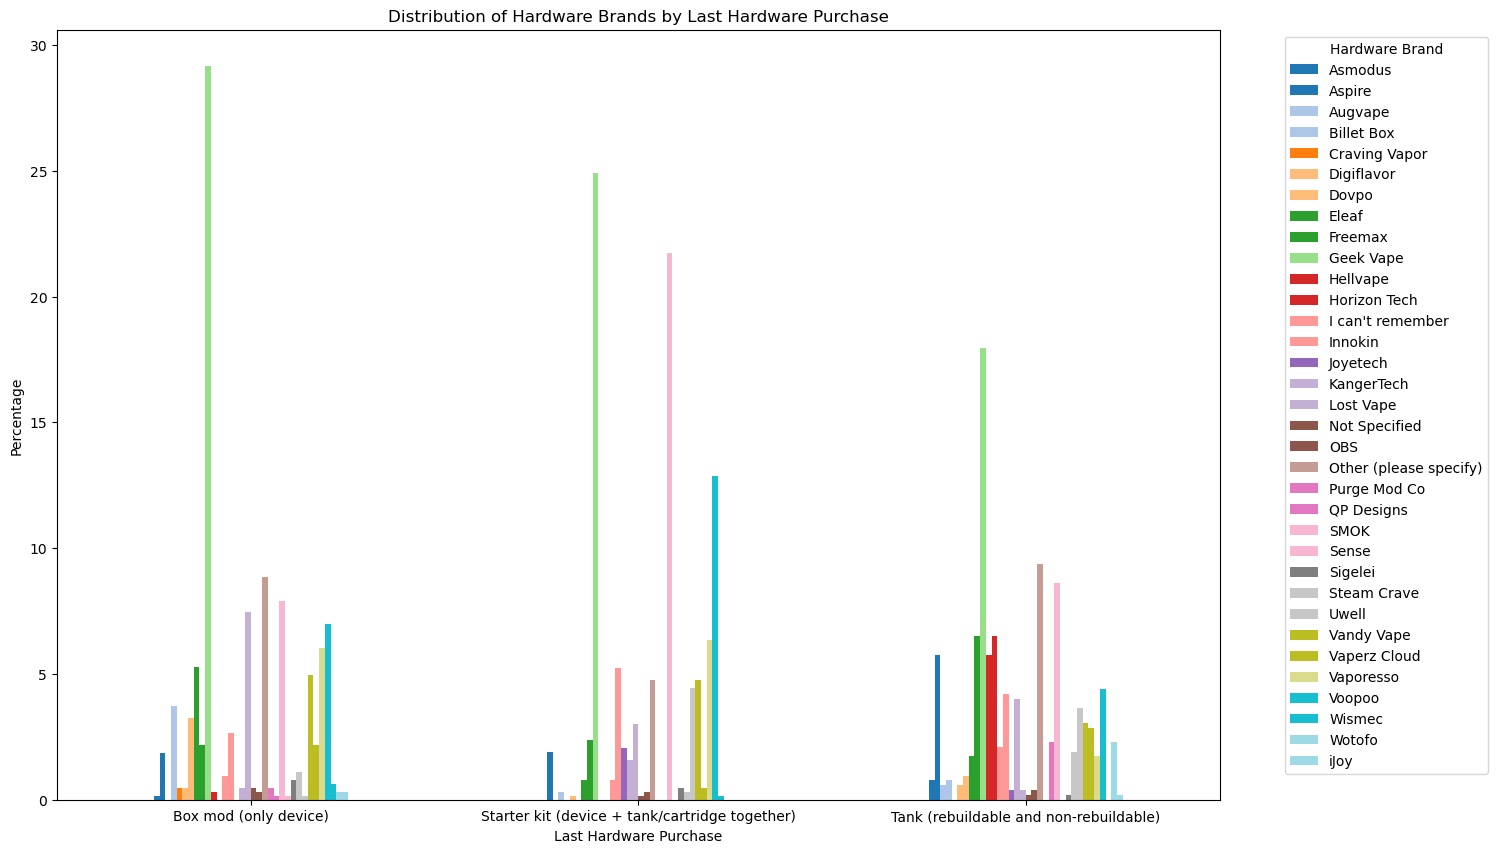

In [368]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Creating a crosstab for the grouped bar chart
hardware_purchase_brand_crosstab = pd.crosstab(data['Last_Hardware_Purchase'], data['Hardware_Brand'], normalize='index') * 100

# Plotting the grouped bar chart
plt.figure(figsize=(15, 10))
hardware_purchase_brand_crosstab.plot(kind='bar', stacked=False, figsize=(15, 10), colormap='tab20')
plt.title('Distribution of Hardware Brands by Last Hardware Purchase')
plt.xlabel('Last Hardware Purchase')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Hardware Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('E:/Upwork Gold/Distr of Hardware Brandss by Last Purchase.png', format='png', dpi=300)
plt.show()


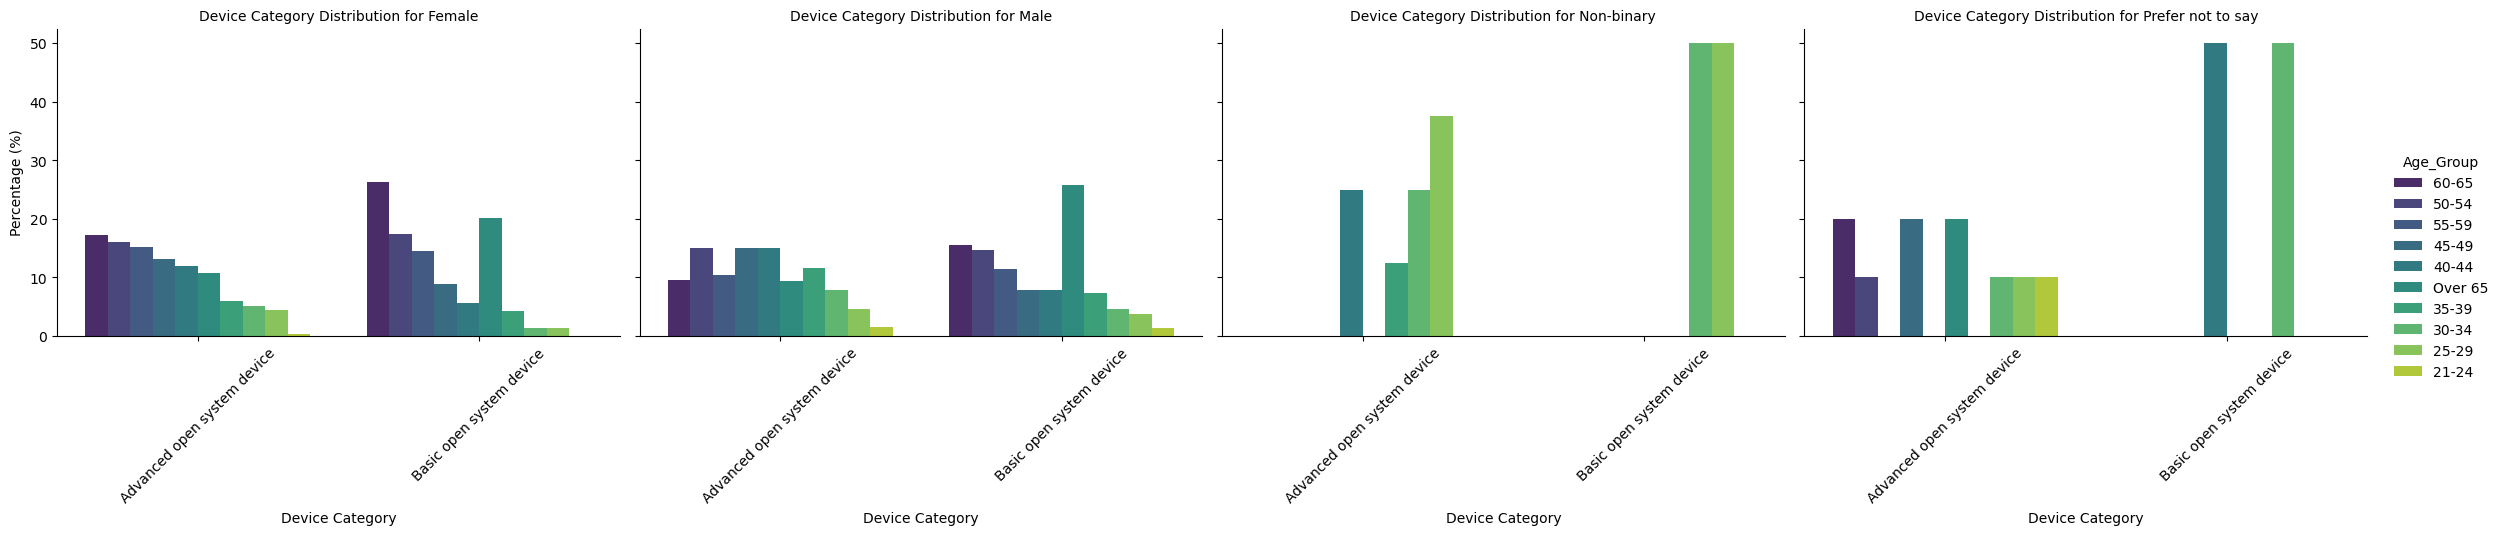

In [369]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Calculating the percentage of each age group within each device category for each gender
age_device_gender_percentage = data.groupby(['Gender', 'Device_Category'])['Age_Group'].value_counts(normalize=True).rename('Percentage').reset_index()

# Convert the percentage to a more readable format (e.g., 40% instead of 0.4)
age_device_gender_percentage['Percentage'] *= 100

# Faceted bar chart for each gender showing percentage distribution in device categories
g = sns.catplot(x='Device_Category', y='Percentage', col='Gender', hue='Age_Group', 
                data=age_device_gender_percentage, kind='bar', 
                height=4, aspect=1.5, palette='viridis')

# Rotate x-axis labels for readability
g.set_xticklabels(rotation=45)

# Adding titles and labels
g.set_titles('Device Category Distribution for {col_name}')
g.set_axis_labels('Device Category', 'Percentage (%)')
plt.savefig('E:/Upwork Gold/Device Category Distrr along gender.png', format='png', dpi=300)
plt.show()


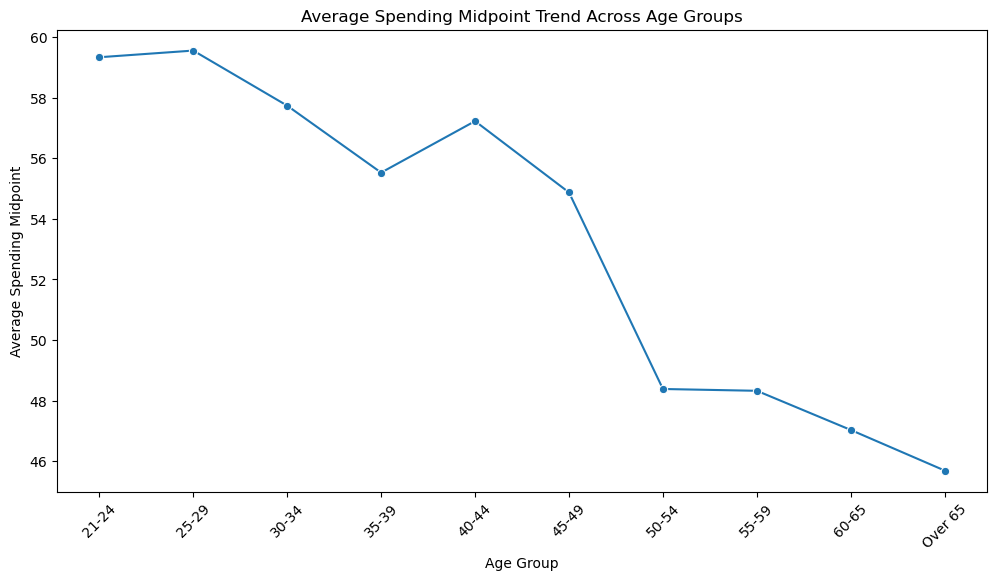

In [370]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Convert 'Spending_Midpoint' to numeric if it's not already
data['Spending_Midpoint'] = pd.to_numeric(data['Spending_Midpoint'], errors='coerce')

# Grouping data by Age_Group to calculate the mean spending midpoint
age_spending_trend = data.groupby('Age_Group')['Spending_Midpoint'].mean().reset_index()

# Sorting Age Groups for meaningful line plot (if Age Groups are categorical)
# This step may vary depending on how your Age Groups are formatted
age_spending_trend = age_spending_trend.sort_values(by='Age_Group')

# Creating the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='Age_Group', y='Spending_Midpoint', data=age_spending_trend, marker='o')
plt.title('Average Spending Midpoint Trend Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average Spending Midpoint')
plt.xticks(rotation=45)  # Rotate labels if they are overlapping
plt.savefig('E:/Upwork Gold/Average Spent Midpoint Across Age Groups.png', format='png', dpi=300)
plt.show()


In [ ]:
This line chart will plot the average spending midpoint for each age group, showing how spending behavior changes across different age demographics.

SyntaxError: invalid syntax (1536984329.py, line 1)

<Figure size 1400x800 with 0 Axes>

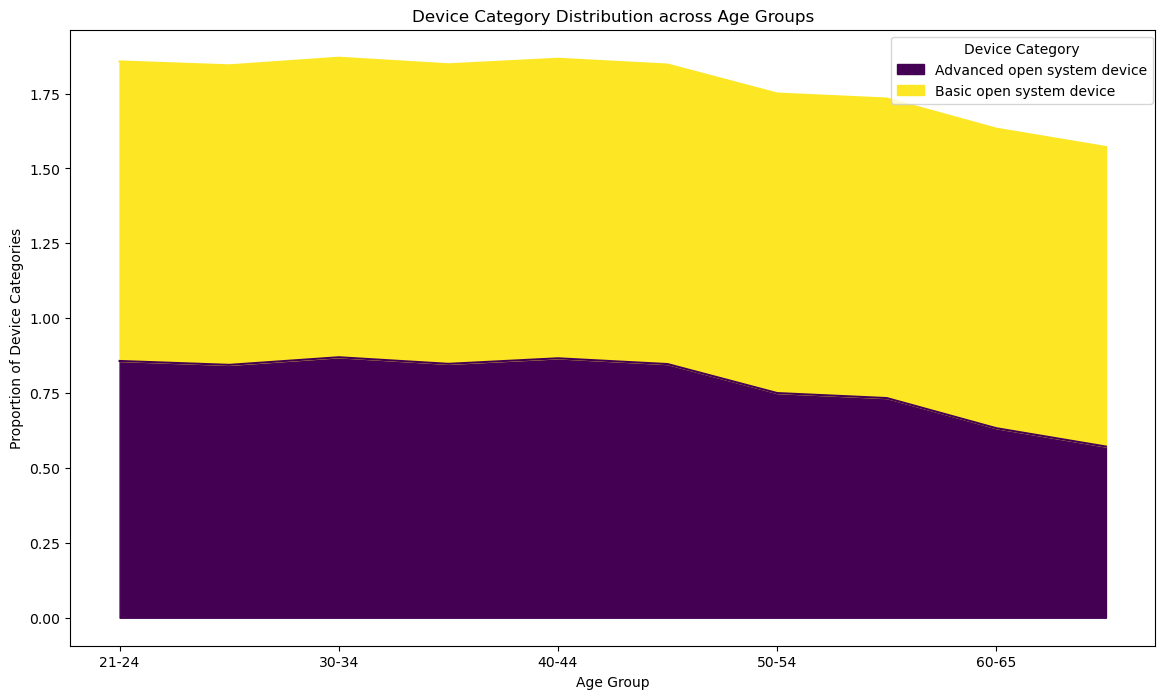

In [440]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Calculating the proportion of each device category within each age group
age_device_distribution = pd.crosstab(data['Age_Group'], data['Device_Category'], normalize='index')

# Converting the proportions to cumulative sums for the stacked area chart
cumulative_age_device_distribution = age_device_distribution.cumsum(axis=1)

# Creating the stacked area chart
plt.figure(figsize=(14, 8))
cumulative_age_device_distribution.plot(kind='area', stacked=True, colormap='viridis', figsize=(14, 8))
plt.title('Device Category Distribution across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Device Categories')
plt.xticks(rotation=0)
plt.legend(title='Device Category', bbox_to_anchor=(0.75, 1), loc='upper left')
plt.savefig('E:/Upwork Gold/Device Category Distribution across Age Groups.png', format='png', dpi=300)
plt.show()


Here's how to interpret this area chart:

X-axis: Represents the age groups.

Y-axis: Indicates the proportion of device categories used by each age group.

Colors: Each color corresponds to a different device category. The legend indicates which color represents which category.

Area: The filled area for each device category shows the proportion of that device's usage within each age group. The total height at any point along the x-axis represents the combined proportion of all device categories for that age group.

From this chart, you can deduce:

The "Basic open system device" is represented by the yellow color and is the most used device category across all age groups.
The "Advanced open system device" is represented by the purple color and appears to make up a smaller proportion of the device usage, which is consistent across age groups.
The largest proportion of usage of both device categories seems to be within the "60-65" age group, which could suggest that this age group has the highest diversity in device usage or that the survey had a larger number of respondents in this category.

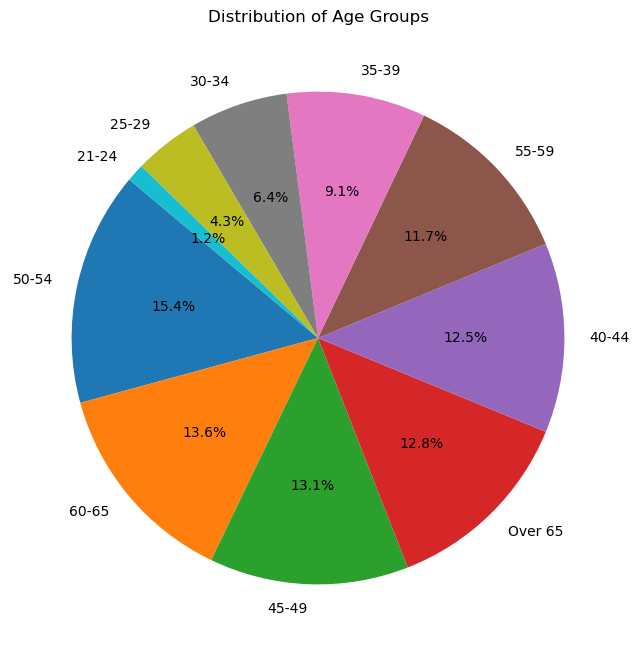

In [373]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Calculate the distribution of Age Groups
age_group_distribution = data['Age_Group'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
age_group_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Age Groups')
plt.ylabel('')  # Hide the y-label
plt.savefig('E:/Upwork Gold/Age Groups Alll.png', format='png', dpi=300)
plt.show()


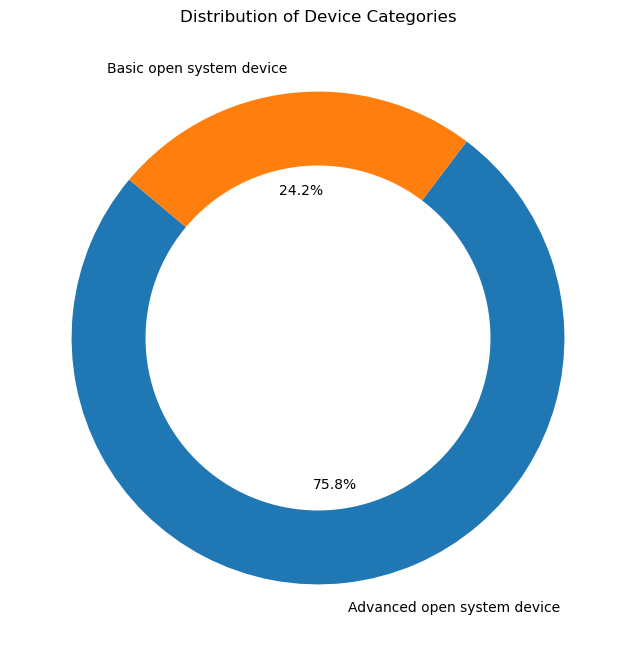

In [374]:
# Calculate the distribution of Device Categories
device_category_distribution = data['Device_Category'].value_counts()

# Create a donut chart
plt.figure(figsize=(8, 8))
plt.pie(device_category_distribution, labels=device_category_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Device Categories')
central_circle = plt.Circle((0, 0), 0.70, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.savefig('E:/Upwork Gold/DEvice Category Distr.png', format='png', dpi=300)
plt.show()


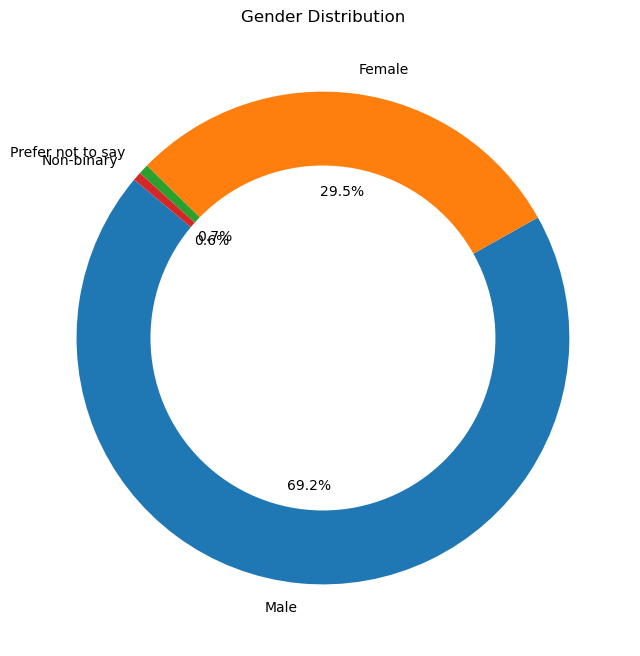

In [375]:
# Calculate the distribution of Gender
gender_distribution = data['Gender'].value_counts()

# Create a donut chart for Gender Distribution
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
# Adding a circle at the center to turn the pie chart into a donut chart
central_circle = plt.Circle((0, 0), 0.70, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.savefig('E:/Upwork Gold/Gender wise Distr.png', format='png', dpi=300)
plt.show()


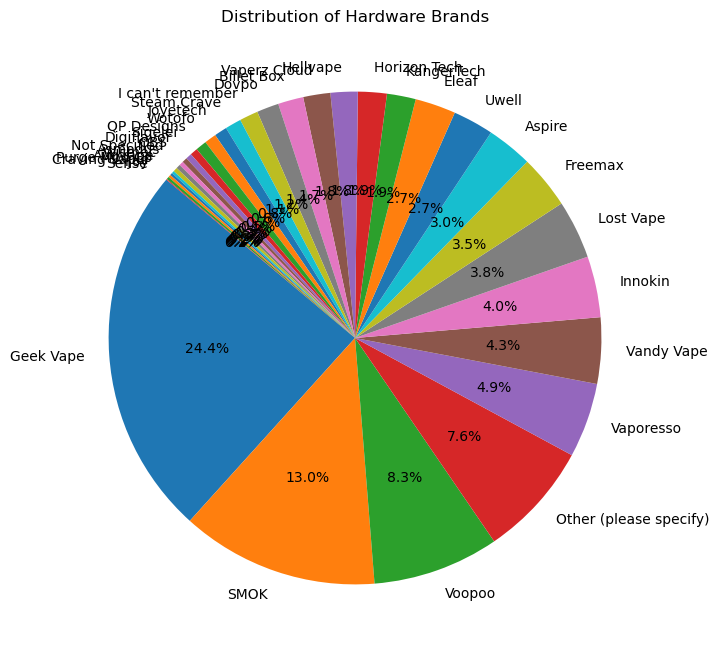

In [376]:
# Calculate the distribution of Hardware Brands
hardware_brand_distribution = data['Hardware_Brand'].value_counts()

# Create a pie chart for Hardware Brand Distribution
plt.figure(figsize=(8, 8))
hardware_brand_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Hardware Brands')
plt.ylabel('')  # Hide the y-label
plt.savefig('E:/Upwork Gold/Brand wise Distr.png', format='png', dpi=300)
plt.show()


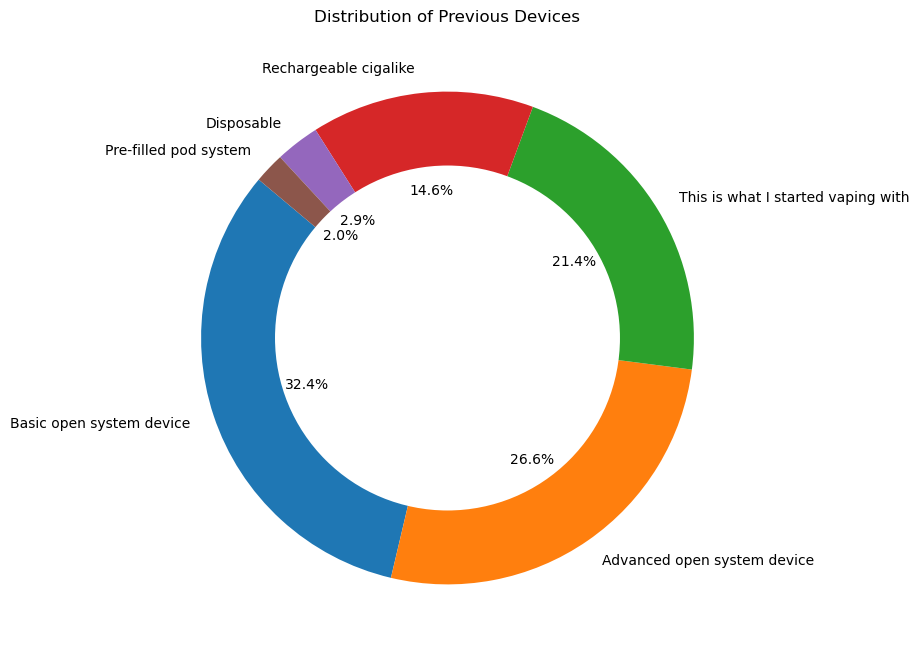

In [377]:
# Calculate the distribution of Previous Devices
previous_device_distribution = data['Previous_Device'].value_counts()

# Create a donut chart for Previous Device Distribution
plt.figure(figsize=(8, 8))
plt.pie(previous_device_distribution, labels=previous_device_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Previous Devices')
# Adding a circle at the center to turn the pie chart into a donut chart
central_circle = plt.Circle((0, 0), 0.70, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.savefig('E:/Upwork Gold/Distr of Previous Devices.png', format='png', dpi=300)
plt.show()


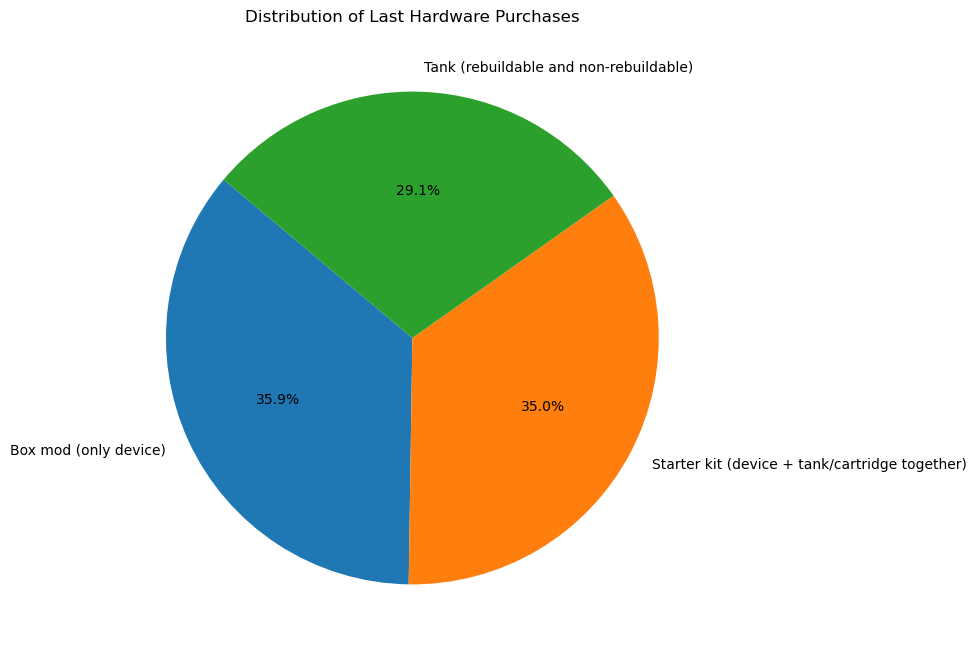

In [378]:
# Calculate the distribution of Last Hardware Purchase
last_hardware_purchase_distribution = data['Last_Hardware_Purchase'].value_counts()

# Create a pie chart for Last Hardware Purchase Distribution
plt.figure(figsize=(8, 8))
last_hardware_purchase_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Last Hardware Purchases')
plt.ylabel('')  # Hide the y-label
plt.savefig('E:/Upwork Gold/Distr of Last Hardware Purchassee.png', format='png', dpi=300)
plt.show()


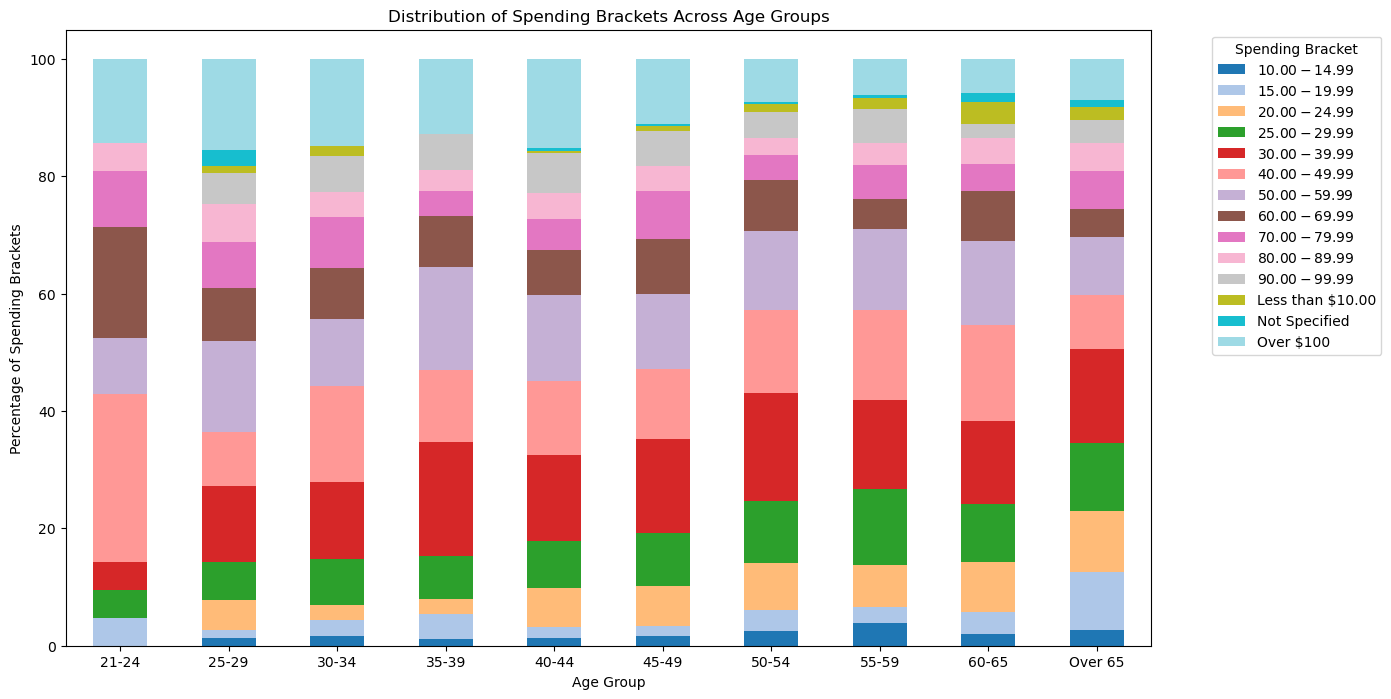

In [380]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Calculating the distribution of Spending Brackets within each Age Group
age_spending_crosstab = pd.crosstab(data['Age_Group'], data['Spending_Bracket'], normalize='index') * 100

# Create a stacked bar chart
age_spending_crosstab.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Distribution of Spending Brackets Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Spending Brackets')
plt.legend(title='Spending Bracket', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.savefig('E:/Upwork Gold/Distributiion of Spending Brackets Across Age Groups.png', format='png', dpi=300)
plt.show()


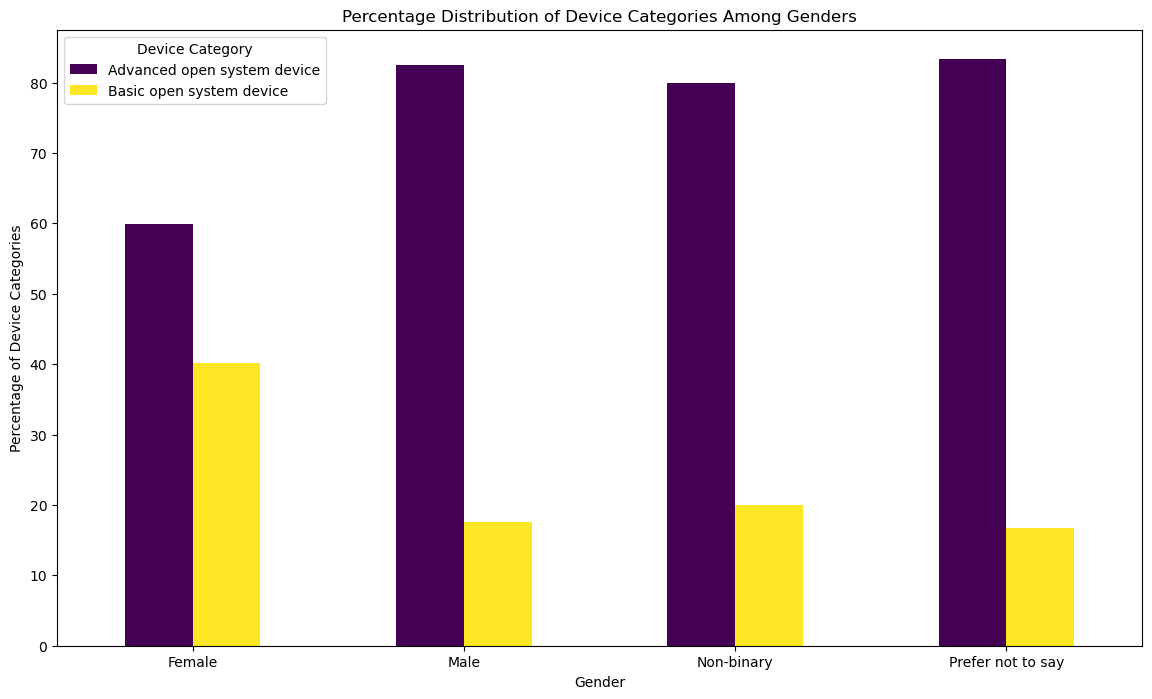

In [381]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Calculating the percentage distribution of Device Categories within each Gender
gender_device_percentage = pd.crosstab(data['Gender'], data['Device_Category'], normalize='index') * 100

# Create a clustered bar chart with percentages
gender_device_percentage.plot(kind='bar', figsize=(14, 8), colormap='viridis', stacked=False)
plt.title('Percentage Distribution of Device Categories Among Genders')
plt.xlabel('Gender')
plt.ylabel('Percentage of Device Categories')
plt.legend(title='Device Category')
plt.xticks(rotation=0)  # Horizontal x-axis labels are more readable
plt.savefig('E:/Upwork Gold/% Distribution of Device Categories Among Genders.png', format='png', dpi=300)
plt.show()


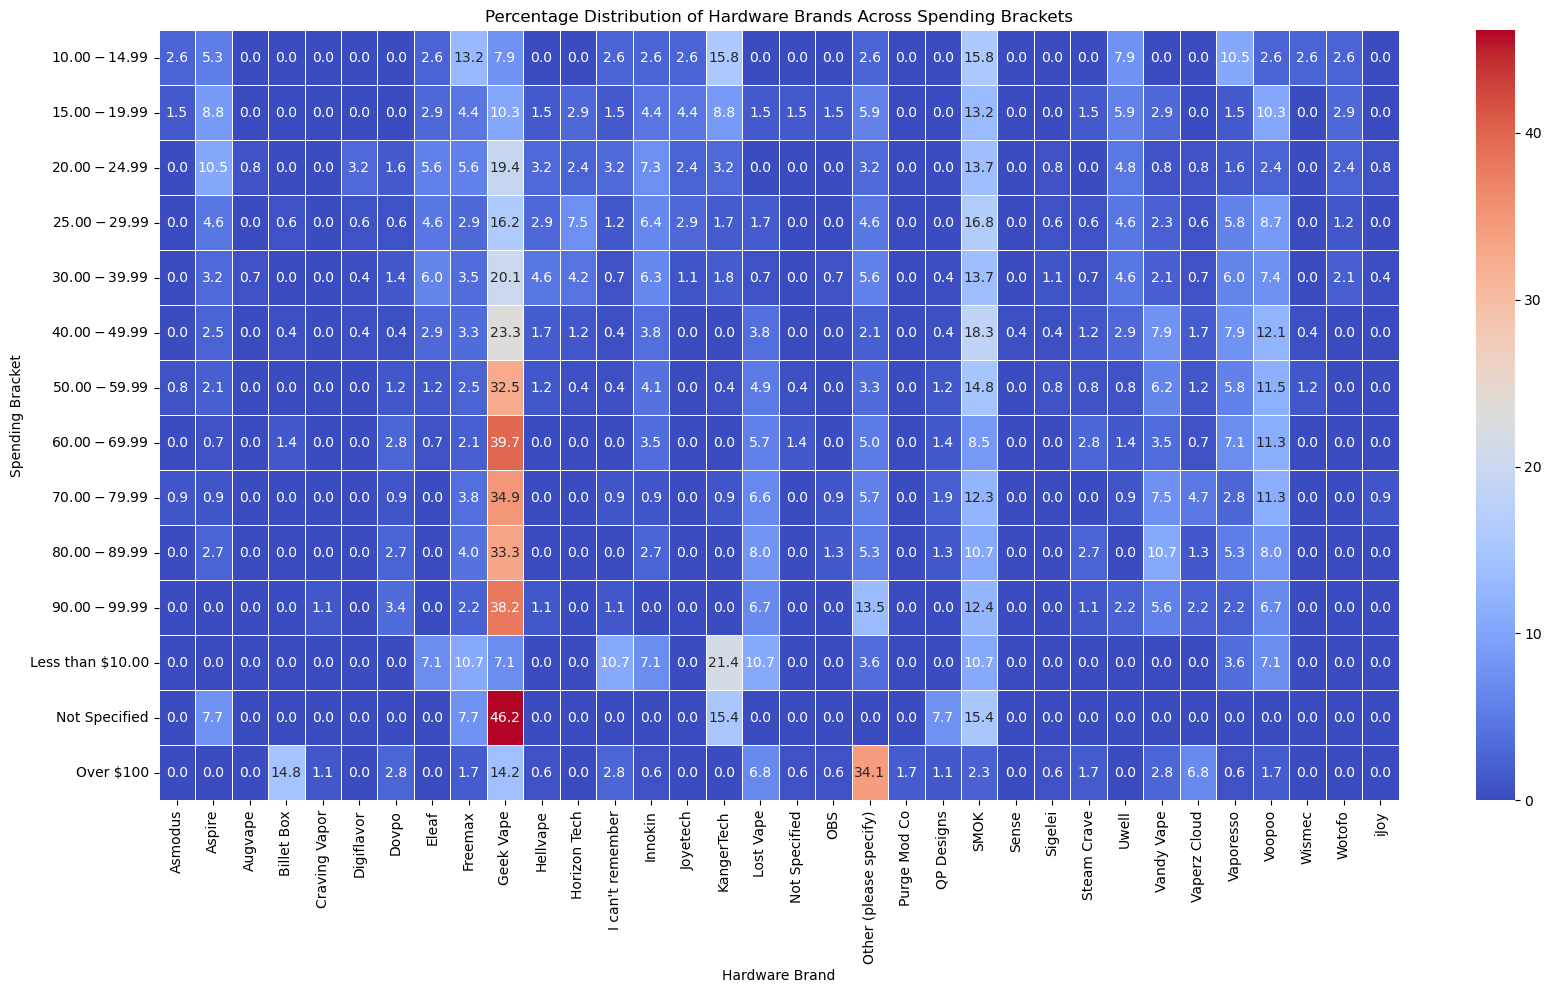

In [382]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Calculating the percentage distribution of Hardware Brands within each Spending Bracket
hardware_spending_percentage = pd.crosstab(data['Spending_Bracket'], data['Hardware_Brand'], normalize='index') * 100

# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(hardware_spending_percentage, annot=True, fmt='.1f', cmap='coolwarm', linewidths=.5)
plt.title('Percentage Distribution of Hardware Brands Across Spending Brackets')
plt.xlabel('Hardware Brand')
plt.ylabel('Spending Bracket')
plt.savefig('E:/Upwork Gold/% Distr of Hardware Brandss.png', format='png', dpi=300)
plt.show()


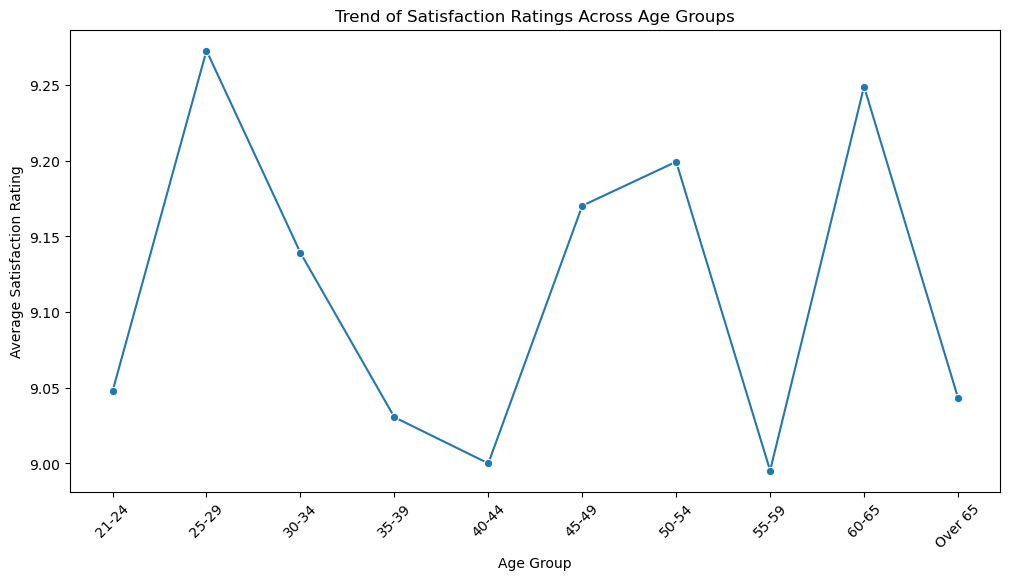

In [383]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Ensuring 'Satisfaction_Rating' is a numeric column
data['Satisfaction_Rating'] = pd.to_numeric(data['Satisfaction_Rating'], errors='coerce')

# Grouping data by Age_Group to calculate the mean satisfaction rating
age_satisfaction_trend = data.groupby('Age_Group')['Satisfaction_Rating'].mean().reset_index()

# Creating the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='Age_Group', y='Satisfaction_Rating', data=age_satisfaction_trend, marker='o')
plt.title('Trend of Satisfaction Ratings Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average Satisfaction Rating')
plt.xticks(rotation=45)  # Rotate labels if they are overlapping
plt.savefig('E:/Upwork Gold/Trend of Satisfactionn.png', format='png', dpi=300)
plt.show()


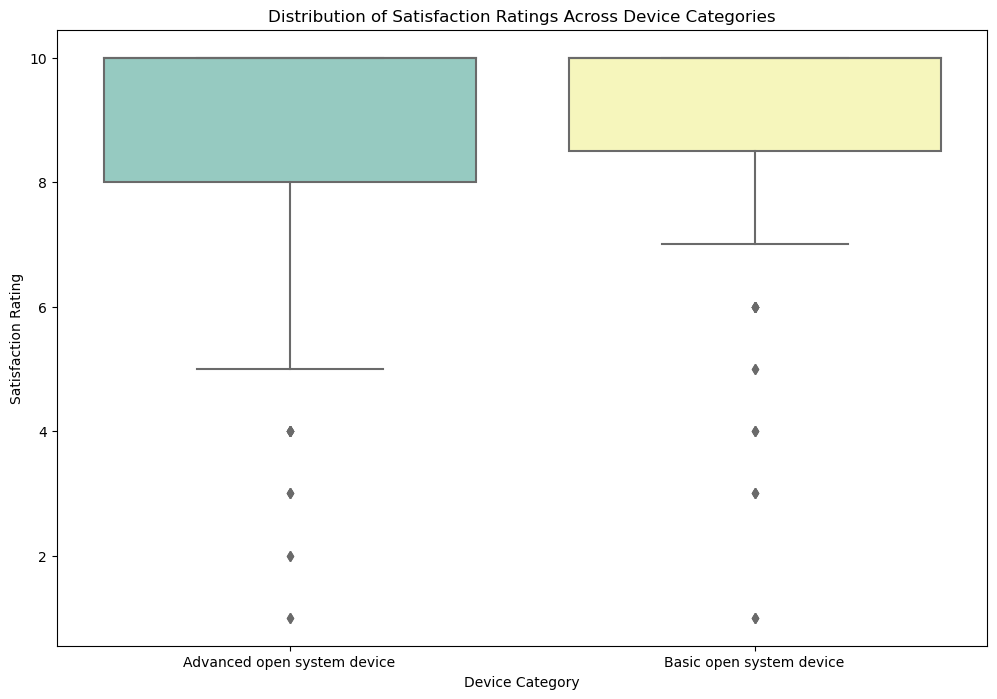

In [385]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Ensuring 'Satisfaction_Rating' is a numeric column
data['Satisfaction_Rating'] = pd.to_numeric(data['Satisfaction_Rating'], errors='coerce')

# Creating the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Device_Category', y='Satisfaction_Rating', data=data, palette='Set3')
plt.title('Distribution of Satisfaction Ratings Across Device Categories')
plt.xlabel('Device Category')
plt.ylabel('Satisfaction Rating')
plt.xticks(rotation=0)  # Rotate labels for better readability
plt.savefig('E:/Upwork Gold/Trend of Satisfactionn Across Device Catg.png', format='png', dpi=300)
plt.show()


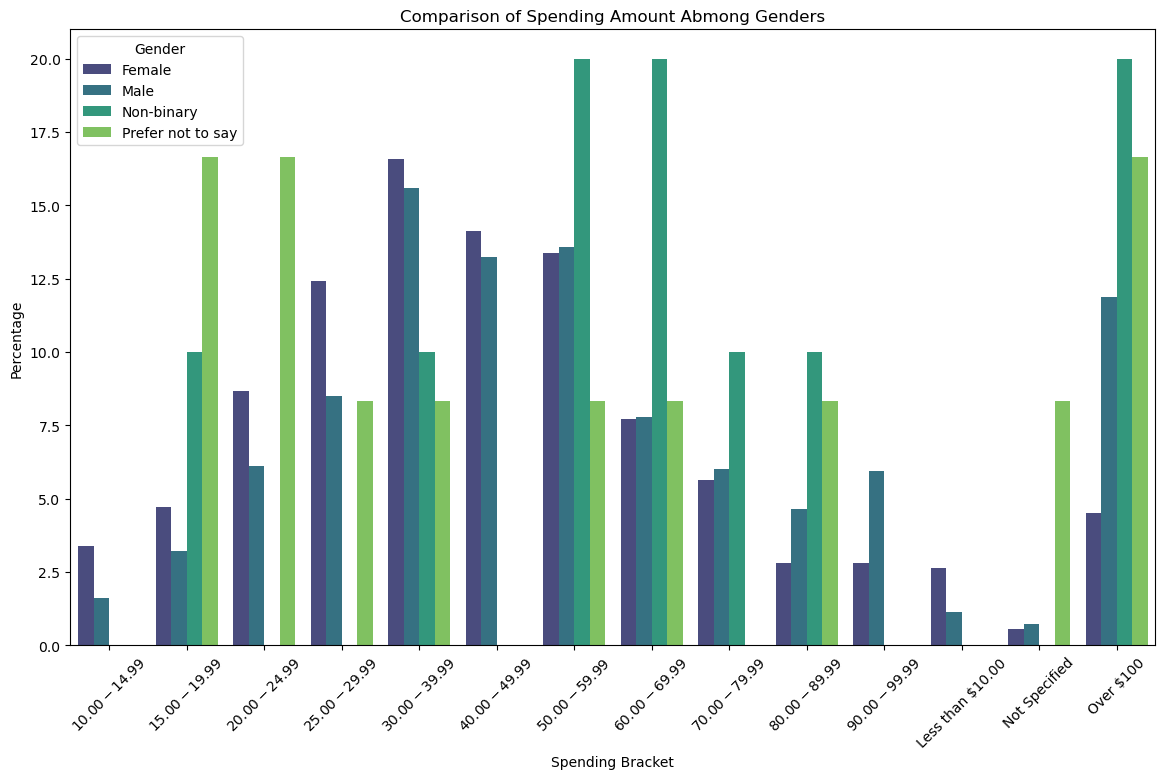

In [386]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Calculating the percentage distribution of Spending Brackets within each Gender
gender_spending_percentage = pd.crosstab(data['Gender'], data['Spending_Bracket'], normalize='index') * 100

# Resetting index for plotting
gender_spending_percentage.reset_index(inplace=True)

# Melting the DataFrame for seaborn compatibility
gender_spending_melted = gender_spending_percentage.melt(id_vars='Gender', var_name='Spending_Bracket', value_name='Percentage')

# Creating the clustered bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='Spending_Bracket', y='Percentage', hue='Gender', data=gender_spending_melted, palette='viridis')
plt.title('Comparison of Spending Amount Abmong Genders')
plt.xlabel('Spending Bracket')
plt.ylabel('Percentage')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.savefig('E:/Upwork Gold/Comparison of Amount Spent & Genders.png', format='png', dpi=300)
plt.show()


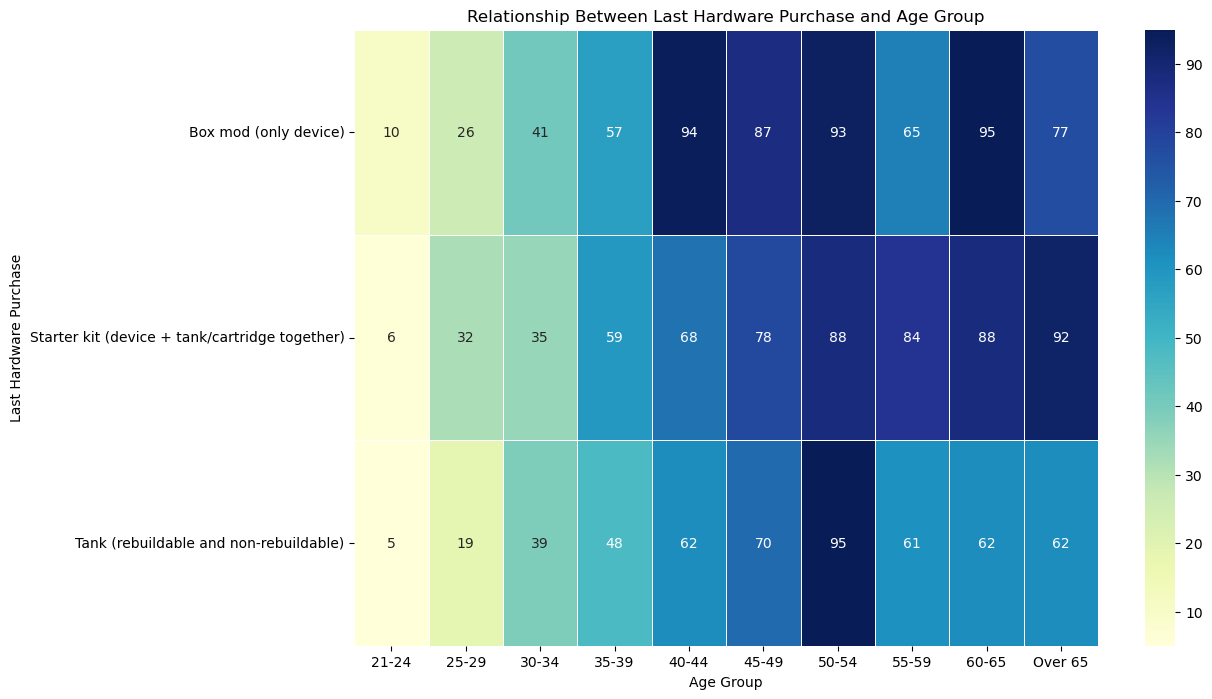

In [387]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Creating a crosstab for the heatmap
last_hardware_age_crosstab = pd.crosstab(data['Last_Hardware_Purchase'], data['Age_Group'])

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(last_hardware_age_crosstab, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Relationship Between Last Hardware Purchase and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Last Hardware Purchase')
plt.savefig('E:/Upwork Gold/Heatmapp Age Group Vs Last Hardware Purchase.png', format='png', dpi=300)
plt.show()


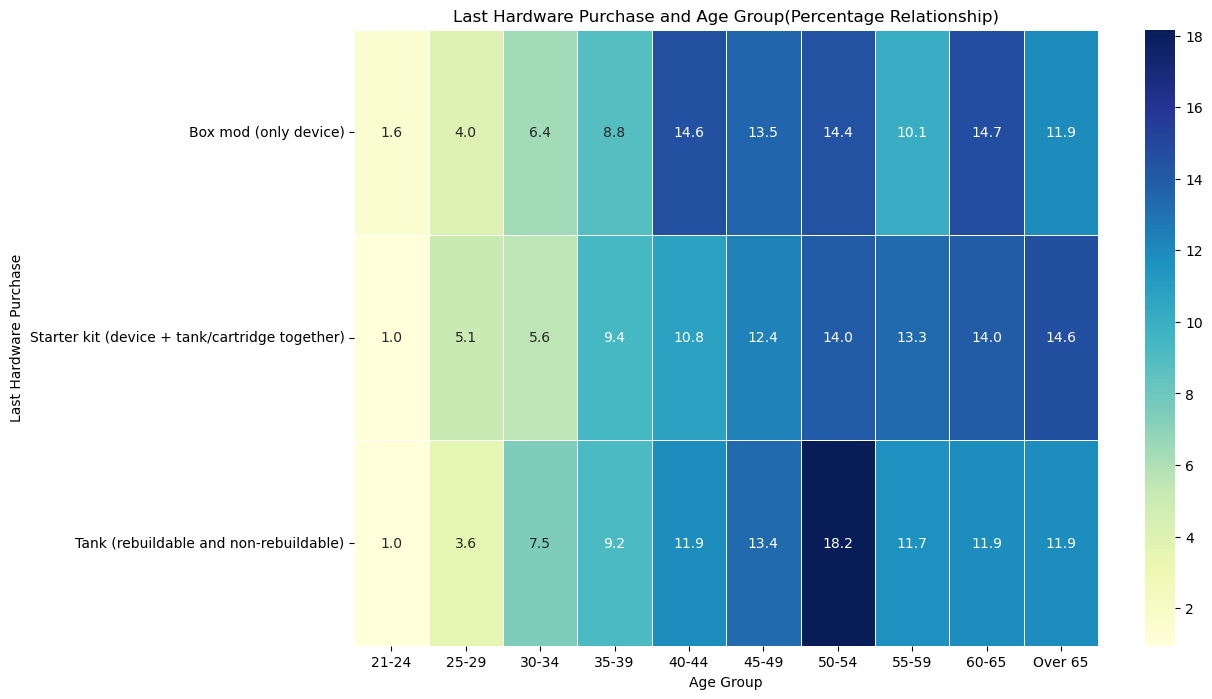

In [388]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Creating a crosstab and normalizing the values to get the percentage distribution
last_hardware_age_percentage = pd.crosstab(data['Last_Hardware_Purchase'], data['Age_Group'], normalize='index') * 100

# Plotting the heatmap with percentages
plt.figure(figsize=(12, 8))
sns.heatmap(last_hardware_age_percentage, annot=True, fmt='.1f', cmap='YlGnBu', linewidths=.5)
plt.title('Last Hardware Purchase and Age Group(Percentage Relationship)')
plt.xlabel('Age Group')
plt.ylabel('Last Hardware Purchase')
plt.savefig('E:/Upwork Gold/2Heatmapp Age Group Vs Last Hardware Purchase.png', format='png', dpi=300)
plt.show()


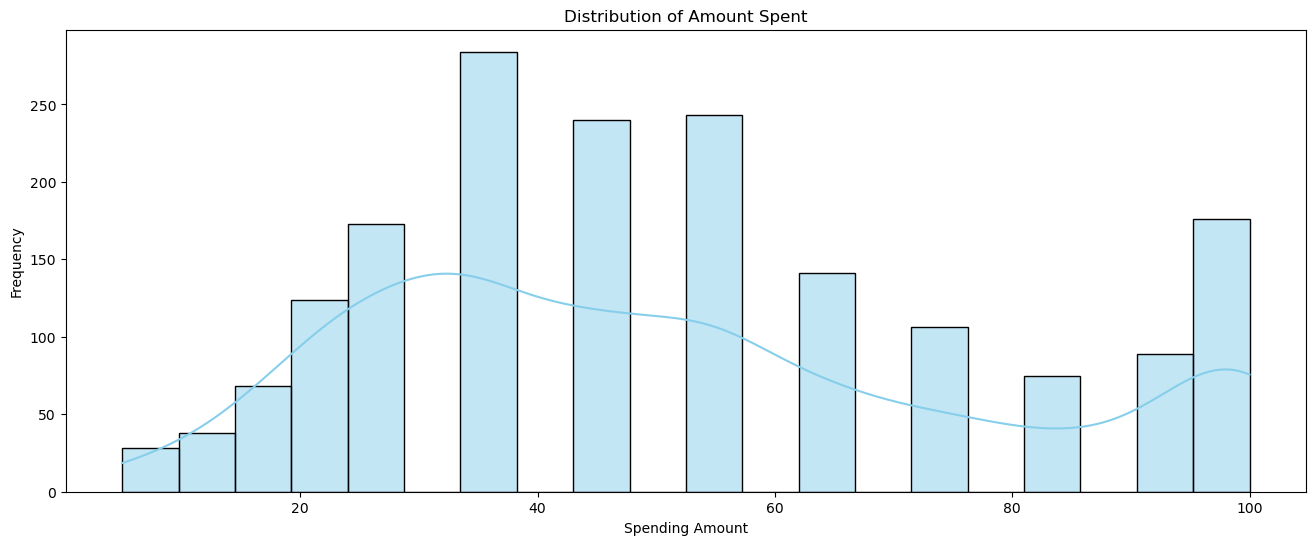

In [392]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Ensure the 'Spending_Midpoint' column is numeric
data['Spending_Midpoint'] = pd.to_numeric(data['Spending_Midpoint'], errors='coerce')

# Creating the histogram
plt.figure(figsize=(16, 6))
sns.histplot(data['Spending_Midpoint'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Amount Spent')
plt.xlabel('Spending Amount')
plt.ylabel('Frequency')
plt.savefig('E:/Upwork Gold/Distr of Amount Spent.png', format='png', dpi=300)
plt.show()


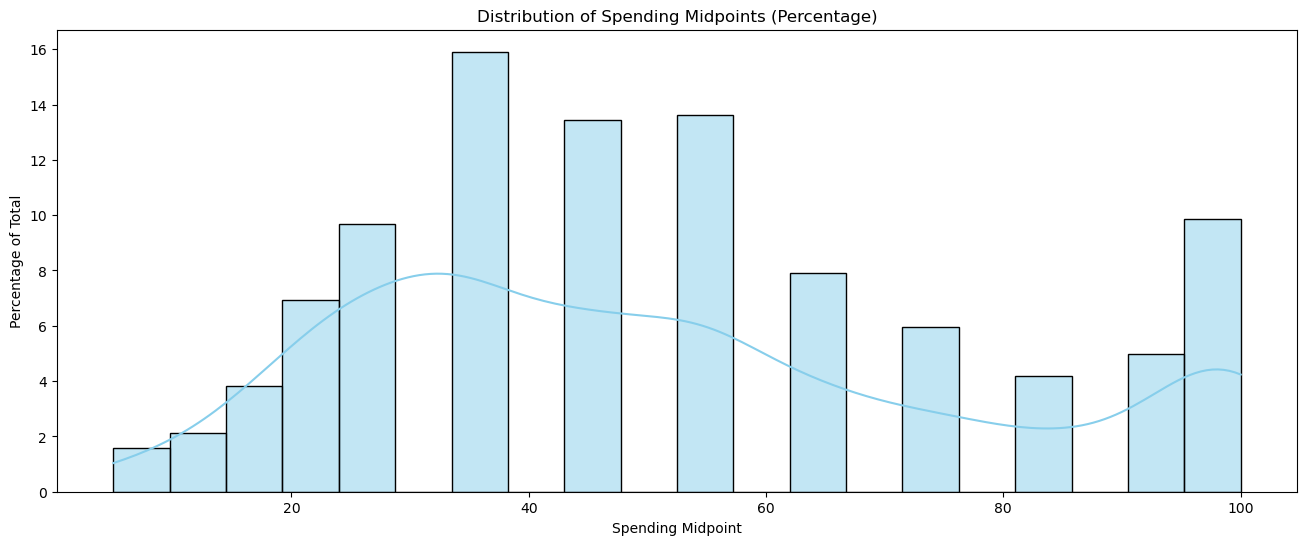

In [393]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Ensure the 'Spending_Midpoint' column is numeric
data['Spending_Midpoint'] = pd.to_numeric(data['Spending_Midpoint'], errors='coerce')

# Creating the histogram with percentages on the y-axis
plt.figure(figsize=(16, 6))
sns.histplot(data['Spending_Midpoint'], bins=20, kde=True, color='skyblue', stat='percent')
plt.title('Distribution of Spending Midpoints (Percentage)')
plt.xlabel('Spending Midpoint')
plt.ylabel('Percentage of Total')
plt.savefig('E:/Upwork Gold/%Distr of Amount Spent.png', format='png', dpi=300)
plt.show()


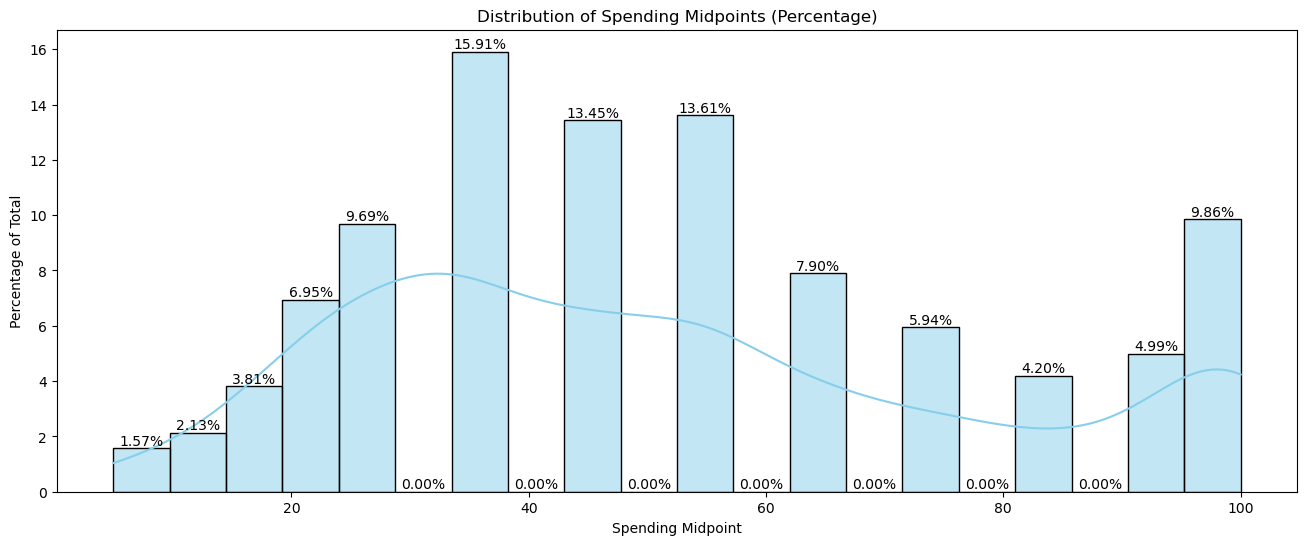

In [396]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Ensure the 'Spending_Midpoint' column is numeric
data['Spending_Midpoint'] = pd.to_numeric(data['Spending_Midpoint'], errors='coerce')

# Creating the histogram with percentages on the y-axis
plt.figure(figsize=(16, 6))
ax = sns.histplot(data['Spending_Midpoint'], bins=20, kde=True, color='skyblue', stat='percent')
plt.title('Distribution of Spending Midpoints (Percentage)')
plt.xlabel('Spending Midpoint')
plt.ylabel('Percentage of Total')

# Add labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)
plt.savefig('E:/Upwork Gold/Spending Midpoint Heatmap.png', format='png', dpi=300)

plt.show()


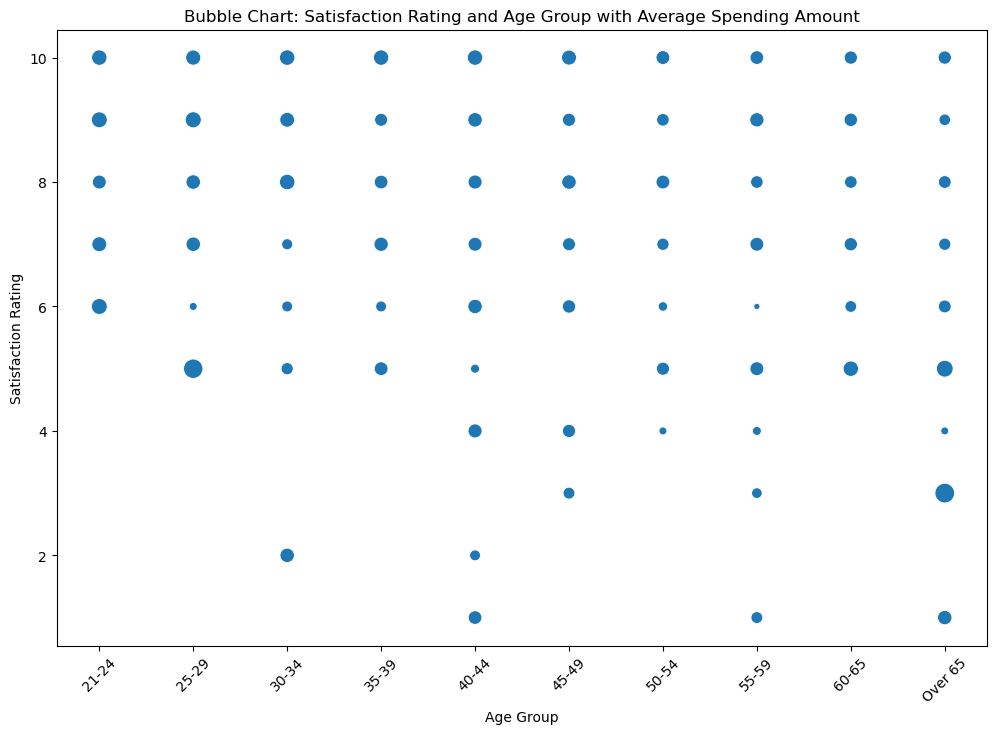

In [397]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Ensure the relevant columns are numeric
data['Satisfaction_Rating'] = pd.to_numeric(data['Satisfaction_Rating'], errors='coerce')
data['Spending_Midpoint'] = pd.to_numeric(data['Spending_Midpoint'], errors='coerce')

# Grouping data to calculate the average spending midpoint for each combination of Age Group and Satisfaction Rating
grouped_data = data.groupby(['Age_Group', 'Satisfaction_Rating']).agg({'Spending_Midpoint': 'mean'}).reset_index()

# Creating the bubble chart
plt.figure(figsize=(12, 8))
sns.scatterplot(data=grouped_data, x='Age_Group', y='Satisfaction_Rating', size='Spending_Midpoint', legend=False, sizes=(20, 200))
plt.title('Bubble Chart: Satisfaction Rating and Age Group with Average Spending Amount')
plt.xlabel('Age Group')
plt.ylabel('Satisfaction Rating')
plt.xticks(rotation=45)
plt.savefig('E:/Upwork Gold/Bubble Chart.png', format='png', dpi=300)
plt.show()


In this chart, each bubble represents an average spending amount for a combination of age group and satisfaction rating. Larger bubbles indicate higher spending amount.

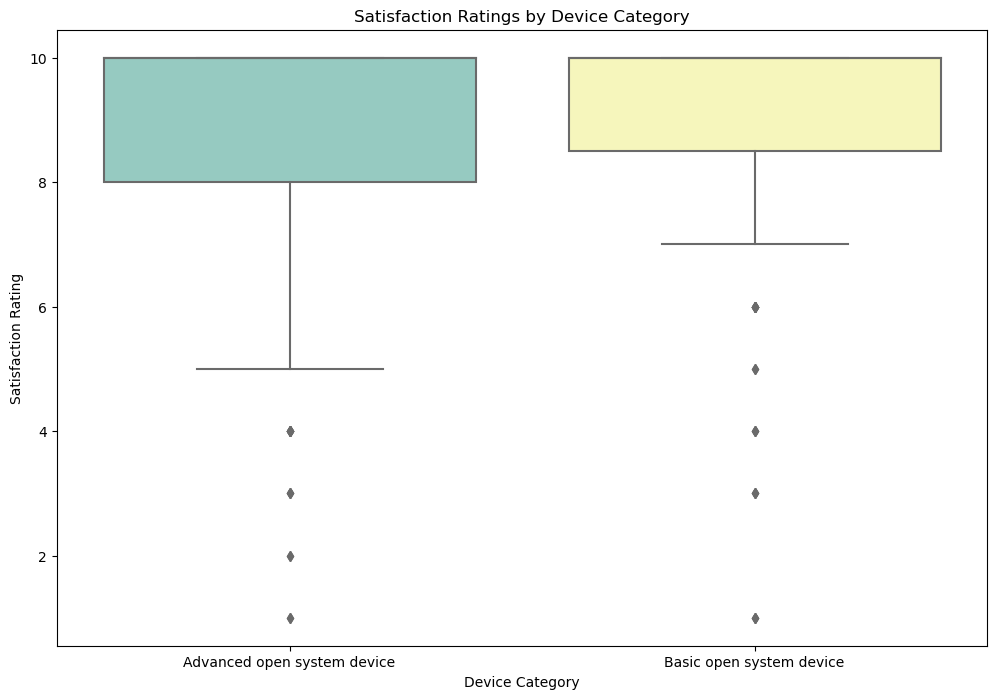

In [399]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Ensuring 'Satisfaction_Rating' is a numeric column
data['Satisfaction_Rating'] = pd.to_numeric(data['Satisfaction_Rating'], errors='coerce')

# Creating the box plot for Satisfaction Ratings by Device Category
plt.figure(figsize=(12, 8))
sns.boxplot(x='Device_Category', y='Satisfaction_Rating', data=data, palette='Set3')
plt.title('Satisfaction Ratings by Device Category')
plt.xlabel('Device Category')
plt.ylabel('Satisfaction Rating')
plt.xticks(rotation=0)  # Rotate labels for better readability
plt.savefig('E:/Upwork Gold/Satisfaction Rating by Device Categorry.png', format='png', dpi=300)
plt.show()


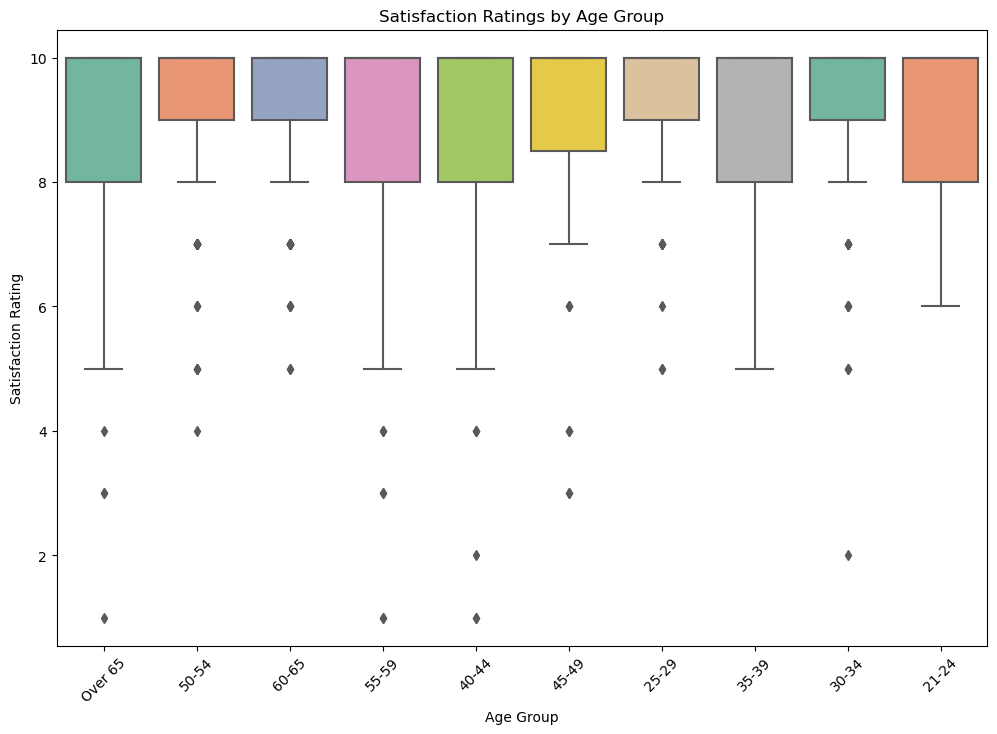

In [400]:
# Creating the box plot for Satisfaction Ratings by Age Group
plt.figure(figsize=(12, 8))
sns.boxplot(x='Age_Group', y='Satisfaction_Rating', data=data, palette='Set2')
plt.title('Satisfaction Ratings by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Satisfaction Rating')
plt.xticks(rotation=45)
plt.savefig('E:/Upwork Gold/Satisfaction Rating by Agge Groupp.png', format='png', dpi=300)
plt.show()


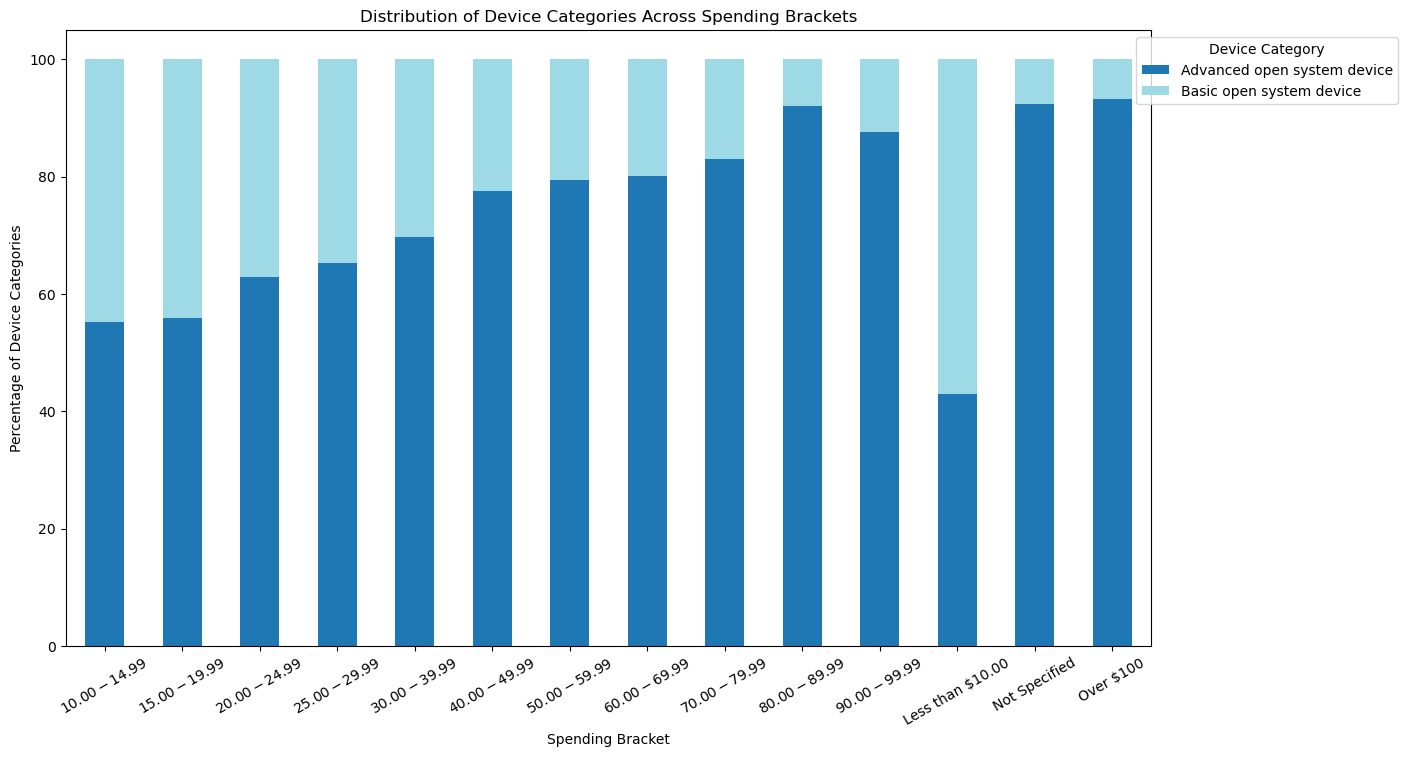

In [405]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Calculating the distribution of Device Categories within each Spending Bracket
spending_device_crosstab = pd.crosstab(data['Spending_Bracket'], data['Device_Category'], normalize='index') * 100

# Create a stacked column chart
spending_device_crosstab.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Distribution of Device Categories Across Spending Brackets')
plt.xlabel('Spending Bracket')
plt.ylabel('Percentage of Device Categories')
plt.legend(title='Device Category', bbox_to_anchor=(0.98, 1), loc='upper left')
plt.xticks(rotation=30)
plt.savefig('E:/Upwork Gold/Device Categories Vs Spending Brackets.png', format='png', dpi=300)
plt.show()


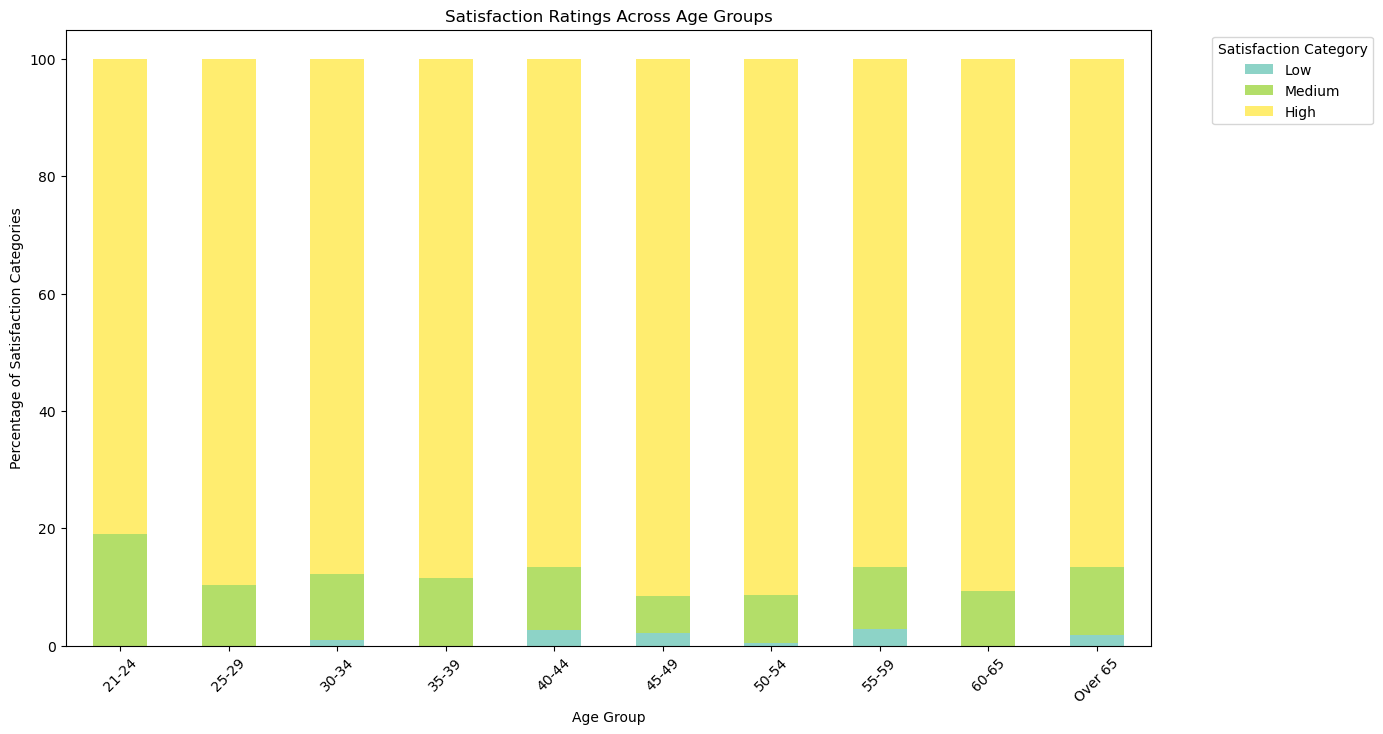

In [407]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Ensuring 'Satisfaction_Rating' is a numeric column
data['Satisfaction_Rating'] = pd.to_numeric(data['Satisfaction_Rating'], errors='coerce')

# Categorizing satisfaction ratings
data['Satisfaction_Category'] = pd.cut(data['Satisfaction_Rating'], bins=[0, 4, 7, 10], labels=['Low', 'Medium', 'High'])

# Calculating the distribution of Satisfaction Categories within each Age Group
age_satisfaction_crosstab = pd.crosstab(data['Age_Group'], data['Satisfaction_Category'], normalize='index') * 100

# Create a stacked column chart
age_satisfaction_crosstab.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set3')
plt.title('Satisfaction Ratings Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Satisfaction Categories')
plt.legend(title='Satisfaction Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.savefig('E:/Upwork Gold/Satisfaction Rating Accross Age Groups.png', format='png', dpi=300)
plt.show()


Satisfaction Levels
- 0-4: Low
- 4-7: Medium
- 7-10: High

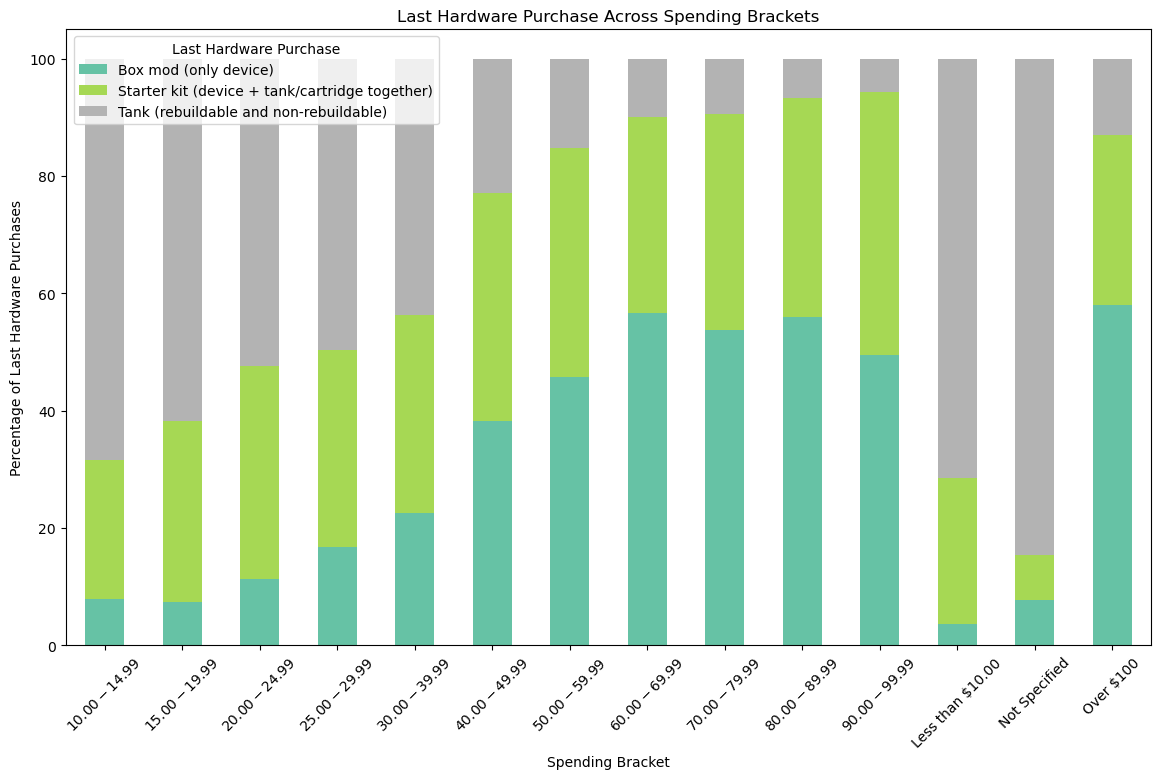

In [413]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Calculating the distribution of Last Hardware Purchase within each Spending Bracket
spending_hardware_crosstab = pd.crosstab(data['Spending_Bracket'], data['Last_Hardware_Purchase'], normalize='index') * 100

# Create a stacked column chart
spending_hardware_crosstab.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set2')
plt.title('Last Hardware Purchase Across Spending Brackets')
plt.xlabel('Spending Bracket')
plt.ylabel('Percentage of Last Hardware Purchases')
plt.legend(title='Last Hardware Purchase', bbox_to_anchor=(0.35, 1), loc='upper right')
plt.xticks(rotation=45)
plt.savefig('E:/Upwork Gold/Last Hardware Purchase Across Spending Brackettss.png', format='png', dpi=300)
plt.show()


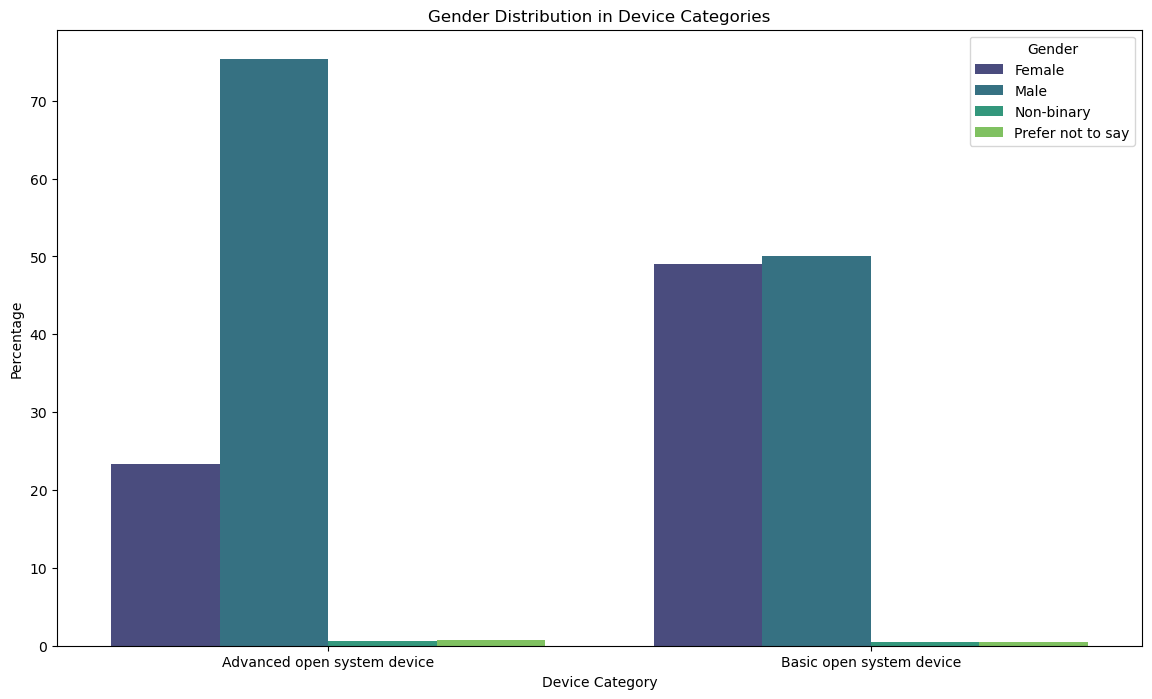

In [416]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Calculating the percentage distribution of Gender within each Device Category
device_gender_percentage = pd.crosstab(data['Device_Category'], data['Gender'], normalize='index') * 100

# Resetting index for plotting
device_gender_percentage.reset_index(inplace=True)

# Melting the DataFrame for seaborn compatibility
device_gender_melted = device_gender_percentage.melt(id_vars='Device_Category', var_name='Gender', value_name='Percentage')

# Creating the grouped bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='Device_Category', y='Percentage', hue='Gender', data=device_gender_melted, palette='viridis')
plt.title('Gender Distribution in Device Categories')
plt.xlabel('Device Category')
plt.ylabel('Percentage')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.savefig('E:/Upwork Gold/Gender Distr in Devicee Categories.png', format='png', dpi=300)
plt.show()


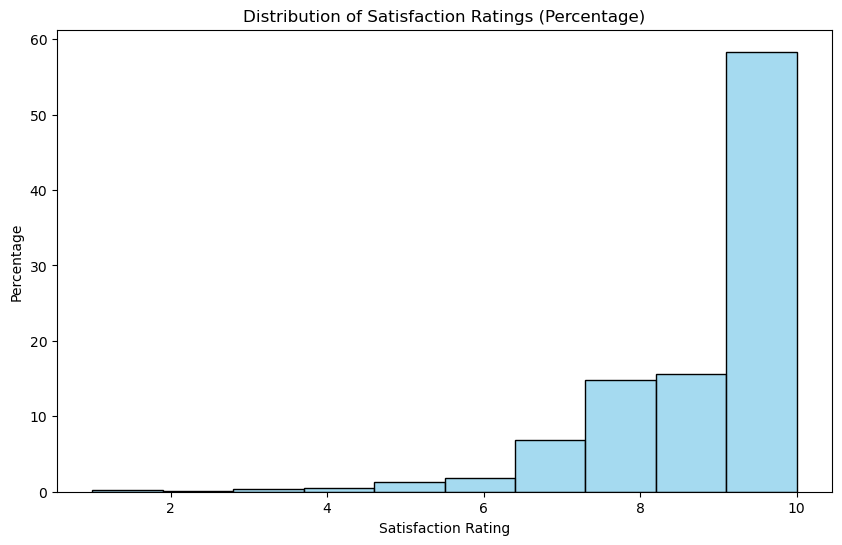

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Ensure 'Satisfaction_Rating' is numeric
data['Satisfaction_Rating'] = pd.to_numeric(data['Satisfaction_Rating'], errors='coerce')

# Creating the histogram for Satisfaction Ratings with percentages
plt.figure(figsize=(10, 6))
sns.histplot(data['Satisfaction_Rating'], bins=10, kde=False, color='skyblue', stat='percent')
plt.title('Distribution of Satisfaction Ratings (Percentage)')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Percentage')
plt.show()


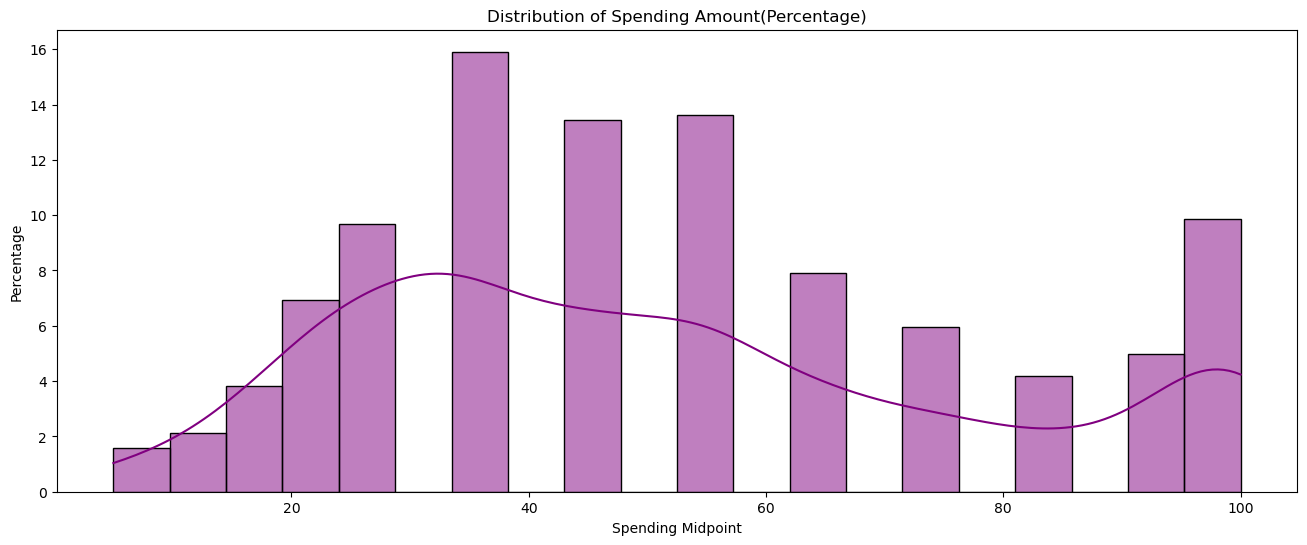

In [418]:
# Ensure 'Spending_Midpoint' is numeric
data['Spending_Midpoint'] = pd.to_numeric(data['Spending_Midpoint'], errors='coerce')

# Creating the histogram for Spending Midpoints with percentages
plt.figure(figsize=(16, 6))
sns.histplot(data['Spending_Midpoint'], bins=20, kde=True, color='purple', stat='percent')
plt.title('Distribution of Spending Amount(Percentage)')
plt.xlabel('Spending Midpoint')
plt.ylabel('Percentage')
plt.savefig('E:/Upwork Gold/Distr of Spending Amountt.png', format='png', dpi=300)
plt.show()


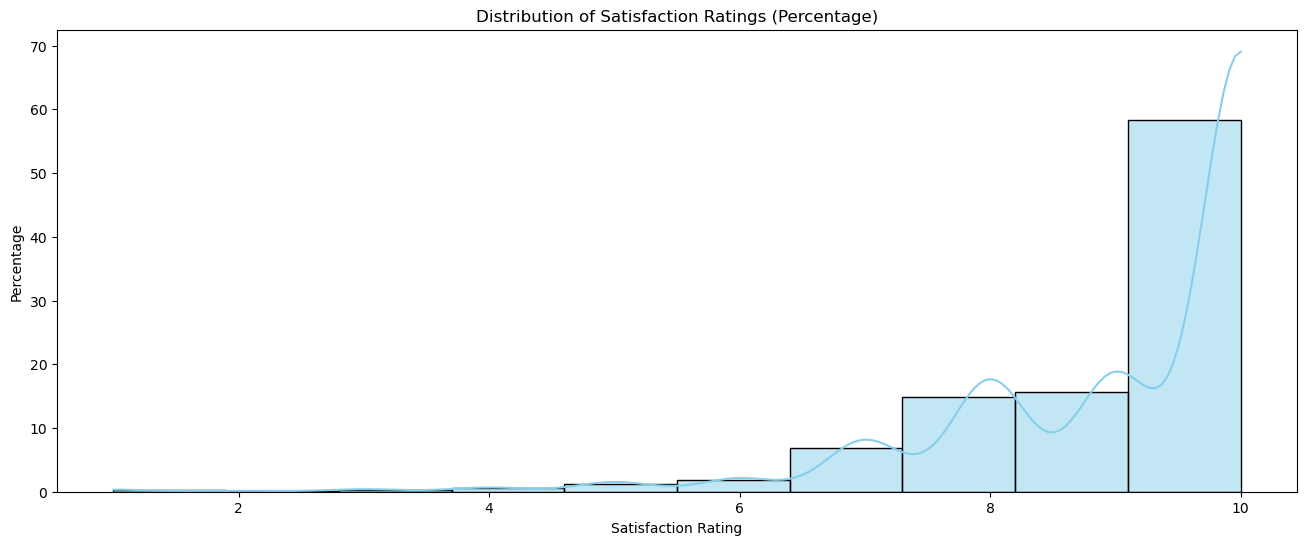

In [422]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# data = pd.read_excel('your_data_file.xlsx')

# Ensuring 'Satisfaction_Rating' is a numeric column
data['Satisfaction_Rating'] = pd.to_numeric(data['Satisfaction_Rating'], errors='coerce')

# Creating the histogram for Satisfaction Ratings
plt.figure(figsize=(16, 6))
sns.histplot(data['Satisfaction_Rating'].dropna(), bins=10, kde=True, color='skyblue', stat='percent')
plt.title('Distribution of Satisfaction Ratings (Percentage)')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Percentage')
plt.savefig('E:/Upwork Gold/Distr of Satisfactions Ratingg.png', format='png', dpi=300)
plt.show()


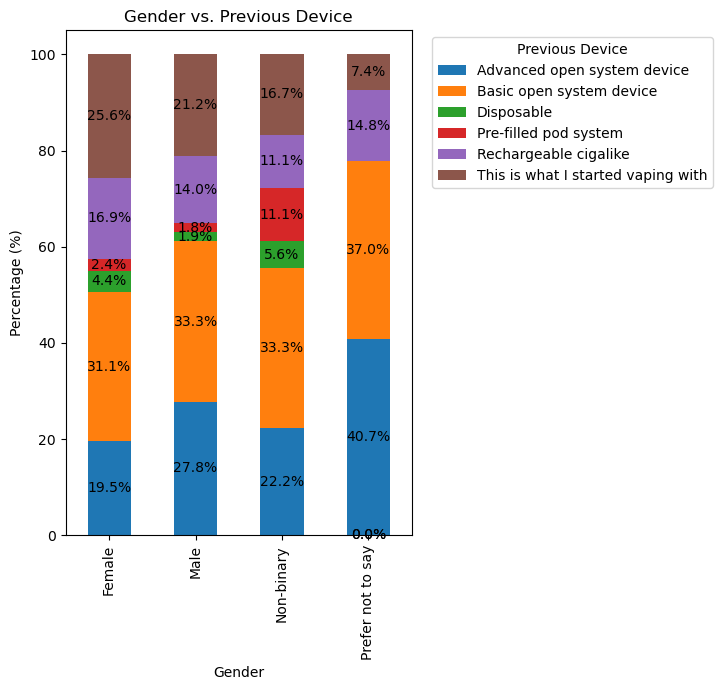

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'gender_prev_device' is your DataFrame after the crosstab operation
gender_prev_device = pd.crosstab(df['Gender'], df['Previous_Device'], normalize='index') * 100

# Plot the stacked bar chart
ax = gender_prev_device.plot(kind='bar', stacked=True, figsize=(10, 7))

# Add title and labels
plt.title('Gender vs. Previous Device')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')

# Place the legend outside the plot area
plt.legend(title='Previous Device', bbox_to_anchor=(1.04, 1), loc='upper left')

# Iterate through each bar container (each gender category)
for c in ax.containers:
    # Use the bar_label function to add labels to each bar
    ax.bar_label(c, label_type='center', fmt='%.1f%%')

# Adjust the layout to fit the legend
plt.tight_layout(rect=[0, 0, 0.75, 1])  # The rect parameter will need adjustment based on your figure size

# Display the plot
plt.show()


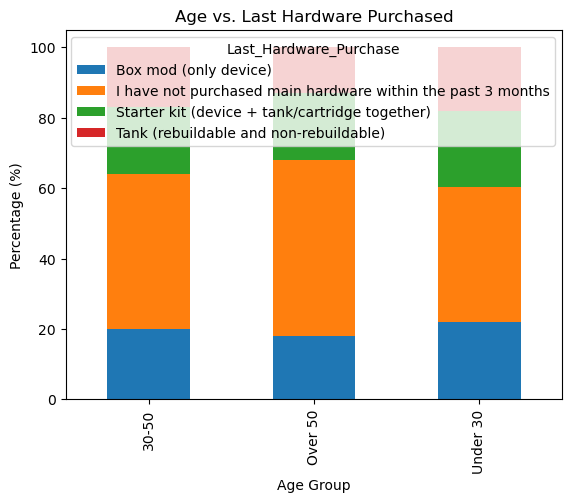

In [39]:
# Stacked Bar Chart in % - Age vs. Last Hardware Purchased
age_last_hardware = pd.crosstab(df['Age Bracket'], df['Last_Hardware_Purchase'], normalize='index') * 100
age_last_hardware.plot(kind='bar', stacked=True)
plt.title('Age vs. Last Hardware Purchased')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.show()

### Enhanced Box Plot and Histogram
Box plot and histogram with improved readability and color schemes.

In [ ]:

# Enhanced Box Plot and Histogram code
# ... (Similar to the code used above for the enhanced box plot and histogram)



#### Explanation of Enhanced Bar Charts
- These bar charts provide a visual representation of the distribution across different categories such as Age Bracket, Gender, and Device Category.
- Key Insights:
  - The Age Bracket chart shows that the majority of respondents are in the 30-50 age range.
  - The Gender chart indicates a higher proportion of male respondents.
  - The Device Category chart highlights that advanced open system devices are more popular among respondents.



#### Explanation of Enhanced Pie Chart
- The pie chart offers a visual distribution of respondents by gender.
- Key Insight:
  - It gives a quick and clear understanding of the proportion of each gender category, with males being the most frequent.



#### Explanation of Enhanced Box Plot and Histogram
- The box plot for Satisfaction Ratings shows the spread and central tendency of the ratings.
  - The median (middle line in the box) indicates the central tendency of the ratings.
  - The length of the box (IQR) shows the spread of the middle 50% of the data.
  - Outliers, if any, are indicated by dots outside the 'whiskers'.
- The histogram for Spending Midpoints illustrates the frequency distribution of spending amounts.
  - The height of each bar shows how many respondents fall into each spending range.
  - The distribution curve (KDE) helps to see the probability distribution of the spending midpoints.
